# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
html = """

<!doctype html>
<html lang="en">

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="description" content="">
  <title>Mars Temperature Data</title>

  <link rel="stylesheet" type="text/css" href="css/bootstrap.min.5.2.2.css">
  <link rel="stylesheet" type="text/css" href="css/temp.css">
</head>

<body>

  <main>
    <div class="container py-4">
      <header class="pb-3 mb-4 border-bottom">
        <a href="/" class="d-flex align-items-center text-dark text-decoration-none">
          <span class="fs-4">Mission To Mars</span>
        </a>
      </header>

      <div class="p-5 mb-4 bg-light rounded-3">
        <div class="container-fluid py-5">
          <h1 class="display-5 fw-bold">Mars Temperature Data</h1>
          <p class="col-md-8 fs-4">This is Mars data.</p>

          <table class="table">
            <tr>
              <th>id</th>
              <th>terrestrial_date</th>
              <th>sol</th>
              <th>ls</th>
              <th>month</th>
              <th>min_temp</th>
              <th>pressure</th>
            </tr>
            <tr class="data-row">
              <td>2</td>
              <td>2012-08-16</td>
              <td>10</td>
              <td>155</td>
              <td>6</td>
              <td>-75.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>13</td>
              <td>2012-08-17</td>
              <td>11</td>
              <td>156</td>
              <td>6</td>
              <td>-76.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>24</td>
              <td>2012-08-18</td>
              <td>12</td>
              <td>156</td>
              <td>6</td>
              <td>-76.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>35</td>
              <td>2012-08-19</td>
              <td>13</td>
              <td>157</td>
              <td>6</td>
              <td>-74.0</td>
              <td>732.0</td>
            </tr>
            <tr class="data-row">
              <td>46</td>
              <td>2012-08-20</td>
              <td>14</td>
              <td>157</td>
              <td>6</td>
              <td>-74.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>57</td>
              <td>2012-08-21</td>
              <td>15</td>
              <td>158</td>
              <td>6</td>
              <td>-78.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>68</td>
              <td>2012-08-22</td>
              <td>16</td>
              <td>158</td>
              <td>6</td>
              <td>-77.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>79</td>
              <td>2012-08-23</td>
              <td>17</td>
              <td>159</td>
              <td>6</td>
              <td>-76.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>112</td>
              <td>2012-08-27</td>
              <td>21</td>
              <td>161</td>
              <td>6</td>
              <td>-74.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>114</td>
              <td>2012-08-28</td>
              <td>22</td>
              <td>162</td>
              <td>6</td>
              <td>-74.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>123</td>
              <td>2012-08-29</td>
              <td>23</td>
              <td>162</td>
              <td>6</td>
              <td>-75.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>134</td>
              <td>2012-08-30</td>
              <td>24</td>
              <td>163</td>
              <td>6</td>
              <td>-75.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>145</td>
              <td>2012-08-31</td>
              <td>25</td>
              <td>163</td>
              <td>6</td>
              <td>-75.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>156</td>
              <td>2012-09-01</td>
              <td>26</td>
              <td>164</td>
              <td>6</td>
              <td>-76.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>163</td>
              <td>2012-09-02</td>
              <td>27</td>
              <td>164</td>
              <td>6</td>
              <td>-75.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>170</td>
              <td>2012-09-03</td>
              <td>28</td>
              <td>165</td>
              <td>6</td>
              <td>-75.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>171</td>
              <td>2012-09-04</td>
              <td>29</td>
              <td>166</td>
              <td>6</td>
              <td>-75.0</td>
              <td>747.0</td>
            </tr>
            <tr class="data-row">
              <td>172</td>
              <td>2012-09-05</td>
              <td>30</td>
              <td>166</td>
              <td>6</td>
              <td>-74.0</td>
              <td>747.0</td>
            </tr>
            <tr class="data-row">
              <td>173</td>
              <td>2012-09-06</td>
              <td>31</td>
              <td>167</td>
              <td>6</td>
              <td>-74.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>175</td>
              <td>2012-09-08</td>
              <td>33</td>
              <td>168</td>
              <td>6</td>
              <td>-73.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>176</td>
              <td>2012-09-10</td>
              <td>34</td>
              <td>168</td>
              <td>6</td>
              <td>-73.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>177</td>
              <td>2012-09-11</td>
              <td>35</td>
              <td>169</td>
              <td>6</td>
              <td>-73.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>178</td>
              <td>2012-09-12</td>
              <td>36</td>
              <td>169</td>
              <td>6</td>
              <td>-73.0</td>
              <td>750.0</td>
            </tr>
            <tr class="data-row">
              <td>179</td>
              <td>2012-09-13</td>
              <td>37</td>
              <td>170</td>
              <td>6</td>
              <td>-73.0</td>
              <td>750.0</td>
            </tr>
            <tr class="data-row">
              <td>180</td>
              <td>2012-09-14</td>
              <td>38</td>
              <td>171</td>
              <td>6</td>
              <td>-73.0</td>
              <td>750.0</td>
            </tr>
            <tr class="data-row">
              <td>181</td>
              <td>2012-09-15</td>
              <td>39</td>
              <td>171</td>
              <td>6</td>
              <td>-75.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>182</td>
              <td>2012-09-16</td>
              <td>40</td>
              <td>172</td>
              <td>6</td>
              <td>-75.0</td>
              <td>753.0</td>
            </tr>
            <tr class="data-row">
              <td>183</td>
              <td>2012-09-17</td>
              <td>41</td>
              <td>172</td>
              <td>6</td>
              <td>-75.0</td>
              <td>753.0</td>
            </tr>
            <tr class="data-row">
              <td>184</td>
              <td>2012-09-18</td>
              <td>42</td>
              <td>173</td>
              <td>6</td>
              <td>-75.0</td>
              <td>754.0</td>
            </tr>
            <tr class="data-row">
              <td>185</td>
              <td>2012-09-19</td>
              <td>43</td>
              <td>173</td>
              <td>6</td>
              <td>-74.0</td>
              <td>756.0</td>
            </tr>
            <tr class="data-row">
              <td>186</td>
              <td>2012-09-20</td>
              <td>44</td>
              <td>174</td>
              <td>6</td>
              <td>-75.0</td>
              <td>757.0</td>
            </tr>
            <tr class="data-row">
              <td>187</td>
              <td>2012-09-21</td>
              <td>45</td>
              <td>175</td>
              <td>6</td>
              <td>-74.0</td>
              <td>758.0</td>
            </tr>
            <tr class="data-row">
              <td>188</td>
              <td>2012-09-22</td>
              <td>46</td>
              <td>175</td>
              <td>6</td>
              <td>-74.0</td>
              <td>758.0</td>
            </tr>
            <tr class="data-row">
              <td>189</td>
              <td>2012-09-23</td>
              <td>47</td>
              <td>176</td>
              <td>6</td>
              <td>-75.0</td>
              <td>758.0</td>
            </tr>
            <tr class="data-row">
              <td>190</td>
              <td>2012-09-24</td>
              <td>48</td>
              <td>176</td>
              <td>6</td>
              <td>-75.0</td>
              <td>759.0</td>
            </tr>
            <tr class="data-row">
              <td>191</td>
              <td>2012-09-25</td>
              <td>49</td>
              <td>177</td>
              <td>6</td>
              <td>-74.0</td>
              <td>761.0</td>
            </tr>
            <tr class="data-row">
              <td>192</td>
              <td>2012-09-26</td>
              <td>50</td>
              <td>177</td>
              <td>6</td>
              <td>-72.0</td>
              <td>761.0</td>
            </tr>
            <tr class="data-row">
              <td>193</td>
              <td>2012-09-27</td>
              <td>51</td>
              <td>178</td>
              <td>6</td>
              <td>-76.0</td>
              <td>762.0</td>
            </tr>
            <tr class="data-row">
              <td>194</td>
              <td>2012-09-28</td>
              <td>52</td>
              <td>179</td>
              <td>6</td>
              <td>-74.0</td>
              <td>762.0</td>
            </tr>
            <tr class="data-row">
              <td>195</td>
              <td>2012-09-29</td>
              <td>53</td>
              <td>179</td>
              <td>6</td>
              <td>-71.0</td>
              <td>764.0</td>
            </tr>
            <tr class="data-row">
              <td>196</td>
              <td>2012-09-30</td>
              <td>54</td>
              <td>180</td>
              <td>7</td>
              <td>-72.0</td>
              <td>766.0</td>
            </tr>
            <tr class="data-row">
              <td>197</td>
              <td>2012-10-01</td>
              <td>55</td>
              <td>180</td>
              <td>7</td>
              <td>-74.0</td>
              <td>766.0</td>
            </tr>
            <tr class="data-row">
              <td>198</td>
              <td>2012-10-02</td>
              <td>56</td>
              <td>181</td>
              <td>7</td>
              <td>-73.0</td>
              <td>768.0</td>
            </tr>
            <tr class="data-row">
              <td>199</td>
              <td>2012-10-03</td>
              <td>57</td>
              <td>181</td>
              <td>7</td>
              <td>-73.0</td>
              <td>769.0</td>
            </tr>
            <tr class="data-row">
              <td>200</td>
              <td>2012-10-04</td>
              <td>58</td>
              <td>182</td>
              <td>7</td>
              <td>-74.0</td>
              <td>769.0</td>
            </tr>
            <tr class="data-row">
              <td>201</td>
              <td>2012-10-05</td>
              <td>59</td>
              <td>183</td>
              <td>7</td>
              <td>-76.0</td>
              <td>771.0</td>
            </tr>
            <tr class="data-row">
              <td>202</td>
              <td>2012-10-06</td>
              <td>60</td>
              <td>183</td>
              <td>7</td>
              <td>-75.0</td>
              <td>772.0</td>
            </tr>
            <tr class="data-row">
              <td>203</td>
              <td>2012-10-07</td>
              <td>61</td>
              <td>184</td>
              <td>7</td>
              <td>-72.0</td>
              <td>772.0</td>
            </tr>
            <tr class="data-row">
              <td>204</td>
              <td>2012-10-08</td>
              <td>62</td>
              <td>184</td>
              <td>7</td>
              <td>-72.0</td>
              <td>774.0</td>
            </tr>
            <tr class="data-row">
              <td>205</td>
              <td>2012-10-09</td>
              <td>63</td>
              <td>185</td>
              <td>7</td>
              <td>-73.0</td>
              <td>775.0</td>
            </tr>
            <tr class="data-row">
              <td>206</td>
              <td>2012-10-10</td>
              <td>64</td>
              <td>186</td>
              <td>7</td>
              <td>-74.0</td>
              <td>776.0</td>
            </tr>
            <tr class="data-row">
              <td>207</td>
              <td>2012-10-11</td>
              <td>65</td>
              <td>186</td>
              <td>7</td>
              <td>-72.0</td>
              <td>777.0</td>
            </tr>
            <tr class="data-row">
              <td>208</td>
              <td>2012-10-12</td>
              <td>66</td>
              <td>187</td>
              <td>7</td>
              <td>-73.0</td>
              <td>778.0</td>
            </tr>
            <tr class="data-row">
              <td>209</td>
              <td>2012-10-13</td>
              <td>67</td>
              <td>187</td>
              <td>7</td>
              <td>-73.0</td>
              <td>780.0</td>
            </tr>
            <tr class="data-row">
              <td>210</td>
              <td>2012-10-14</td>
              <td>68</td>
              <td>188</td>
              <td>7</td>
              <td>-71.0</td>
              <td>781.0</td>
            </tr>
            <tr class="data-row">
              <td>211</td>
              <td>2012-10-15</td>
              <td>69</td>
              <td>189</td>
              <td>7</td>
              <td>-73.0</td>
              <td>778.0</td>
            </tr>
            <tr class="data-row">
              <td>212</td>
              <td>2012-10-17</td>
              <td>70</td>
              <td>189</td>
              <td>7</td>
              <td>-72.0</td>
              <td>783.0</td>
            </tr>
            <tr class="data-row">
              <td>213</td>
              <td>2012-10-18</td>
              <td>71</td>
              <td>190</td>
              <td>7</td>
              <td>-71.0</td>
              <td>784.0</td>
            </tr>
            <tr class="data-row">
              <td>214</td>
              <td>2012-10-19</td>
              <td>72</td>
              <td>190</td>
              <td>7</td>
              <td>-73.0</td>
              <td>785.0</td>
            </tr>
            <tr class="data-row">
              <td>215</td>
              <td>2012-10-20</td>
              <td>73</td>
              <td>191</td>
              <td>7</td>
              <td>-70.0</td>
              <td>788.0</td>
            </tr>
            <tr class="data-row">
              <td>216</td>
              <td>2012-10-21</td>
              <td>74</td>
              <td>192</td>
              <td>7</td>
              <td>-72.0</td>
              <td>790.0</td>
            </tr>
            <tr class="data-row">
              <td>217</td>
              <td>2012-10-22</td>
              <td>75</td>
              <td>192</td>
              <td>7</td>
              <td>-73.0</td>
              <td>791.0</td>
            </tr>
            <tr class="data-row">
              <td>218</td>
              <td>2012-10-23</td>
              <td>76</td>
              <td>193</td>
              <td>7</td>
              <td>-73.0</td>
              <td>792.0</td>
            </tr>
            <tr class="data-row">
              <td>219</td>
              <td>2012-10-24</td>
              <td>77</td>
              <td>193</td>
              <td>7</td>
              <td>-71.0</td>
              <td>792.0</td>
            </tr>
            <tr class="data-row">
              <td>220</td>
              <td>2012-10-25</td>
              <td>78</td>
              <td>194</td>
              <td>7</td>
              <td>-71.0</td>
              <td>793.0</td>
            </tr>
            <tr class="data-row">
              <td>221</td>
              <td>2012-10-26</td>
              <td>79</td>
              <td>195</td>
              <td>7</td>
              <td>-73.0</td>
              <td>795.0</td>
            </tr>
            <tr class="data-row">
              <td>222</td>
              <td>2012-10-27</td>
              <td>80</td>
              <td>195</td>
              <td>7</td>
              <td>-70.0</td>
              <td>796.0</td>
            </tr>
            <tr class="data-row">
              <td>223</td>
              <td>2012-10-28</td>
              <td>81</td>
              <td>196</td>
              <td>7</td>
              <td>-72.0</td>
              <td>798.0</td>
            </tr>
            <tr class="data-row">
              <td>224</td>
              <td>2012-10-29</td>
              <td>82</td>
              <td>196</td>
              <td>7</td>
              <td>-72.0</td>
              <td>799.0</td>
            </tr>
            <tr class="data-row">
              <td>225</td>
              <td>2012-10-30</td>
              <td>83</td>
              <td>197</td>
              <td>7</td>
              <td>-72.0</td>
              <td>801.0</td>
            </tr>
            <tr class="data-row">
              <td>226</td>
              <td>2012-10-31</td>
              <td>84</td>
              <td>198</td>
              <td>7</td>
              <td>-70.0</td>
              <td>801.0</td>
            </tr>
            <tr class="data-row">
              <td>227</td>
              <td>2012-11-01</td>
              <td>85</td>
              <td>198</td>
              <td>7</td>
              <td>-71.0</td>
              <td>805.0</td>
            </tr>
            <tr class="data-row">
              <td>228</td>
              <td>2012-11-02</td>
              <td>86</td>
              <td>199</td>
              <td>7</td>
              <td>-71.0</td>
              <td>808.0</td>
            </tr>
            <tr class="data-row">
              <td>229</td>
              <td>2012-11-03</td>
              <td>87</td>
              <td>199</td>
              <td>7</td>
              <td>-70.0</td>
              <td>808.0</td>
            </tr>
            <tr class="data-row">
              <td>230</td>
              <td>2012-11-04</td>
              <td>88</td>
              <td>200</td>
              <td>7</td>
              <td>-70.0</td>
              <td>811.0</td>
            </tr>
            <tr class="data-row">
              <td>231</td>
              <td>2012-11-05</td>
              <td>89</td>
              <td>201</td>
              <td>7</td>
              <td>-73.0</td>
              <td>813.0</td>
            </tr>
            <tr class="data-row">
              <td>233</td>
              <td>2012-11-06</td>
              <td>90</td>
              <td>201</td>
              <td>7</td>
              <td>-71.0</td>
              <td>813.0</td>
            </tr>
            <tr class="data-row">
              <td>234</td>
              <td>2012-11-07</td>
              <td>91</td>
              <td>202</td>
              <td>7</td>
              <td>-74.0</td>
              <td>817.0</td>
            </tr>
            <tr class="data-row">
              <td>235</td>
              <td>2012-11-08</td>
              <td>92</td>
              <td>202</td>
              <td>7</td>
              <td>-74.0</td>
              <td>820.0</td>
            </tr>
            <tr class="data-row">
              <td>236</td>
              <td>2012-11-09</td>
              <td>93</td>
              <td>203</td>
              <td>7</td>
              <td>-72.0</td>
              <td>819.0</td>
            </tr>
            <tr class="data-row">
              <td>237</td>
              <td>2012-11-10</td>
              <td>94</td>
              <td>204</td>
              <td>7</td>
              <td>-70.0</td>
              <td>822.0</td>
            </tr>
            <tr class="data-row">
              <td>238</td>
              <td>2012-11-11</td>
              <td>95</td>
              <td>204</td>
              <td>7</td>
              <td>-68.0</td>
              <td>822.0</td>
            </tr>
            <tr class="data-row">
              <td>239</td>
              <td>2012-11-12</td>
              <td>96</td>
              <td>205</td>
              <td>7</td>
              <td>-71.0</td>
              <td>826.0</td>
            </tr>
            <tr class="data-row">
              <td>240</td>
              <td>2012-11-13</td>
              <td>97</td>
              <td>206</td>
              <td>7</td>
              <td>-68.0</td>
              <td>828.0</td>
            </tr>
            <tr class="data-row">
              <td>241</td>
              <td>2012-11-14</td>
              <td>98</td>
              <td>206</td>
              <td>7</td>
              <td>-68.0</td>
              <td>828.0</td>
            </tr>
            <tr class="data-row">
              <td>242</td>
              <td>2012-11-15</td>
              <td>99</td>
              <td>207</td>
              <td>7</td>
              <td>-68.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>3</td>
              <td>2012-11-16</td>
              <td>100</td>
              <td>207</td>
              <td>7</td>
              <td>-66.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>4</td>
              <td>2012-11-17</td>
              <td>101</td>
              <td>208</td>
              <td>7</td>
              <td>-65.0</td>
              <td>830.0</td>
            </tr>
            <tr class="data-row">
              <td>5</td>
              <td>2012-11-18</td>
              <td>102</td>
              <td>209</td>
              <td>7</td>
              <td>-67.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>6</td>
              <td>2012-11-19</td>
              <td>103</td>
              <td>209</td>
              <td>7</td>
              <td>-66.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>7</td>
              <td>2012-11-20</td>
              <td>104</td>
              <td>210</td>
              <td>8</td>
              <td>-67.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>8</td>
              <td>2012-11-21</td>
              <td>105</td>
              <td>211</td>
              <td>8</td>
              <td>-66.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>9</td>
              <td>2012-11-23</td>
              <td>106</td>
              <td>211</td>
              <td>8</td>
              <td>-66.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>10</td>
              <td>2012-11-24</td>
              <td>107</td>
              <td>212</td>
              <td>8</td>
              <td>-66.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>11</td>
              <td>2012-11-25</td>
              <td>108</td>
              <td>212</td>
              <td>8</td>
              <td>-65.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>12</td>
              <td>2012-11-26</td>
              <td>109</td>
              <td>213</td>
              <td>8</td>
              <td>-64.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>14</td>
              <td>2012-11-27</td>
              <td>110</td>
              <td>214</td>
              <td>8</td>
              <td>-65.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>15</td>
              <td>2012-11-28</td>
              <td>111</td>
              <td>214</td>
              <td>8</td>
              <td>-66.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>16</td>
              <td>2012-11-29</td>
              <td>112</td>
              <td>215</td>
              <td>8</td>
              <td>-65.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>17</td>
              <td>2012-11-30</td>
              <td>113</td>
              <td>216</td>
              <td>8</td>
              <td>-66.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>18</td>
              <td>2012-12-01</td>
              <td>114</td>
              <td>216</td>
              <td>8</td>
              <td>-69.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>19</td>
              <td>2012-12-02</td>
              <td>115</td>
              <td>217</td>
              <td>8</td>
              <td>-66.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>20</td>
              <td>2012-12-03</td>
              <td>116</td>
              <td>217</td>
              <td>8</td>
              <td>-67.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>21</td>
              <td>2012-12-04</td>
              <td>117</td>
              <td>218</td>
              <td>8</td>
              <td>-66.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>22</td>
              <td>2012-12-05</td>
              <td>118</td>
              <td>219</td>
              <td>8</td>
              <td>-65.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>23</td>
              <td>2012-12-06</td>
              <td>119</td>
              <td>219</td>
              <td>8</td>
              <td>-66.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>25</td>
              <td>2012-12-07</td>
              <td>120</td>
              <td>220</td>
              <td>8</td>
              <td>-67.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>26</td>
              <td>2012-12-08</td>
              <td>121</td>
              <td>221</td>
              <td>8</td>
              <td>-66.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>27</td>
              <td>2012-12-09</td>
              <td>122</td>
              <td>221</td>
              <td>8</td>
              <td>-65.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>28</td>
              <td>2012-12-10</td>
              <td>123</td>
              <td>222</td>
              <td>8</td>
              <td>-66.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>29</td>
              <td>2012-12-11</td>
              <td>124</td>
              <td>223</td>
              <td>8</td>
              <td>-66.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>30</td>
              <td>2012-12-12</td>
              <td>125</td>
              <td>223</td>
              <td>8</td>
              <td>-68.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>31</td>
              <td>2012-12-13</td>
              <td>126</td>
              <td>224</td>
              <td>8</td>
              <td>-66.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>32</td>
              <td>2012-12-14</td>
              <td>127</td>
              <td>224</td>
              <td>8</td>
              <td>-67.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>33</td>
              <td>2012-12-15</td>
              <td>128</td>
              <td>225</td>
              <td>8</td>
              <td>-67.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>34</td>
              <td>2012-12-16</td>
              <td>129</td>
              <td>226</td>
              <td>8</td>
              <td>-65.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>36</td>
              <td>2012-12-17</td>
              <td>130</td>
              <td>226</td>
              <td>8</td>
              <td>-65.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>37</td>
              <td>2012-12-18</td>
              <td>131</td>
              <td>227</td>
              <td>8</td>
              <td>-65.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>38</td>
              <td>2012-12-19</td>
              <td>132</td>
              <td>228</td>
              <td>8</td>
              <td>-65.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>39</td>
              <td>2012-12-20</td>
              <td>133</td>
              <td>228</td>
              <td>8</td>
              <td>-65.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>40</td>
              <td>2012-12-21</td>
              <td>134</td>
              <td>229</td>
              <td>8</td>
              <td>-67.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>41</td>
              <td>2012-12-22</td>
              <td>135</td>
              <td>230</td>
              <td>8</td>
              <td>-65.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>42</td>
              <td>2012-12-23</td>
              <td>136</td>
              <td>230</td>
              <td>8</td>
              <td>-65.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>43</td>
              <td>2012-12-24</td>
              <td>137</td>
              <td>231</td>
              <td>8</td>
              <td>-64.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>44</td>
              <td>2012-12-25</td>
              <td>138</td>
              <td>232</td>
              <td>8</td>
              <td>-65.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>45</td>
              <td>2012-12-26</td>
              <td>139</td>
              <td>232</td>
              <td>8</td>
              <td>-66.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>47</td>
              <td>2012-12-27</td>
              <td>140</td>
              <td>233</td>
              <td>8</td>
              <td>-66.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>48</td>
              <td>2012-12-28</td>
              <td>141</td>
              <td>233</td>
              <td>8</td>
              <td>-64.0</td>
              <td>904.0</td>
            </tr>
            <tr class="data-row">
              <td>49</td>
              <td>2012-12-29</td>
              <td>142</td>
              <td>234</td>
              <td>8</td>
              <td>-65.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>50</td>
              <td>2012-12-31</td>
              <td>143</td>
              <td>235</td>
              <td>8</td>
              <td>-63.0</td>
              <td>908.0</td>
            </tr>
            <tr class="data-row">
              <td>51</td>
              <td>2013-01-01</td>
              <td>144</td>
              <td>235</td>
              <td>8</td>
              <td>-64.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>52</td>
              <td>2013-01-02</td>
              <td>145</td>
              <td>236</td>
              <td>8</td>
              <td>-64.0</td>
              <td>909.0</td>
            </tr>
            <tr class="data-row">
              <td>53</td>
              <td>2013-01-03</td>
              <td>146</td>
              <td>237</td>
              <td>8</td>
              <td>-65.0</td>
              <td>908.0</td>
            </tr>
            <tr class="data-row">
              <td>54</td>
              <td>2013-01-04</td>
              <td>147</td>
              <td>237</td>
              <td>8</td>
              <td>-65.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>55</td>
              <td>2013-01-05</td>
              <td>148</td>
              <td>238</td>
              <td>8</td>
              <td>-65.0</td>
              <td>912.0</td>
            </tr>
            <tr class="data-row">
              <td>56</td>
              <td>2013-01-06</td>
              <td>149</td>
              <td>239</td>
              <td>8</td>
              <td>-65.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>58</td>
              <td>2013-01-07</td>
              <td>150</td>
              <td>239</td>
              <td>8</td>
              <td>-64.0</td>
              <td>913.0</td>
            </tr>
            <tr class="data-row">
              <td>59</td>
              <td>2013-01-08</td>
              <td>151</td>
              <td>240</td>
              <td>9</td>
              <td>-65.0</td>
              <td>915.0</td>
            </tr>
            <tr class="data-row">
              <td>60</td>
              <td>2013-01-09</td>
              <td>152</td>
              <td>241</td>
              <td>9</td>
              <td>-63.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>61</td>
              <td>2013-01-10</td>
              <td>153</td>
              <td>241</td>
              <td>9</td>
              <td>-65.0</td>
              <td>915.0</td>
            </tr>
            <tr class="data-row">
              <td>62</td>
              <td>2013-01-11</td>
              <td>154</td>
              <td>242</td>
              <td>9</td>
              <td>-65.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>63</td>
              <td>2013-01-12</td>
              <td>155</td>
              <td>243</td>
              <td>9</td>
              <td>-64.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>64</td>
              <td>2013-01-13</td>
              <td>156</td>
              <td>243</td>
              <td>9</td>
              <td>-65.0</td>
              <td>922.0</td>
            </tr>
            <tr class="data-row">
              <td>65</td>
              <td>2013-01-14</td>
              <td>157</td>
              <td>244</td>
              <td>9</td>
              <td>-64.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>66</td>
              <td>2013-01-15</td>
              <td>158</td>
              <td>245</td>
              <td>9</td>
              <td>-66.0</td>
              <td>922.0</td>
            </tr>
            <tr class="data-row">
              <td>67</td>
              <td>2013-01-16</td>
              <td>159</td>
              <td>245</td>
              <td>9</td>
              <td>-65.0</td>
              <td>918.0</td>
            </tr>
            <tr class="data-row">
              <td>69</td>
              <td>2013-01-17</td>
              <td>160</td>
              <td>246</td>
              <td>9</td>
              <td>-67.0</td>
              <td>919.0</td>
            </tr>
            <tr class="data-row">
              <td>70</td>
              <td>2013-01-18</td>
              <td>161</td>
              <td>246</td>
              <td>9</td>
              <td>-65.0</td>
              <td>919.0</td>
            </tr>
            <tr class="data-row">
              <td>71</td>
              <td>2013-01-19</td>
              <td>162</td>
              <td>247</td>
              <td>9</td>
              <td>-65.0</td>
              <td>919.0</td>
            </tr>
            <tr class="data-row">
              <td>72</td>
              <td>2013-01-20</td>
              <td>163</td>
              <td>248</td>
              <td>9</td>
              <td>-65.0</td>
              <td>919.0</td>
            </tr>
            <tr class="data-row">
              <td>73</td>
              <td>2013-01-21</td>
              <td>164</td>
              <td>248</td>
              <td>9</td>
              <td>-64.0</td>
              <td>919.0</td>
            </tr>
            <tr class="data-row">
              <td>74</td>
              <td>2013-01-22</td>
              <td>165</td>
              <td>249</td>
              <td>9</td>
              <td>-65.0</td>
              <td>922.0</td>
            </tr>
            <tr class="data-row">
              <td>75</td>
              <td>2013-01-23</td>
              <td>166</td>
              <td>250</td>
              <td>9</td>
              <td>-65.0</td>
              <td>922.0</td>
            </tr>
            <tr class="data-row">
              <td>76</td>
              <td>2013-01-24</td>
              <td>167</td>
              <td>250</td>
              <td>9</td>
              <td>-65.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>77</td>
              <td>2013-01-25</td>
              <td>168</td>
              <td>251</td>
              <td>9</td>
              <td>-66.0</td>
              <td>923.0</td>
            </tr>
            <tr class="data-row">
              <td>78</td>
              <td>2013-01-26</td>
              <td>169</td>
              <td>252</td>
              <td>9</td>
              <td>-66.0</td>
              <td>922.0</td>
            </tr>
            <tr class="data-row">
              <td>80</td>
              <td>2013-01-27</td>
              <td>170</td>
              <td>252</td>
              <td>9</td>
              <td>-66.0</td>
              <td>925.0</td>
            </tr>
            <tr class="data-row">
              <td>81</td>
              <td>2013-01-28</td>
              <td>171</td>
              <td>253</td>
              <td>9</td>
              <td>-67.0</td>
              <td>925.0</td>
            </tr>
            <tr class="data-row">
              <td>82</td>
              <td>2013-01-29</td>
              <td>172</td>
              <td>254</td>
              <td>9</td>
              <td>-67.0</td>
              <td>923.0</td>
            </tr>
            <tr class="data-row">
              <td>83</td>
              <td>2013-01-30</td>
              <td>173</td>
              <td>254</td>
              <td>9</td>
              <td>-67.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>84</td>
              <td>2013-01-31</td>
              <td>174</td>
              <td>255</td>
              <td>9</td>
              <td>-67.0</td>
              <td>921.0</td>
            </tr>
            <tr class="data-row">
              <td>85</td>
              <td>2013-02-01</td>
              <td>175</td>
              <td>256</td>
              <td>9</td>
              <td>-68.0</td>
              <td>921.0</td>
            </tr>
            <tr class="data-row">
              <td>86</td>
              <td>2013-02-02</td>
              <td>176</td>
              <td>256</td>
              <td>9</td>
              <td>-67.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>87</td>
              <td>2013-02-03</td>
              <td>177</td>
              <td>257</td>
              <td>9</td>
              <td>-66.0</td>
              <td>921.0</td>
            </tr>
            <tr class="data-row">
              <td>88</td>
              <td>2013-02-04</td>
              <td>178</td>
              <td>258</td>
              <td>9</td>
              <td>-66.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>89</td>
              <td>2013-02-06</td>
              <td>179</td>
              <td>258</td>
              <td>9</td>
              <td>-66.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>91</td>
              <td>2013-02-07</td>
              <td>180</td>
              <td>259</td>
              <td>9</td>
              <td>-67.0</td>
              <td>919.0</td>
            </tr>
            <tr class="data-row">
              <td>92</td>
              <td>2013-02-08</td>
              <td>181</td>
              <td>260</td>
              <td>9</td>
              <td>-67.0</td>
              <td>918.0</td>
            </tr>
            <tr class="data-row">
              <td>93</td>
              <td>2013-02-09</td>
              <td>182</td>
              <td>260</td>
              <td>9</td>
              <td>-67.0</td>
              <td>921.0</td>
            </tr>
            <tr class="data-row">
              <td>94</td>
              <td>2013-02-10</td>
              <td>183</td>
              <td>261</td>
              <td>9</td>
              <td>-67.0</td>
              <td>921.0</td>
            </tr>
            <tr class="data-row">
              <td>95</td>
              <td>2013-02-11</td>
              <td>184</td>
              <td>261</td>
              <td>9</td>
              <td>-67.0</td>
              <td>923.0</td>
            </tr>
            <tr class="data-row">
              <td>96</td>
              <td>2013-02-12</td>
              <td>185</td>
              <td>262</td>
              <td>9</td>
              <td>-67.0</td>
              <td>923.0</td>
            </tr>
            <tr class="data-row">
              <td>97</td>
              <td>2013-02-13</td>
              <td>186</td>
              <td>263</td>
              <td>9</td>
              <td>-66.0</td>
              <td>922.0</td>
            </tr>
            <tr class="data-row">
              <td>98</td>
              <td>2013-02-14</td>
              <td>187</td>
              <td>263</td>
              <td>9</td>
              <td>-67.0</td>
              <td>921.0</td>
            </tr>
            <tr class="data-row">
              <td>99</td>
              <td>2013-02-15</td>
              <td>188</td>
              <td>264</td>
              <td>9</td>
              <td>-68.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>100</td>
              <td>2013-02-16</td>
              <td>189</td>
              <td>265</td>
              <td>9</td>
              <td>-68.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>102</td>
              <td>2013-02-17</td>
              <td>190</td>
              <td>265</td>
              <td>9</td>
              <td>-66.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>103</td>
              <td>2013-02-18</td>
              <td>191</td>
              <td>266</td>
              <td>9</td>
              <td>-67.0</td>
              <td>921.0</td>
            </tr>
            <tr class="data-row">
              <td>106</td>
              <td>2013-02-23</td>
              <td>196</td>
              <td>269</td>
              <td>9</td>
              <td>-66.0</td>
              <td>916.0</td>
            </tr>
            <tr class="data-row">
              <td>107</td>
              <td>2013-02-24</td>
              <td>197</td>
              <td>270</td>
              <td>10</td>
              <td>-68.0</td>
              <td>915.0</td>
            </tr>
            <tr class="data-row">
              <td>108</td>
              <td>2013-02-25</td>
              <td>198</td>
              <td>271</td>
              <td>10</td>
              <td>-67.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>109</td>
              <td>2013-02-26</td>
              <td>199</td>
              <td>271</td>
              <td>10</td>
              <td>-66.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>116</td>
              <td>2013-03-23</td>
              <td>223</td>
              <td>287</td>
              <td>10</td>
              <td>-71.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>117</td>
              <td>2013-03-24</td>
              <td>224</td>
              <td>287</td>
              <td>10</td>
              <td>-69.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>118</td>
              <td>2013-03-25</td>
              <td>225</td>
              <td>288</td>
              <td>10</td>
              <td>-71.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>119</td>
              <td>2013-03-26</td>
              <td>226</td>
              <td>288</td>
              <td>10</td>
              <td>-70.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>120</td>
              <td>2013-03-27</td>
              <td>227</td>
              <td>289</td>
              <td>10</td>
              <td>-70.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>121</td>
              <td>2013-03-28</td>
              <td>228</td>
              <td>290</td>
              <td>10</td>
              <td>-71.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>122</td>
              <td>2013-03-29</td>
              <td>229</td>
              <td>290</td>
              <td>10</td>
              <td>-69.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>124</td>
              <td>2013-03-30</td>
              <td>230</td>
              <td>291</td>
              <td>10</td>
              <td>-69.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>125</td>
              <td>2013-03-31</td>
              <td>231</td>
              <td>292</td>
              <td>10</td>
              <td>-71.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>126</td>
              <td>2013-04-01</td>
              <td>232</td>
              <td>292</td>
              <td>10</td>
              <td>-69.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>127</td>
              <td>2013-04-02</td>
              <td>233</td>
              <td>293</td>
              <td>10</td>
              <td>-69.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>128</td>
              <td>2013-04-03</td>
              <td>234</td>
              <td>293</td>
              <td>10</td>
              <td>-69.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>129</td>
              <td>2013-04-04</td>
              <td>235</td>
              <td>294</td>
              <td>10</td>
              <td>-70.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>130</td>
              <td>2013-04-05</td>
              <td>236</td>
              <td>295</td>
              <td>10</td>
              <td>-72.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>131</td>
              <td>2013-04-06</td>
              <td>237</td>
              <td>295</td>
              <td>10</td>
              <td>-71.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>132</td>
              <td>2013-04-07</td>
              <td>238</td>
              <td>296</td>
              <td>10</td>
              <td>-70.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>133</td>
              <td>2013-04-08</td>
              <td>239</td>
              <td>297</td>
              <td>10</td>
              <td>-73.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>135</td>
              <td>2013-04-09</td>
              <td>240</td>
              <td>297</td>
              <td>10</td>
              <td>-70.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>136</td>
              <td>2013-04-10</td>
              <td>241</td>
              <td>298</td>
              <td>10</td>
              <td>-72.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>137</td>
              <td>2013-04-11</td>
              <td>242</td>
              <td>298</td>
              <td>10</td>
              <td>-70.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>138</td>
              <td>2013-04-12</td>
              <td>243</td>
              <td>299</td>
              <td>10</td>
              <td>-71.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>139</td>
              <td>2013-04-13</td>
              <td>244</td>
              <td>300</td>
              <td>11</td>
              <td>-69.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>140</td>
              <td>2013-04-14</td>
              <td>245</td>
              <td>300</td>
              <td>11</td>
              <td>-70.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>141</td>
              <td>2013-04-15</td>
              <td>246</td>
              <td>301</td>
              <td>11</td>
              <td>-73.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>142</td>
              <td>2013-04-16</td>
              <td>247</td>
              <td>301</td>
              <td>11</td>
              <td>-71.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>143</td>
              <td>2013-04-17</td>
              <td>248</td>
              <td>302</td>
              <td>11</td>
              <td>-70.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>144</td>
              <td>2013-04-18</td>
              <td>249</td>
              <td>303</td>
              <td>11</td>
              <td>-69.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>146</td>
              <td>2013-04-19</td>
              <td>250</td>
              <td>303</td>
              <td>11</td>
              <td>-70.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>147</td>
              <td>2013-04-20</td>
              <td>251</td>
              <td>304</td>
              <td>11</td>
              <td>-71.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>148</td>
              <td>2013-04-22</td>
              <td>252</td>
              <td>304</td>
              <td>11</td>
              <td>-71.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>149</td>
              <td>2013-04-23</td>
              <td>253</td>
              <td>305</td>
              <td>11</td>
              <td>-71.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>150</td>
              <td>2013-04-24</td>
              <td>254</td>
              <td>306</td>
              <td>11</td>
              <td>-70.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>151</td>
              <td>2013-04-25</td>
              <td>255</td>
              <td>306</td>
              <td>11</td>
              <td>-69.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>152</td>
              <td>2013-04-26</td>
              <td>256</td>
              <td>307</td>
              <td>11</td>
              <td>-70.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>153</td>
              <td>2013-04-27</td>
              <td>257</td>
              <td>308</td>
              <td>11</td>
              <td>-70.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>154</td>
              <td>2013-04-28</td>
              <td>258</td>
              <td>308</td>
              <td>11</td>
              <td>-71.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>155</td>
              <td>2013-04-29</td>
              <td>259</td>
              <td>309</td>
              <td>11</td>
              <td>-72.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>157</td>
              <td>2013-04-30</td>
              <td>260</td>
              <td>309</td>
              <td>11</td>
              <td>-70.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>158</td>
              <td>2013-05-01</td>
              <td>261</td>
              <td>310</td>
              <td>11</td>
              <td>-70.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>161</td>
              <td>2013-05-08</td>
              <td>268</td>
              <td>314</td>
              <td>11</td>
              <td>-70.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>162</td>
              <td>2013-05-09</td>
              <td>269</td>
              <td>315</td>
              <td>11</td>
              <td>-72.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>164</td>
              <td>2013-05-10</td>
              <td>270</td>
              <td>315</td>
              <td>11</td>
              <td>-67.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>165</td>
              <td>2013-05-11</td>
              <td>271</td>
              <td>316</td>
              <td>11</td>
              <td>-69.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>166</td>
              <td>2013-05-12</td>
              <td>272</td>
              <td>316</td>
              <td>11</td>
              <td>-71.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>167</td>
              <td>2013-05-13</td>
              <td>273</td>
              <td>317</td>
              <td>11</td>
              <td>-70.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>168</td>
              <td>2013-05-14</td>
              <td>274</td>
              <td>318</td>
              <td>11</td>
              <td>-70.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>169</td>
              <td>2013-05-15</td>
              <td>275</td>
              <td>318</td>
              <td>11</td>
              <td>-67.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>244</td>
              <td>2013-05-16</td>
              <td>276</td>
              <td>319</td>
              <td>11</td>
              <td>-69.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>245</td>
              <td>2013-05-17</td>
              <td>277</td>
              <td>319</td>
              <td>11</td>
              <td>-69.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>246</td>
              <td>2013-05-18</td>
              <td>278</td>
              <td>320</td>
              <td>11</td>
              <td>-67.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>247</td>
              <td>2013-05-19</td>
              <td>279</td>
              <td>321</td>
              <td>11</td>
              <td>-68.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>248</td>
              <td>2013-05-20</td>
              <td>280</td>
              <td>321</td>
              <td>11</td>
              <td>-69.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>249</td>
              <td>2013-05-21</td>
              <td>281</td>
              <td>322</td>
              <td>11</td>
              <td>-68.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>250</td>
              <td>2013-05-22</td>
              <td>282</td>
              <td>322</td>
              <td>11</td>
              <td>-72.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>251</td>
              <td>2013-05-23</td>
              <td>283</td>
              <td>323</td>
              <td>11</td>
              <td>-68.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>252</td>
              <td>2013-05-24</td>
              <td>284</td>
              <td>323</td>
              <td>11</td>
              <td>-71.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>253</td>
              <td>2013-05-25</td>
              <td>285</td>
              <td>324</td>
              <td>11</td>
              <td>-70.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>254</td>
              <td>2013-05-26</td>
              <td>286</td>
              <td>325</td>
              <td>11</td>
              <td>-71.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>255</td>
              <td>2013-05-27</td>
              <td>287</td>
              <td>325</td>
              <td>11</td>
              <td>-72.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>256</td>
              <td>2013-05-29</td>
              <td>288</td>
              <td>326</td>
              <td>11</td>
              <td>-69.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>257</td>
              <td>2013-05-30</td>
              <td>289</td>
              <td>326</td>
              <td>11</td>
              <td>-71.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>258</td>
              <td>2013-05-31</td>
              <td>290</td>
              <td>327</td>
              <td>11</td>
              <td>-71.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>259</td>
              <td>2013-06-01</td>
              <td>291</td>
              <td>327</td>
              <td>11</td>
              <td>-70.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>260</td>
              <td>2013-06-02</td>
              <td>292</td>
              <td>328</td>
              <td>11</td>
              <td>-71.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>261</td>
              <td>2013-06-03</td>
              <td>293</td>
              <td>329</td>
              <td>11</td>
              <td>-72.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>262</td>
              <td>2013-06-04</td>
              <td>294</td>
              <td>329</td>
              <td>11</td>
              <td>-72.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>263</td>
              <td>2013-06-05</td>
              <td>295</td>
              <td>330</td>
              <td>12</td>
              <td>-71.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>264</td>
              <td>2013-06-06</td>
              <td>296</td>
              <td>330</td>
              <td>12</td>
              <td>-71.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>265</td>
              <td>2013-06-07</td>
              <td>297</td>
              <td>331</td>
              <td>12</td>
              <td>-72.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>266</td>
              <td>2013-06-08</td>
              <td>298</td>
              <td>331</td>
              <td>12</td>
              <td>-72.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>267</td>
              <td>2013-06-09</td>
              <td>299</td>
              <td>332</td>
              <td>12</td>
              <td>-71.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>286</td>
              <td>2013-06-10</td>
              <td>300</td>
              <td>333</td>
              <td>12</td>
              <td>-72.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>276</td>
              <td>2013-06-11</td>
              <td>301</td>
              <td>333</td>
              <td>12</td>
              <td>-73.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>287</td>
              <td>2013-06-12</td>
              <td>302</td>
              <td>334</td>
              <td>12</td>
              <td>-71.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>283</td>
              <td>2013-06-13</td>
              <td>303</td>
              <td>334</td>
              <td>12</td>
              <td>-71.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>281</td>
              <td>2013-06-14</td>
              <td>304</td>
              <td>335</td>
              <td>12</td>
              <td>-70.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>275</td>
              <td>2013-06-15</td>
              <td>305</td>
              <td>335</td>
              <td>12</td>
              <td>-71.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>280</td>
              <td>2013-06-16</td>
              <td>306</td>
              <td>336</td>
              <td>12</td>
              <td>-71.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>279</td>
              <td>2013-06-17</td>
              <td>307</td>
              <td>336</td>
              <td>12</td>
              <td>-72.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>282</td>
              <td>2013-06-18</td>
              <td>308</td>
              <td>337</td>
              <td>12</td>
              <td>-73.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>284</td>
              <td>2013-06-19</td>
              <td>309</td>
              <td>338</td>
              <td>12</td>
              <td>-72.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>278</td>
              <td>2013-06-20</td>
              <td>310</td>
              <td>338</td>
              <td>12</td>
              <td>-71.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>277</td>
              <td>2013-06-21</td>
              <td>311</td>
              <td>339</td>
              <td>12</td>
              <td>-74.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>285</td>
              <td>2013-06-22</td>
              <td>312</td>
              <td>339</td>
              <td>12</td>
              <td>-71.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>274</td>
              <td>2013-06-23</td>
              <td>313</td>
              <td>340</td>
              <td>12</td>
              <td>-77.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>272</td>
              <td>2013-06-24</td>
              <td>314</td>
              <td>340</td>
              <td>12</td>
              <td>-73.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>273</td>
              <td>2013-06-25</td>
              <td>315</td>
              <td>341</td>
              <td>12</td>
              <td>-74.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>288</td>
              <td>2013-06-26</td>
              <td>316</td>
              <td>341</td>
              <td>12</td>
              <td>-74.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>268</td>
              <td>2013-06-27</td>
              <td>317</td>
              <td>342</td>
              <td>12</td>
              <td>-72.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>270</td>
              <td>2013-06-28</td>
              <td>318</td>
              <td>342</td>
              <td>12</td>
              <td>-74.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>271</td>
              <td>2013-06-29</td>
              <td>319</td>
              <td>343</td>
              <td>12</td>
              <td>-73.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>269</td>
              <td>2013-06-30</td>
              <td>320</td>
              <td>344</td>
              <td>12</td>
              <td>-74.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>289</td>
              <td>2013-07-01</td>
              <td>321</td>
              <td>344</td>
              <td>12</td>
              <td>-75.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>291</td>
              <td>2013-07-02</td>
              <td>322</td>
              <td>345</td>
              <td>12</td>
              <td>-74.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>290</td>
              <td>2013-07-03</td>
              <td>323</td>
              <td>345</td>
              <td>12</td>
              <td>-74.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>292</td>
              <td>2013-07-04</td>
              <td>324</td>
              <td>346</td>
              <td>12</td>
              <td>-75.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>294</td>
              <td>2013-07-06</td>
              <td>325</td>
              <td>346</td>
              <td>12</td>
              <td>-74.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>295</td>
              <td>2013-07-07</td>
              <td>326</td>
              <td>347</td>
              <td>12</td>
              <td>-72.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>296</td>
              <td>2013-07-08</td>
              <td>327</td>
              <td>347</td>
              <td>12</td>
              <td>-74.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>293</td>
              <td>2013-07-09</td>
              <td>328</td>
              <td>348</td>
              <td>12</td>
              <td>-75.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>298</td>
              <td>2013-07-10</td>
              <td>329</td>
              <td>348</td>
              <td>12</td>
              <td>-74.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>297</td>
              <td>2013-07-11</td>
              <td>330</td>
              <td>349</td>
              <td>12</td>
              <td>-75.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>303</td>
              <td>2013-07-12</td>
              <td>331</td>
              <td>349</td>
              <td>12</td>
              <td>-74.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>300</td>
              <td>2013-07-13</td>
              <td>332</td>
              <td>350</td>
              <td>12</td>
              <td>-76.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>299</td>
              <td>2013-07-14</td>
              <td>333</td>
              <td>350</td>
              <td>12</td>
              <td>-75.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>301</td>
              <td>2013-07-15</td>
              <td>334</td>
              <td>351</td>
              <td>12</td>
              <td>-74.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>302</td>
              <td>2013-07-16</td>
              <td>335</td>
              <td>352</td>
              <td>12</td>
              <td>-76.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>305</td>
              <td>2013-07-17</td>
              <td>336</td>
              <td>352</td>
              <td>12</td>
              <td>-76.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>304</td>
              <td>2013-07-18</td>
              <td>337</td>
              <td>353</td>
              <td>12</td>
              <td>-75.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>306</td>
              <td>2013-07-19</td>
              <td>338</td>
              <td>353</td>
              <td>12</td>
              <td>-78.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>308</td>
              <td>2013-07-20</td>
              <td>339</td>
              <td>354</td>
              <td>12</td>
              <td>-76.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>307</td>
              <td>2013-07-21</td>
              <td>340</td>
              <td>354</td>
              <td>12</td>
              <td>-76.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>310</td>
              <td>2013-07-22</td>
              <td>341</td>
              <td>355</td>
              <td>12</td>
              <td>-77.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>309</td>
              <td>2013-07-23</td>
              <td>342</td>
              <td>355</td>
              <td>12</td>
              <td>-76.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>311</td>
              <td>2013-07-24</td>
              <td>343</td>
              <td>356</td>
              <td>12</td>
              <td>-77.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>317</td>
              <td>2013-07-25</td>
              <td>344</td>
              <td>356</td>
              <td>12</td>
              <td>-77.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>312</td>
              <td>2013-07-26</td>
              <td>345</td>
              <td>357</td>
              <td>12</td>
              <td>-77.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>314</td>
              <td>2013-07-27</td>
              <td>346</td>
              <td>357</td>
              <td>12</td>
              <td>-76.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>313</td>
              <td>2013-07-28</td>
              <td>347</td>
              <td>358</td>
              <td>12</td>
              <td>-77.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>315</td>
              <td>2013-07-29</td>
              <td>348</td>
              <td>358</td>
              <td>12</td>
              <td>-74.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>316</td>
              <td>2013-07-30</td>
              <td>349</td>
              <td>359</td>
              <td>12</td>
              <td>-75.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>318</td>
              <td>2013-07-31</td>
              <td>350</td>
              <td>359</td>
              <td>12</td>
              <td>-76.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>320</td>
              <td>2013-08-01</td>
              <td>351</td>
              <td>0</td>
              <td>1</td>
              <td>-75.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>319</td>
              <td>2013-08-02</td>
              <td>352</td>
              <td>0</td>
              <td>1</td>
              <td>-77.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>323</td>
              <td>2013-08-03</td>
              <td>353</td>
              <td>1</td>
              <td>1</td>
              <td>-75.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>322</td>
              <td>2013-08-04</td>
              <td>354</td>
              <td>1</td>
              <td>1</td>
              <td>-75.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>321</td>
              <td>2013-08-05</td>
              <td>355</td>
              <td>2</td>
              <td>1</td>
              <td>-75.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>324</td>
              <td>2013-08-06</td>
              <td>356</td>
              <td>2</td>
              <td>1</td>
              <td>-77.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>325</td>
              <td>2013-08-07</td>
              <td>357</td>
              <td>3</td>
              <td>1</td>
              <td>-76.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>326</td>
              <td>2013-08-17</td>
              <td>366</td>
              <td>7</td>
              <td>1</td>
              <td>-76.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>328</td>
              <td>2013-08-18</td>
              <td>367</td>
              <td>8</td>
              <td>1</td>
              <td>-76.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>330</td>
              <td>2013-08-19</td>
              <td>368</td>
              <td>8</td>
              <td>1</td>
              <td>-77.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>331</td>
              <td>2013-08-20</td>
              <td>369</td>
              <td>9</td>
              <td>1</td>
              <td>-75.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>332</td>
              <td>2013-08-21</td>
              <td>370</td>
              <td>9</td>
              <td>1</td>
              <td>-79.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>333</td>
              <td>2013-08-22</td>
              <td>371</td>
              <td>10</td>
              <td>1</td>
              <td>-77.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>334</td>
              <td>2013-08-23</td>
              <td>372</td>
              <td>10</td>
              <td>1</td>
              <td>-76.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>335</td>
              <td>2013-08-24</td>
              <td>373</td>
              <td>11</td>
              <td>1</td>
              <td>-79.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>337</td>
              <td>2013-08-25</td>
              <td>374</td>
              <td>11</td>
              <td>1</td>
              <td>-79.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>336</td>
              <td>2013-08-26</td>
              <td>375</td>
              <td>12</td>
              <td>1</td>
              <td>-77.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>340</td>
              <td>2013-08-27</td>
              <td>376</td>
              <td>12</td>
              <td>1</td>
              <td>-78.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>338</td>
              <td>2013-08-28</td>
              <td>377</td>
              <td>13</td>
              <td>1</td>
              <td>-78.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>339</td>
              <td>2013-08-29</td>
              <td>378</td>
              <td>13</td>
              <td>1</td>
              <td>-78.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>341</td>
              <td>2013-08-30</td>
              <td>379</td>
              <td>14</td>
              <td>1</td>
              <td>-79.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>343</td>
              <td>2013-08-31</td>
              <td>380</td>
              <td>14</td>
              <td>1</td>
              <td>-79.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>345</td>
              <td>2013-09-01</td>
              <td>381</td>
              <td>15</td>
              <td>1</td>
              <td>-79.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>344</td>
              <td>2013-09-02</td>
              <td>382</td>
              <td>15</td>
              <td>1</td>
              <td>-76.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>342</td>
              <td>2013-09-03</td>
              <td>383</td>
              <td>16</td>
              <td>1</td>
              <td>-77.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>346</td>
              <td>2013-09-04</td>
              <td>384</td>
              <td>16</td>
              <td>1</td>
              <td>-77.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>351</td>
              <td>2013-09-05</td>
              <td>385</td>
              <td>17</td>
              <td>1</td>
              <td>-78.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>347</td>
              <td>2013-09-06</td>
              <td>386</td>
              <td>17</td>
              <td>1</td>
              <td>-77.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>349</td>
              <td>2013-09-07</td>
              <td>387</td>
              <td>18</td>
              <td>1</td>
              <td>-78.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>350</td>
              <td>2013-09-08</td>
              <td>388</td>
              <td>18</td>
              <td>1</td>
              <td>-79.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>348</td>
              <td>2013-09-09</td>
              <td>389</td>
              <td>19</td>
              <td>1</td>
              <td>-79.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>352</td>
              <td>2013-09-10</td>
              <td>390</td>
              <td>19</td>
              <td>1</td>
              <td>-78.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>353</td>
              <td>2013-09-11</td>
              <td>391</td>
              <td>20</td>
              <td>1</td>
              <td>-78.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>354</td>
              <td>2013-09-12</td>
              <td>392</td>
              <td>20</td>
              <td>1</td>
              <td>-77.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>355</td>
              <td>2013-09-13</td>
              <td>393</td>
              <td>21</td>
              <td>1</td>
              <td>-76.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>356</td>
              <td>2013-09-14</td>
              <td>394</td>
              <td>21</td>
              <td>1</td>
              <td>-79.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>357</td>
              <td>2013-09-15</td>
              <td>395</td>
              <td>22</td>
              <td>1</td>
              <td>-77.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>358</td>
              <td>2013-09-16</td>
              <td>396</td>
              <td>22</td>
              <td>1</td>
              <td>-78.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>359</td>
              <td>2013-09-18</td>
              <td>397</td>
              <td>23</td>
              <td>1</td>
              <td>-75.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>360</td>
              <td>2013-09-19</td>
              <td>398</td>
              <td>23</td>
              <td>1</td>
              <td>-79.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>361</td>
              <td>2013-09-20</td>
              <td>399</td>
              <td>24</td>
              <td>1</td>
              <td>-79.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>363</td>
              <td>2013-09-21</td>
              <td>400</td>
              <td>24</td>
              <td>1</td>
              <td>-79.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>362</td>
              <td>2013-09-22</td>
              <td>401</td>
              <td>25</td>
              <td>1</td>
              <td>-79.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>365</td>
              <td>2013-09-23</td>
              <td>402</td>
              <td>25</td>
              <td>1</td>
              <td>-78.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>364</td>
              <td>2013-09-24</td>
              <td>403</td>
              <td>25</td>
              <td>1</td>
              <td>-80.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>367</td>
              <td>2013-09-25</td>
              <td>404</td>
              <td>26</td>
              <td>1</td>
              <td>-78.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>366</td>
              <td>2013-09-26</td>
              <td>405</td>
              <td>26</td>
              <td>1</td>
              <td>-82.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>374</td>
              <td>2013-09-27</td>
              <td>406</td>
              <td>27</td>
              <td>1</td>
              <td>-81.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>370</td>
              <td>2013-09-28</td>
              <td>407</td>
              <td>27</td>
              <td>1</td>
              <td>-81.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>369</td>
              <td>2013-09-29</td>
              <td>408</td>
              <td>28</td>
              <td>1</td>
              <td>-80.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>368</td>
              <td>2013-09-30</td>
              <td>409</td>
              <td>28</td>
              <td>1</td>
              <td>-81.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>373</td>
              <td>2013-10-01</td>
              <td>410</td>
              <td>29</td>
              <td>1</td>
              <td>-81.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>372</td>
              <td>2013-10-02</td>
              <td>411</td>
              <td>29</td>
              <td>1</td>
              <td>-82.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>371</td>
              <td>2013-10-03</td>
              <td>412</td>
              <td>30</td>
              <td>2</td>
              <td>-80.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>376</td>
              <td>2013-10-04</td>
              <td>413</td>
              <td>30</td>
              <td>2</td>
              <td>-82.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>375</td>
              <td>2013-10-05</td>
              <td>414</td>
              <td>31</td>
              <td>2</td>
              <td>-79.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>377</td>
              <td>2013-10-06</td>
              <td>415</td>
              <td>31</td>
              <td>2</td>
              <td>-82.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>378</td>
              <td>2013-10-07</td>
              <td>416</td>
              <td>32</td>
              <td>2</td>
              <td>-79.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>379</td>
              <td>2013-10-08</td>
              <td>417</td>
              <td>32</td>
              <td>2</td>
              <td>-82.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>380</td>
              <td>2013-10-09</td>
              <td>418</td>
              <td>33</td>
              <td>2</td>
              <td>-79.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>381</td>
              <td>2013-10-10</td>
              <td>419</td>
              <td>33</td>
              <td>2</td>
              <td>-82.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>385</td>
              <td>2013-10-11</td>
              <td>420</td>
              <td>33</td>
              <td>2</td>
              <td>-80.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>382</td>
              <td>2013-10-12</td>
              <td>421</td>
              <td>34</td>
              <td>2</td>
              <td>-81.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>384</td>
              <td>2013-10-13</td>
              <td>422</td>
              <td>34</td>
              <td>2</td>
              <td>-82.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>383</td>
              <td>2013-10-14</td>
              <td>423</td>
              <td>35</td>
              <td>2</td>
              <td>-81.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>386</td>
              <td>2013-10-15</td>
              <td>424</td>
              <td>35</td>
              <td>2</td>
              <td>-81.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>393</td>
              <td>2013-10-16</td>
              <td>425</td>
              <td>36</td>
              <td>2</td>
              <td>-81.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>388</td>
              <td>2013-10-17</td>
              <td>426</td>
              <td>36</td>
              <td>2</td>
              <td>-79.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>392</td>
              <td>2013-10-18</td>
              <td>427</td>
              <td>37</td>
              <td>2</td>
              <td>-81.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>391</td>
              <td>2013-10-19</td>
              <td>428</td>
              <td>37</td>
              <td>2</td>
              <td>-81.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>387</td>
              <td>2013-10-20</td>
              <td>429</td>
              <td>38</td>
              <td>2</td>
              <td>-82.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>390</td>
              <td>2013-10-21</td>
              <td>430</td>
              <td>38</td>
              <td>2</td>
              <td>-82.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>389</td>
              <td>2013-10-22</td>
              <td>431</td>
              <td>39</td>
              <td>2</td>
              <td>-83.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>395</td>
              <td>2013-10-23</td>
              <td>432</td>
              <td>39</td>
              <td>2</td>
              <td>-80.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>394</td>
              <td>2013-10-24</td>
              <td>433</td>
              <td>40</td>
              <td>2</td>
              <td>-81.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>397</td>
              <td>2013-10-26</td>
              <td>434</td>
              <td>40</td>
              <td>2</td>
              <td>-80.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>396</td>
              <td>2013-10-27</td>
              <td>435</td>
              <td>40</td>
              <td>2</td>
              <td>-81.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>398</td>
              <td>2013-10-28</td>
              <td>436</td>
              <td>41</td>
              <td>2</td>
              <td>-81.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>399</td>
              <td>2013-10-29</td>
              <td>437</td>
              <td>41</td>
              <td>2</td>
              <td>-82.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>400</td>
              <td>2013-10-30</td>
              <td>438</td>
              <td>42</td>
              <td>2</td>
              <td>-79.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>401</td>
              <td>2013-10-31</td>
              <td>439</td>
              <td>42</td>
              <td>2</td>
              <td>-80.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>404</td>
              <td>2013-11-01</td>
              <td>440</td>
              <td>43</td>
              <td>2</td>
              <td>-80.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>402</td>
              <td>2013-11-02</td>
              <td>441</td>
              <td>43</td>
              <td>2</td>
              <td>-81.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>405</td>
              <td>2013-11-03</td>
              <td>442</td>
              <td>44</td>
              <td>2</td>
              <td>-80.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>403</td>
              <td>2013-11-04</td>
              <td>443</td>
              <td>44</td>
              <td>2</td>
              <td>-81.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>407</td>
              <td>2013-11-16</td>
              <td>455</td>
              <td>50</td>
              <td>2</td>
              <td>-84.0</td>
              <td>905.0</td>
            </tr>
            <tr class="data-row">
              <td>406</td>
              <td>2013-11-17</td>
              <td>456</td>
              <td>50</td>
              <td>2</td>
              <td>-83.0</td>
              <td>905.0</td>
            </tr>
            <tr class="data-row">
              <td>409</td>
              <td>2013-11-24</td>
              <td>463</td>
              <td>53</td>
              <td>2</td>
              <td>-86.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>410</td>
              <td>2013-11-25</td>
              <td>464</td>
              <td>54</td>
              <td>2</td>
              <td>-84.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>412</td>
              <td>2013-11-26</td>
              <td>465</td>
              <td>54</td>
              <td>2</td>
              <td>-85.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>415</td>
              <td>2013-11-27</td>
              <td>466</td>
              <td>55</td>
              <td>2</td>
              <td>-85.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>411</td>
              <td>2013-11-28</td>
              <td>467</td>
              <td>55</td>
              <td>2</td>
              <td>-84.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>414</td>
              <td>2013-11-29</td>
              <td>468</td>
              <td>55</td>
              <td>2</td>
              <td>-85.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>413</td>
              <td>2013-11-30</td>
              <td>469</td>
              <td>56</td>
              <td>2</td>
              <td>-85.0</td>
              <td>908.0</td>
            </tr>
            <tr class="data-row">
              <td>475</td>
              <td>2013-12-02</td>
              <td>470</td>
              <td>56</td>
              <td>2</td>
              <td>-85.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>479</td>
              <td>2013-12-03</td>
              <td>471</td>
              <td>57</td>
              <td>2</td>
              <td>-84.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>416</td>
              <td>2013-12-04</td>
              <td>472</td>
              <td>57</td>
              <td>2</td>
              <td>-84.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>417</td>
              <td>2013-12-05</td>
              <td>473</td>
              <td>58</td>
              <td>2</td>
              <td>-86.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>420</td>
              <td>2013-12-06</td>
              <td>474</td>
              <td>58</td>
              <td>2</td>
              <td>-84.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>419</td>
              <td>2013-12-07</td>
              <td>475</td>
              <td>59</td>
              <td>2</td>
              <td>-85.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>418</td>
              <td>2013-12-08</td>
              <td>476</td>
              <td>59</td>
              <td>2</td>
              <td>-85.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>421</td>
              <td>2013-12-09</td>
              <td>477</td>
              <td>60</td>
              <td>3</td>
              <td>-85.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>422</td>
              <td>2013-12-18</td>
              <td>486</td>
              <td>64</td>
              <td>3</td>
              <td>-84.0</td>
              <td>904.0</td>
            </tr>
            <tr class="data-row">
              <td>473</td>
              <td>2013-12-19</td>
              <td>487</td>
              <td>64</td>
              <td>3</td>
              <td>-85.0</td>
              <td>904.0</td>
            </tr>
            <tr class="data-row">
              <td>480</td>
              <td>2013-12-20</td>
              <td>488</td>
              <td>64</td>
              <td>3</td>
              <td>-87.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>423</td>
              <td>2013-12-21</td>
              <td>489</td>
              <td>65</td>
              <td>3</td>
              <td>-85.0</td>
              <td>904.0</td>
            </tr>
            <tr class="data-row">
              <td>434</td>
              <td>2013-12-22</td>
              <td>490</td>
              <td>65</td>
              <td>3</td>
              <td>-87.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>433</td>
              <td>2013-12-23</td>
              <td>491</td>
              <td>66</td>
              <td>3</td>
              <td>-86.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>427</td>
              <td>2013-12-24</td>
              <td>492</td>
              <td>66</td>
              <td>3</td>
              <td>-86.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>426</td>
              <td>2013-12-25</td>
              <td>493</td>
              <td>67</td>
              <td>3</td>
              <td>-84.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>429</td>
              <td>2013-12-26</td>
              <td>494</td>
              <td>67</td>
              <td>3</td>
              <td>-85.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>431</td>
              <td>2013-12-27</td>
              <td>495</td>
              <td>68</td>
              <td>3</td>
              <td>-86.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>428</td>
              <td>2013-12-28</td>
              <td>496</td>
              <td>68</td>
              <td>3</td>
              <td>-85.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>425</td>
              <td>2013-12-29</td>
              <td>497</td>
              <td>69</td>
              <td>3</td>
              <td>-86.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>424</td>
              <td>2013-12-30</td>
              <td>498</td>
              <td>69</td>
              <td>3</td>
              <td>-86.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>432</td>
              <td>2013-12-31</td>
              <td>499</td>
              <td>69</td>
              <td>3</td>
              <td>-84.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>430</td>
              <td>2014-01-01</td>
              <td>500</td>
              <td>70</td>
              <td>3</td>
              <td>-85.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>435</td>
              <td>2014-01-02</td>
              <td>501</td>
              <td>70</td>
              <td>3</td>
              <td>-86.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>437</td>
              <td>2014-01-03</td>
              <td>502</td>
              <td>71</td>
              <td>3</td>
              <td>-87.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>483</td>
              <td>2014-01-04</td>
              <td>503</td>
              <td>71</td>
              <td>3</td>
              <td>-86.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>436</td>
              <td>2014-01-05</td>
              <td>504</td>
              <td>72</td>
              <td>3</td>
              <td>-85.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>438</td>
              <td>2014-01-06</td>
              <td>505</td>
              <td>72</td>
              <td>3</td>
              <td>-85.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>439</td>
              <td>2014-01-08</td>
              <td>506</td>
              <td>73</td>
              <td>3</td>
              <td>-86.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>440</td>
              <td>2014-01-09</td>
              <td>507</td>
              <td>73</td>
              <td>3</td>
              <td>-85.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>442</td>
              <td>2014-01-10</td>
              <td>508</td>
              <td>73</td>
              <td>3</td>
              <td>-83.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>443</td>
              <td>2014-01-11</td>
              <td>509</td>
              <td>74</td>
              <td>3</td>
              <td>-86.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>441</td>
              <td>2014-01-12</td>
              <td>510</td>
              <td>74</td>
              <td>3</td>
              <td>-85.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>446</td>
              <td>2014-01-13</td>
              <td>511</td>
              <td>75</td>
              <td>3</td>
              <td>-85.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>444</td>
              <td>2014-01-14</td>
              <td>512</td>
              <td>75</td>
              <td>3</td>
              <td>-86.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>445</td>
              <td>2014-01-15</td>
              <td>513</td>
              <td>76</td>
              <td>3</td>
              <td>-86.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>447</td>
              <td>2014-01-16</td>
              <td>514</td>
              <td>76</td>
              <td>3</td>
              <td>-86.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>450</td>
              <td>2014-01-17</td>
              <td>515</td>
              <td>77</td>
              <td>3</td>
              <td>-86.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>449</td>
              <td>2014-01-18</td>
              <td>516</td>
              <td>77</td>
              <td>3</td>
              <td>-86.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>448</td>
              <td>2014-01-19</td>
              <td>517</td>
              <td>77</td>
              <td>3</td>
              <td>-86.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>451</td>
              <td>2014-01-20</td>
              <td>518</td>
              <td>78</td>
              <td>3</td>
              <td>-85.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>452</td>
              <td>2014-01-21</td>
              <td>519</td>
              <td>78</td>
              <td>3</td>
              <td>-86.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>453</td>
              <td>2014-01-22</td>
              <td>520</td>
              <td>79</td>
              <td>3</td>
              <td>-86.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>454</td>
              <td>2014-01-23</td>
              <td>521</td>
              <td>79</td>
              <td>3</td>
              <td>-87.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>455</td>
              <td>2014-01-24</td>
              <td>522</td>
              <td>80</td>
              <td>3</td>
              <td>-85.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>458</td>
              <td>2014-01-25</td>
              <td>523</td>
              <td>80</td>
              <td>3</td>
              <td>-85.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>457</td>
              <td>2014-01-26</td>
              <td>524</td>
              <td>81</td>
              <td>3</td>
              <td>-85.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>456</td>
              <td>2014-01-27</td>
              <td>525</td>
              <td>81</td>
              <td>3</td>
              <td>-87.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>459</td>
              <td>2014-01-28</td>
              <td>526</td>
              <td>82</td>
              <td>3</td>
              <td>-87.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>460</td>
              <td>2014-01-29</td>
              <td>527</td>
              <td>82</td>
              <td>3</td>
              <td>-86.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>461</td>
              <td>2014-01-30</td>
              <td>528</td>
              <td>82</td>
              <td>3</td>
              <td>-86.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>462</td>
              <td>2014-01-31</td>
              <td>529</td>
              <td>83</td>
              <td>3</td>
              <td>-87.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>463</td>
              <td>2014-02-01</td>
              <td>530</td>
              <td>83</td>
              <td>3</td>
              <td>-87.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>465</td>
              <td>2014-02-02</td>
              <td>531</td>
              <td>84</td>
              <td>3</td>
              <td>-87.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>464</td>
              <td>2014-02-03</td>
              <td>532</td>
              <td>84</td>
              <td>3</td>
              <td>-88.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>466</td>
              <td>2014-02-04</td>
              <td>533</td>
              <td>85</td>
              <td>3</td>
              <td>-87.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>467</td>
              <td>2014-02-05</td>
              <td>534</td>
              <td>85</td>
              <td>3</td>
              <td>-86.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>468</td>
              <td>2014-02-06</td>
              <td>535</td>
              <td>86</td>
              <td>3</td>
              <td>-88.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>470</td>
              <td>2014-02-07</td>
              <td>536</td>
              <td>86</td>
              <td>3</td>
              <td>-83.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>469</td>
              <td>2014-02-08</td>
              <td>537</td>
              <td>86</td>
              <td>3</td>
              <td>-83.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>472</td>
              <td>2014-02-09</td>
              <td>538</td>
              <td>87</td>
              <td>3</td>
              <td>-85.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>476</td>
              <td>2014-02-10</td>
              <td>539</td>
              <td>87</td>
              <td>3</td>
              <td>-85.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>481</td>
              <td>2014-02-11</td>
              <td>540</td>
              <td>88</td>
              <td>3</td>
              <td>-84.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>482</td>
              <td>2014-02-12</td>
              <td>541</td>
              <td>88</td>
              <td>3</td>
              <td>-84.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>477</td>
              <td>2014-02-13</td>
              <td>542</td>
              <td>89</td>
              <td>3</td>
              <td>-85.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>486</td>
              <td>2014-02-15</td>
              <td>543</td>
              <td>89</td>
              <td>3</td>
              <td>-84.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>487</td>
              <td>2014-02-16</td>
              <td>544</td>
              <td>90</td>
              <td>4</td>
              <td>-86.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>490</td>
              <td>2014-02-17</td>
              <td>545</td>
              <td>90</td>
              <td>4</td>
              <td>-85.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>489</td>
              <td>2014-02-18</td>
              <td>546</td>
              <td>91</td>
              <td>4</td>
              <td>-85.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>488</td>
              <td>2014-02-19</td>
              <td>547</td>
              <td>91</td>
              <td>4</td>
              <td>-85.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>491</td>
              <td>2014-02-20</td>
              <td>548</td>
              <td>91</td>
              <td>4</td>
              <td>-86.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>492</td>
              <td>2014-02-21</td>
              <td>549</td>
              <td>92</td>
              <td>4</td>
              <td>-87.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>494</td>
              <td>2014-02-22</td>
              <td>550</td>
              <td>92</td>
              <td>4</td>
              <td>-85.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>495</td>
              <td>2014-02-23</td>
              <td>551</td>
              <td>93</td>
              <td>4</td>
              <td>-85.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>493</td>
              <td>2014-02-24</td>
              <td>552</td>
              <td>93</td>
              <td>4</td>
              <td>-86.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>496</td>
              <td>2014-02-25</td>
              <td>553</td>
              <td>94</td>
              <td>4</td>
              <td>-84.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>497</td>
              <td>2014-02-26</td>
              <td>554</td>
              <td>94</td>
              <td>4</td>
              <td>-84.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>499</td>
              <td>2014-02-27</td>
              <td>555</td>
              <td>95</td>
              <td>4</td>
              <td>-85.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>501</td>
              <td>2014-02-28</td>
              <td>556</td>
              <td>95</td>
              <td>4</td>
              <td>-85.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>498</td>
              <td>2014-03-01</td>
              <td>557</td>
              <td>96</td>
              <td>4</td>
              <td>-85.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>500</td>
              <td>2014-03-02</td>
              <td>558</td>
              <td>96</td>
              <td>4</td>
              <td>-85.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>502</td>
              <td>2014-03-03</td>
              <td>559</td>
              <td>96</td>
              <td>4</td>
              <td>-85.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>503</td>
              <td>2014-03-04</td>
              <td>560</td>
              <td>97</td>
              <td>4</td>
              <td>-86.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>504</td>
              <td>2014-03-05</td>
              <td>561</td>
              <td>97</td>
              <td>4</td>
              <td>-85.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>506</td>
              <td>2014-03-06</td>
              <td>562</td>
              <td>98</td>
              <td>4</td>
              <td>-85.0</td>
              <td>834.0</td>
            </tr>
            <tr class="data-row">
              <td>505</td>
              <td>2014-03-07</td>
              <td>563</td>
              <td>98</td>
              <td>4</td>
              <td>-87.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>509</td>
              <td>2014-03-08</td>
              <td>564</td>
              <td>99</td>
              <td>4</td>
              <td>-86.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>508</td>
              <td>2014-03-09</td>
              <td>565</td>
              <td>99</td>
              <td>4</td>
              <td>-85.0</td>
              <td>830.0</td>
            </tr>
            <tr class="data-row">
              <td>507</td>
              <td>2014-03-10</td>
              <td>566</td>
              <td>100</td>
              <td>4</td>
              <td>-86.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>510</td>
              <td>2014-03-11</td>
              <td>567</td>
              <td>100</td>
              <td>4</td>
              <td>-86.0</td>
              <td>827.0</td>
            </tr>
            <tr class="data-row">
              <td>511</td>
              <td>2014-03-12</td>
              <td>568</td>
              <td>101</td>
              <td>4</td>
              <td>-86.0</td>
              <td>825.0</td>
            </tr>
            <tr class="data-row">
              <td>512</td>
              <td>2014-03-13</td>
              <td>569</td>
              <td>101</td>
              <td>4</td>
              <td>-85.0</td>
              <td>825.0</td>
            </tr>
            <tr class="data-row">
              <td>513</td>
              <td>2014-03-14</td>
              <td>570</td>
              <td>102</td>
              <td>4</td>
              <td>-84.0</td>
              <td>823.0</td>
            </tr>
            <tr class="data-row">
              <td>515</td>
              <td>2014-03-15</td>
              <td>571</td>
              <td>102</td>
              <td>4</td>
              <td>-84.0</td>
              <td>821.0</td>
            </tr>
            <tr class="data-row">
              <td>514</td>
              <td>2014-03-16</td>
              <td>572</td>
              <td>102</td>
              <td>4</td>
              <td>-85.0</td>
              <td>820.0</td>
            </tr>
            <tr class="data-row">
              <td>516</td>
              <td>2014-03-17</td>
              <td>573</td>
              <td>103</td>
              <td>4</td>
              <td>-84.0</td>
              <td>819.0</td>
            </tr>
            <tr class="data-row">
              <td>517</td>
              <td>2014-03-18</td>
              <td>574</td>
              <td>103</td>
              <td>4</td>
              <td>-85.0</td>
              <td>817.0</td>
            </tr>
            <tr class="data-row">
              <td>518</td>
              <td>2014-03-19</td>
              <td>575</td>
              <td>104</td>
              <td>4</td>
              <td>-82.0</td>
              <td>816.0</td>
            </tr>
            <tr class="data-row">
              <td>520</td>
              <td>2014-03-20</td>
              <td>576</td>
              <td>104</td>
              <td>4</td>
              <td>-84.0</td>
              <td>815.0</td>
            </tr>
            <tr class="data-row">
              <td>519</td>
              <td>2014-03-21</td>
              <td>577</td>
              <td>105</td>
              <td>4</td>
              <td>-84.0</td>
              <td>813.0</td>
            </tr>
            <tr class="data-row">
              <td>521</td>
              <td>2014-03-22</td>
              <td>578</td>
              <td>105</td>
              <td>4</td>
              <td>-83.0</td>
              <td>812.0</td>
            </tr>
            <tr class="data-row">
              <td>522</td>
              <td>2014-03-24</td>
              <td>579</td>
              <td>106</td>
              <td>4</td>
              <td>-82.0</td>
              <td>811.0</td>
            </tr>
            <tr class="data-row">
              <td>523</td>
              <td>2014-03-25</td>
              <td>580</td>
              <td>106</td>
              <td>4</td>
              <td>-83.0</td>
              <td>810.0</td>
            </tr>
            <tr class="data-row">
              <td>524</td>
              <td>2014-03-26</td>
              <td>581</td>
              <td>107</td>
              <td>4</td>
              <td>-84.0</td>
              <td>808.0</td>
            </tr>
            <tr class="data-row">
              <td>525</td>
              <td>2014-03-27</td>
              <td>582</td>
              <td>107</td>
              <td>4</td>
              <td>-84.0</td>
              <td>807.0</td>
            </tr>
            <tr class="data-row">
              <td>526</td>
              <td>2014-03-28</td>
              <td>583</td>
              <td>108</td>
              <td>4</td>
              <td>-82.0</td>
              <td>806.0</td>
            </tr>
            <tr class="data-row">
              <td>528</td>
              <td>2014-03-29</td>
              <td>584</td>
              <td>108</td>
              <td>4</td>
              <td>-82.0</td>
              <td>804.0</td>
            </tr>
            <tr class="data-row">
              <td>527</td>
              <td>2014-03-30</td>
              <td>585</td>
              <td>109</td>
              <td>4</td>
              <td>-83.0</td>
              <td>802.0</td>
            </tr>
            <tr class="data-row">
              <td>529</td>
              <td>2014-03-31</td>
              <td>586</td>
              <td>109</td>
              <td>4</td>
              <td>-82.0</td>
              <td>802.0</td>
            </tr>
            <tr class="data-row">
              <td>530</td>
              <td>2014-04-01</td>
              <td>587</td>
              <td>109</td>
              <td>4</td>
              <td>-85.0</td>
              <td>801.0</td>
            </tr>
            <tr class="data-row">
              <td>532</td>
              <td>2014-04-02</td>
              <td>588</td>
              <td>110</td>
              <td>4</td>
              <td>-84.0</td>
              <td>799.0</td>
            </tr>
            <tr class="data-row">
              <td>531</td>
              <td>2014-04-03</td>
              <td>589</td>
              <td>110</td>
              <td>4</td>
              <td>-85.0</td>
              <td>798.0</td>
            </tr>
            <tr class="data-row">
              <td>535</td>
              <td>2014-04-04</td>
              <td>590</td>
              <td>111</td>
              <td>4</td>
              <td>-82.0</td>
              <td>797.0</td>
            </tr>
            <tr class="data-row">
              <td>533</td>
              <td>2014-04-05</td>
              <td>591</td>
              <td>111</td>
              <td>4</td>
              <td>-82.0</td>
              <td>795.0</td>
            </tr>
            <tr class="data-row">
              <td>534</td>
              <td>2014-04-06</td>
              <td>592</td>
              <td>112</td>
              <td>4</td>
              <td>-83.0</td>
              <td>795.0</td>
            </tr>
            <tr class="data-row">
              <td>536</td>
              <td>2014-04-07</td>
              <td>593</td>
              <td>112</td>
              <td>4</td>
              <td>-83.0</td>
              <td>795.0</td>
            </tr>
            <tr class="data-row">
              <td>537</td>
              <td>2014-04-08</td>
              <td>594</td>
              <td>113</td>
              <td>4</td>
              <td>-83.0</td>
              <td>793.0</td>
            </tr>
            <tr class="data-row">
              <td>538</td>
              <td>2014-04-09</td>
              <td>595</td>
              <td>113</td>
              <td>4</td>
              <td>-83.0</td>
              <td>792.0</td>
            </tr>
            <tr class="data-row">
              <td>539</td>
              <td>2014-04-10</td>
              <td>596</td>
              <td>114</td>
              <td>4</td>
              <td>-82.0</td>
              <td>791.0</td>
            </tr>
            <tr class="data-row">
              <td>540</td>
              <td>2014-04-11</td>
              <td>597</td>
              <td>114</td>
              <td>4</td>
              <td>-84.0</td>
              <td>790.0</td>
            </tr>
            <tr class="data-row">
              <td>542</td>
              <td>2014-04-12</td>
              <td>598</td>
              <td>115</td>
              <td>4</td>
              <td>-84.0</td>
              <td>787.0</td>
            </tr>
            <tr class="data-row">
              <td>543</td>
              <td>2014-04-13</td>
              <td>599</td>
              <td>115</td>
              <td>4</td>
              <td>-84.0</td>
              <td>788.0</td>
            </tr>
            <tr class="data-row">
              <td>541</td>
              <td>2014-04-14</td>
              <td>600</td>
              <td>116</td>
              <td>4</td>
              <td>-81.0</td>
              <td>787.0</td>
            </tr>
            <tr class="data-row">
              <td>544</td>
              <td>2014-04-15</td>
              <td>601</td>
              <td>116</td>
              <td>4</td>
              <td>-82.0</td>
              <td>785.0</td>
            </tr>
            <tr class="data-row">
              <td>545</td>
              <td>2014-04-16</td>
              <td>602</td>
              <td>117</td>
              <td>4</td>
              <td>-82.0</td>
              <td>784.0</td>
            </tr>
            <tr class="data-row">
              <td>548</td>
              <td>2014-04-17</td>
              <td>603</td>
              <td>117</td>
              <td>4</td>
              <td>-83.0</td>
              <td>783.0</td>
            </tr>
            <tr class="data-row">
              <td>546</td>
              <td>2014-04-18</td>
              <td>604</td>
              <td>118</td>
              <td>4</td>
              <td>-84.0</td>
              <td>782.0</td>
            </tr>
            <tr class="data-row">
              <td>547</td>
              <td>2014-04-19</td>
              <td>605</td>
              <td>118</td>
              <td>4</td>
              <td>-83.0</td>
              <td>781.0</td>
            </tr>
            <tr class="data-row">
              <td>549</td>
              <td>2014-04-20</td>
              <td>606</td>
              <td>118</td>
              <td>4</td>
              <td>-84.0</td>
              <td>780.0</td>
            </tr>
            <tr class="data-row">
              <td>550</td>
              <td>2014-04-21</td>
              <td>607</td>
              <td>119</td>
              <td>4</td>
              <td>-83.0</td>
              <td>779.0</td>
            </tr>
            <tr class="data-row">
              <td>551</td>
              <td>2014-04-22</td>
              <td>608</td>
              <td>119</td>
              <td>4</td>
              <td>-85.0</td>
              <td>777.0</td>
            </tr>
            <tr class="data-row">
              <td>552</td>
              <td>2014-04-23</td>
              <td>609</td>
              <td>120</td>
              <td>5</td>
              <td>-84.0</td>
              <td>777.0</td>
            </tr>
            <tr class="data-row">
              <td>554</td>
              <td>2014-04-24</td>
              <td>610</td>
              <td>120</td>
              <td>5</td>
              <td>-85.0</td>
              <td>776.0</td>
            </tr>
            <tr class="data-row">
              <td>555</td>
              <td>2014-04-25</td>
              <td>611</td>
              <td>121</td>
              <td>5</td>
              <td>-84.0</td>
              <td>775.0</td>
            </tr>
            <tr class="data-row">
              <td>553</td>
              <td>2014-04-26</td>
              <td>612</td>
              <td>121</td>
              <td>5</td>
              <td>-85.0</td>
              <td>774.0</td>
            </tr>
            <tr class="data-row">
              <td>556</td>
              <td>2014-04-27</td>
              <td>613</td>
              <td>122</td>
              <td>5</td>
              <td>-84.0</td>
              <td>773.0</td>
            </tr>
            <tr class="data-row">
              <td>557</td>
              <td>2014-04-28</td>
              <td>614</td>
              <td>122</td>
              <td>5</td>
              <td>-82.0</td>
              <td>772.0</td>
            </tr>
            <tr class="data-row">
              <td>558</td>
              <td>2014-04-29</td>
              <td>615</td>
              <td>123</td>
              <td>5</td>
              <td>-83.0</td>
              <td>771.0</td>
            </tr>
            <tr class="data-row">
              <td>559</td>
              <td>2014-05-01</td>
              <td>616</td>
              <td>123</td>
              <td>5</td>
              <td>-82.0</td>
              <td>769.0</td>
            </tr>
            <tr class="data-row">
              <td>561</td>
              <td>2014-05-02</td>
              <td>617</td>
              <td>124</td>
              <td>5</td>
              <td>-84.0</td>
              <td>769.0</td>
            </tr>
            <tr class="data-row">
              <td>562</td>
              <td>2014-05-03</td>
              <td>618</td>
              <td>124</td>
              <td>5</td>
              <td>-83.0</td>
              <td>769.0</td>
            </tr>
            <tr class="data-row">
              <td>560</td>
              <td>2014-05-04</td>
              <td>619</td>
              <td>125</td>
              <td>5</td>
              <td>-82.0</td>
              <td>766.0</td>
            </tr>
            <tr class="data-row">
              <td>563</td>
              <td>2014-05-05</td>
              <td>620</td>
              <td>125</td>
              <td>5</td>
              <td>-83.0</td>
              <td>765.0</td>
            </tr>
            <tr class="data-row">
              <td>564</td>
              <td>2014-05-06</td>
              <td>621</td>
              <td>126</td>
              <td>5</td>
              <td>-82.0</td>
              <td>765.0</td>
            </tr>
            <tr class="data-row">
              <td>565</td>
              <td>2014-05-07</td>
              <td>622</td>
              <td>126</td>
              <td>5</td>
              <td>-84.0</td>
              <td>763.0</td>
            </tr>
            <tr class="data-row">
              <td>566</td>
              <td>2014-05-08</td>
              <td>623</td>
              <td>127</td>
              <td>5</td>
              <td>-83.0</td>
              <td>763.0</td>
            </tr>
            <tr class="data-row">
              <td>568</td>
              <td>2014-05-09</td>
              <td>624</td>
              <td>127</td>
              <td>5</td>
              <td>-82.0</td>
              <td>762.0</td>
            </tr>
            <tr class="data-row">
              <td>569</td>
              <td>2014-05-10</td>
              <td>625</td>
              <td>128</td>
              <td>5</td>
              <td>-81.0</td>
              <td>761.0</td>
            </tr>
            <tr class="data-row">
              <td>567</td>
              <td>2014-05-11</td>
              <td>626</td>
              <td>128</td>
              <td>5</td>
              <td>-82.0</td>
              <td>760.0</td>
            </tr>
            <tr class="data-row">
              <td>570</td>
              <td>2014-05-12</td>
              <td>627</td>
              <td>129</td>
              <td>5</td>
              <td>-82.0</td>
              <td>759.0</td>
            </tr>
            <tr class="data-row">
              <td>571</td>
              <td>2014-05-13</td>
              <td>628</td>
              <td>129</td>
              <td>5</td>
              <td>-81.0</td>
              <td>759.0</td>
            </tr>
            <tr class="data-row">
              <td>572</td>
              <td>2014-05-14</td>
              <td>629</td>
              <td>130</td>
              <td>5</td>
              <td>-84.0</td>
              <td>759.0</td>
            </tr>
            <tr class="data-row">
              <td>573</td>
              <td>2014-05-15</td>
              <td>630</td>
              <td>130</td>
              <td>5</td>
              <td>-82.0</td>
              <td>757.0</td>
            </tr>
            <tr class="data-row">
              <td>576</td>
              <td>2014-05-16</td>
              <td>631</td>
              <td>131</td>
              <td>5</td>
              <td>-81.0</td>
              <td>756.0</td>
            </tr>
            <tr class="data-row">
              <td>575</td>
              <td>2014-05-17</td>
              <td>632</td>
              <td>131</td>
              <td>5</td>
              <td>-79.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>574</td>
              <td>2014-05-18</td>
              <td>633</td>
              <td>132</td>
              <td>5</td>
              <td>-81.0</td>
              <td>754.0</td>
            </tr>
            <tr class="data-row">
              <td>577</td>
              <td>2014-05-19</td>
              <td>634</td>
              <td>132</td>
              <td>5</td>
              <td>-82.0</td>
              <td>753.0</td>
            </tr>
            <tr class="data-row">
              <td>578</td>
              <td>2014-05-20</td>
              <td>635</td>
              <td>133</td>
              <td>5</td>
              <td>-82.0</td>
              <td>754.0</td>
            </tr>
            <tr class="data-row">
              <td>582</td>
              <td>2014-05-21</td>
              <td>636</td>
              <td>133</td>
              <td>5</td>
              <td>-81.0</td>
              <td>752.0</td>
            </tr>
            <tr class="data-row">
              <td>580</td>
              <td>2014-05-22</td>
              <td>637</td>
              <td>134</td>
              <td>5</td>
              <td>-80.0</td>
              <td>752.0</td>
            </tr>
            <tr class="data-row">
              <td>579</td>
              <td>2014-05-23</td>
              <td>638</td>
              <td>134</td>
              <td>5</td>
              <td>-80.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>581</td>
              <td>2014-05-24</td>
              <td>639</td>
              <td>135</td>
              <td>5</td>
              <td>-80.0</td>
              <td>750.0</td>
            </tr>
            <tr class="data-row">
              <td>583</td>
              <td>2014-05-25</td>
              <td>640</td>
              <td>135</td>
              <td>5</td>
              <td>-81.0</td>
              <td>750.0</td>
            </tr>
            <tr class="data-row">
              <td>584</td>
              <td>2014-05-26</td>
              <td>641</td>
              <td>136</td>
              <td>5</td>
              <td>-81.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>585</td>
              <td>2014-05-27</td>
              <td>642</td>
              <td>136</td>
              <td>5</td>
              <td>-80.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>586</td>
              <td>2014-05-28</td>
              <td>643</td>
              <td>137</td>
              <td>5</td>
              <td>-80.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>588</td>
              <td>2014-05-29</td>
              <td>644</td>
              <td>137</td>
              <td>5</td>
              <td>-80.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>589</td>
              <td>2014-05-30</td>
              <td>645</td>
              <td>138</td>
              <td>5</td>
              <td>-81.0</td>
              <td>746.0</td>
            </tr>
            <tr class="data-row">
              <td>587</td>
              <td>2014-05-31</td>
              <td>646</td>
              <td>138</td>
              <td>5</td>
              <td>-81.0</td>
              <td>746.0</td>
            </tr>
            <tr class="data-row">
              <td>590</td>
              <td>2014-06-01</td>
              <td>647</td>
              <td>139</td>
              <td>5</td>
              <td>-79.0</td>
              <td>746.0</td>
            </tr>
            <tr class="data-row">
              <td>591</td>
              <td>2014-06-02</td>
              <td>648</td>
              <td>139</td>
              <td>5</td>
              <td>-80.0</td>
              <td>746.0</td>
            </tr>
            <tr class="data-row">
              <td>592</td>
              <td>2014-06-03</td>
              <td>649</td>
              <td>140</td>
              <td>5</td>
              <td>-79.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>593</td>
              <td>2014-06-04</td>
              <td>650</td>
              <td>140</td>
              <td>5</td>
              <td>-80.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>595</td>
              <td>2014-06-05</td>
              <td>651</td>
              <td>141</td>
              <td>5</td>
              <td>-80.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>594</td>
              <td>2014-06-07</td>
              <td>652</td>
              <td>141</td>
              <td>5</td>
              <td>-79.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>596</td>
              <td>2014-06-08</td>
              <td>653</td>
              <td>142</td>
              <td>5</td>
              <td>-80.0</td>
              <td>744.0</td>
            </tr>
            <tr class="data-row">
              <td>597</td>
              <td>2014-06-09</td>
              <td>654</td>
              <td>142</td>
              <td>5</td>
              <td>-79.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>598</td>
              <td>2014-06-10</td>
              <td>655</td>
              <td>143</td>
              <td>5</td>
              <td>-77.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>599</td>
              <td>2014-06-11</td>
              <td>656</td>
              <td>143</td>
              <td>5</td>
              <td>-80.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>600</td>
              <td>2014-06-12</td>
              <td>657</td>
              <td>144</td>
              <td>5</td>
              <td>-79.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>602</td>
              <td>2014-06-13</td>
              <td>658</td>
              <td>144</td>
              <td>5</td>
              <td>-79.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>603</td>
              <td>2014-06-14</td>
              <td>659</td>
              <td>145</td>
              <td>5</td>
              <td>-77.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>601</td>
              <td>2014-06-15</td>
              <td>660</td>
              <td>145</td>
              <td>5</td>
              <td>-78.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>604</td>
              <td>2014-06-16</td>
              <td>661</td>
              <td>146</td>
              <td>5</td>
              <td>-76.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>605</td>
              <td>2014-06-17</td>
              <td>662</td>
              <td>146</td>
              <td>5</td>
              <td>-77.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>609</td>
              <td>2014-06-18</td>
              <td>663</td>
              <td>147</td>
              <td>5</td>
              <td>-77.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>607</td>
              <td>2014-06-19</td>
              <td>664</td>
              <td>147</td>
              <td>5</td>
              <td>-78.0</td>
              <td>732.0</td>
            </tr>
            <tr class="data-row">
              <td>610</td>
              <td>2014-06-20</td>
              <td>665</td>
              <td>148</td>
              <td>5</td>
              <td>-78.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>608</td>
              <td>2014-06-21</td>
              <td>666</td>
              <td>148</td>
              <td>5</td>
              <td>-77.0</td>
              <td>736.0</td>
            </tr>
            <tr class="data-row">
              <td>606</td>
              <td>2014-06-22</td>
              <td>667</td>
              <td>149</td>
              <td>5</td>
              <td>-76.0</td>
              <td>736.0</td>
            </tr>
            <tr class="data-row">
              <td>611</td>
              <td>2014-06-23</td>
              <td>668</td>
              <td>150</td>
              <td>6</td>
              <td>-75.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>613</td>
              <td>2014-06-24</td>
              <td>669</td>
              <td>150</td>
              <td>6</td>
              <td>-84.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>612</td>
              <td>2014-06-25</td>
              <td>670</td>
              <td>151</td>
              <td>6</td>
              <td>-79.0</td>
              <td>737.0</td>
            </tr>
            <tr class="data-row">
              <td>614</td>
              <td>2014-06-26</td>
              <td>671</td>
              <td>151</td>
              <td>6</td>
              <td>-79.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>615</td>
              <td>2014-06-27</td>
              <td>672</td>
              <td>152</td>
              <td>6</td>
              <td>-78.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>616</td>
              <td>2014-06-28</td>
              <td>673</td>
              <td>152</td>
              <td>6</td>
              <td>-78.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>617</td>
              <td>2014-06-29</td>
              <td>674</td>
              <td>153</td>
              <td>6</td>
              <td>-80.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>618</td>
              <td>2014-06-30</td>
              <td>675</td>
              <td>153</td>
              <td>6</td>
              <td>-80.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>619</td>
              <td>2014-07-01</td>
              <td>676</td>
              <td>154</td>
              <td>6</td>
              <td>-80.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>622</td>
              <td>2014-07-02</td>
              <td>677</td>
              <td>154</td>
              <td>6</td>
              <td>-78.0</td>
              <td>737.0</td>
            </tr>
            <tr class="data-row">
              <td>621</td>
              <td>2014-07-03</td>
              <td>678</td>
              <td>155</td>
              <td>6</td>
              <td>-77.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>624</td>
              <td>2014-07-04</td>
              <td>679</td>
              <td>155</td>
              <td>6</td>
              <td>-77.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>620</td>
              <td>2014-07-05</td>
              <td>680</td>
              <td>156</td>
              <td>6</td>
              <td>-76.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>623</td>
              <td>2014-07-06</td>
              <td>681</td>
              <td>156</td>
              <td>6</td>
              <td>-79.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>625</td>
              <td>2014-07-07</td>
              <td>682</td>
              <td>157</td>
              <td>6</td>
              <td>-77.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>626</td>
              <td>2014-07-08</td>
              <td>683</td>
              <td>158</td>
              <td>6</td>
              <td>-79.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>627</td>
              <td>2014-07-09</td>
              <td>684</td>
              <td>158</td>
              <td>6</td>
              <td>-75.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>628</td>
              <td>2014-07-10</td>
              <td>685</td>
              <td>159</td>
              <td>6</td>
              <td>-77.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>629</td>
              <td>2014-07-11</td>
              <td>686</td>
              <td>159</td>
              <td>6</td>
              <td>-76.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>630</td>
              <td>2014-07-12</td>
              <td>687</td>
              <td>160</td>
              <td>6</td>
              <td>-77.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>631</td>
              <td>2014-07-14</td>
              <td>688</td>
              <td>160</td>
              <td>6</td>
              <td>-77.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>632</td>
              <td>2014-07-15</td>
              <td>689</td>
              <td>161</td>
              <td>6</td>
              <td>-76.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>633</td>
              <td>2014-07-16</td>
              <td>690</td>
              <td>161</td>
              <td>6</td>
              <td>-77.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>634</td>
              <td>2014-07-17</td>
              <td>691</td>
              <td>162</td>
              <td>6</td>
              <td>-76.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>637</td>
              <td>2014-07-18</td>
              <td>692</td>
              <td>162</td>
              <td>6</td>
              <td>-76.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>636</td>
              <td>2014-07-19</td>
              <td>693</td>
              <td>163</td>
              <td>6</td>
              <td>-76.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>635</td>
              <td>2014-07-20</td>
              <td>694</td>
              <td>164</td>
              <td>6</td>
              <td>-75.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>638</td>
              <td>2014-07-21</td>
              <td>695</td>
              <td>164</td>
              <td>6</td>
              <td>-76.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>639</td>
              <td>2014-07-22</td>
              <td>696</td>
              <td>165</td>
              <td>6</td>
              <td>-75.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>640</td>
              <td>2014-07-23</td>
              <td>697</td>
              <td>165</td>
              <td>6</td>
              <td>-74.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>641</td>
              <td>2014-07-24</td>
              <td>698</td>
              <td>166</td>
              <td>6</td>
              <td>-77.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>642</td>
              <td>2014-07-25</td>
              <td>699</td>
              <td>166</td>
              <td>6</td>
              <td>-76.0</td>
              <td>744.0</td>
            </tr>
            <tr class="data-row">
              <td>643</td>
              <td>2014-07-26</td>
              <td>700</td>
              <td>167</td>
              <td>6</td>
              <td>-75.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>644</td>
              <td>2014-07-27</td>
              <td>701</td>
              <td>167</td>
              <td>6</td>
              <td>-77.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>645</td>
              <td>2014-07-28</td>
              <td>702</td>
              <td>168</td>
              <td>6</td>
              <td>-76.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>646</td>
              <td>2014-07-29</td>
              <td>703</td>
              <td>169</td>
              <td>6</td>
              <td>-75.0</td>
              <td>747.0</td>
            </tr>
            <tr class="data-row">
              <td>647</td>
              <td>2014-07-30</td>
              <td>704</td>
              <td>169</td>
              <td>6</td>
              <td>-75.0</td>
              <td>747.0</td>
            </tr>
            <tr class="data-row">
              <td>648</td>
              <td>2014-07-31</td>
              <td>705</td>
              <td>170</td>
              <td>6</td>
              <td>-76.0</td>
              <td>746.0</td>
            </tr>
            <tr class="data-row">
              <td>650</td>
              <td>2014-08-01</td>
              <td>706</td>
              <td>170</td>
              <td>6</td>
              <td>-76.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>651</td>
              <td>2014-08-02</td>
              <td>707</td>
              <td>171</td>
              <td>6</td>
              <td>-76.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>649</td>
              <td>2014-08-03</td>
              <td>708</td>
              <td>171</td>
              <td>6</td>
              <td>-76.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>652</td>
              <td>2014-08-04</td>
              <td>709</td>
              <td>172</td>
              <td>6</td>
              <td>-73.0</td>
              <td>750.0</td>
            </tr>
            <tr class="data-row">
              <td>653</td>
              <td>2014-08-05</td>
              <td>710</td>
              <td>172</td>
              <td>6</td>
              <td>-77.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>654</td>
              <td>2014-08-06</td>
              <td>711</td>
              <td>173</td>
              <td>6</td>
              <td>-75.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>658</td>
              <td>2014-08-07</td>
              <td>712</td>
              <td>174</td>
              <td>6</td>
              <td>-77.0</td>
              <td>752.0</td>
            </tr>
            <tr class="data-row">
              <td>656</td>
              <td>2014-08-08</td>
              <td>713</td>
              <td>174</td>
              <td>6</td>
              <td>-76.0</td>
              <td>754.0</td>
            </tr>
            <tr class="data-row">
              <td>655</td>
              <td>2014-08-09</td>
              <td>714</td>
              <td>175</td>
              <td>6</td>
              <td>-76.0</td>
              <td>754.0</td>
            </tr>
            <tr class="data-row">
              <td>657</td>
              <td>2014-08-10</td>
              <td>715</td>
              <td>175</td>
              <td>6</td>
              <td>-73.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>659</td>
              <td>2014-08-11</td>
              <td>716</td>
              <td>176</td>
              <td>6</td>
              <td>-75.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>661</td>
              <td>2014-08-12</td>
              <td>717</td>
              <td>176</td>
              <td>6</td>
              <td>-76.0</td>
              <td>756.0</td>
            </tr>
            <tr class="data-row">
              <td>660</td>
              <td>2014-08-13</td>
              <td>718</td>
              <td>177</td>
              <td>6</td>
              <td>-77.0</td>
              <td>757.0</td>
            </tr>
            <tr class="data-row">
              <td>662</td>
              <td>2014-08-14</td>
              <td>719</td>
              <td>178</td>
              <td>6</td>
              <td>-77.0</td>
              <td>758.0</td>
            </tr>
            <tr class="data-row">
              <td>663</td>
              <td>2014-08-15</td>
              <td>720</td>
              <td>178</td>
              <td>6</td>
              <td>-74.0</td>
              <td>760.0</td>
            </tr>
            <tr class="data-row">
              <td>664</td>
              <td>2014-08-16</td>
              <td>721</td>
              <td>179</td>
              <td>6</td>
              <td>-73.0</td>
              <td>761.0</td>
            </tr>
            <tr class="data-row">
              <td>665</td>
              <td>2014-08-17</td>
              <td>722</td>
              <td>179</td>
              <td>6</td>
              <td>-74.0</td>
              <td>760.0</td>
            </tr>
            <tr class="data-row">
              <td>666</td>
              <td>2014-08-18</td>
              <td>723</td>
              <td>180</td>
              <td>7</td>
              <td>-73.0</td>
              <td>761.0</td>
            </tr>
            <tr class="data-row">
              <td>667</td>
              <td>2014-08-19</td>
              <td>724</td>
              <td>181</td>
              <td>7</td>
              <td>-74.0</td>
              <td>763.0</td>
            </tr>
            <tr class="data-row">
              <td>669</td>
              <td>2014-08-21</td>
              <td>725</td>
              <td>181</td>
              <td>7</td>
              <td>-73.0</td>
              <td>764.0</td>
            </tr>
            <tr class="data-row">
              <td>668</td>
              <td>2014-08-22</td>
              <td>726</td>
              <td>182</td>
              <td>7</td>
              <td>-75.0</td>
              <td>766.0</td>
            </tr>
            <tr class="data-row">
              <td>671</td>
              <td>2014-08-23</td>
              <td>727</td>
              <td>182</td>
              <td>7</td>
              <td>-76.0</td>
              <td>766.0</td>
            </tr>
            <tr class="data-row">
              <td>670</td>
              <td>2014-08-24</td>
              <td>728</td>
              <td>183</td>
              <td>7</td>
              <td>-74.0</td>
              <td>766.0</td>
            </tr>
            <tr class="data-row">
              <td>672</td>
              <td>2014-08-25</td>
              <td>729</td>
              <td>183</td>
              <td>7</td>
              <td>-75.0</td>
              <td>768.0</td>
            </tr>
            <tr class="data-row">
              <td>676</td>
              <td>2014-08-26</td>
              <td>730</td>
              <td>184</td>
              <td>7</td>
              <td>-76.0</td>
              <td>770.0</td>
            </tr>
            <tr class="data-row">
              <td>673</td>
              <td>2014-08-27</td>
              <td>731</td>
              <td>185</td>
              <td>7</td>
              <td>-75.0</td>
              <td>771.0</td>
            </tr>
            <tr class="data-row">
              <td>677</td>
              <td>2014-08-28</td>
              <td>732</td>
              <td>185</td>
              <td>7</td>
              <td>-75.0</td>
              <td>773.0</td>
            </tr>
            <tr class="data-row">
              <td>674</td>
              <td>2014-08-29</td>
              <td>733</td>
              <td>186</td>
              <td>7</td>
              <td>-74.0</td>
              <td>773.0</td>
            </tr>
            <tr class="data-row">
              <td>675</td>
              <td>2014-08-30</td>
              <td>734</td>
              <td>186</td>
              <td>7</td>
              <td>-73.0</td>
              <td>776.0</td>
            </tr>
            <tr class="data-row">
              <td>678</td>
              <td>2014-08-31</td>
              <td>735</td>
              <td>187</td>
              <td>7</td>
              <td>-73.0</td>
              <td>776.0</td>
            </tr>
            <tr class="data-row">
              <td>679</td>
              <td>2014-09-01</td>
              <td>736</td>
              <td>188</td>
              <td>7</td>
              <td>-76.0</td>
              <td>776.0</td>
            </tr>
            <tr class="data-row">
              <td>680</td>
              <td>2014-09-02</td>
              <td>737</td>
              <td>188</td>
              <td>7</td>
              <td>-74.0</td>
              <td>777.0</td>
            </tr>
            <tr class="data-row">
              <td>681</td>
              <td>2014-09-03</td>
              <td>738</td>
              <td>189</td>
              <td>7</td>
              <td>-75.0</td>
              <td>778.0</td>
            </tr>
            <tr class="data-row">
              <td>682</td>
              <td>2014-09-04</td>
              <td>739</td>
              <td>189</td>
              <td>7</td>
              <td>-77.0</td>
              <td>779.0</td>
            </tr>
            <tr class="data-row">
              <td>685</td>
              <td>2014-09-05</td>
              <td>740</td>
              <td>190</td>
              <td>7</td>
              <td>-76.0</td>
              <td>782.0</td>
            </tr>
            <tr class="data-row">
              <td>683</td>
              <td>2014-09-06</td>
              <td>741</td>
              <td>191</td>
              <td>7</td>
              <td>-70.0</td>
              <td>784.0</td>
            </tr>
            <tr class="data-row">
              <td>684</td>
              <td>2014-09-07</td>
              <td>742</td>
              <td>191</td>
              <td>7</td>
              <td>-72.0</td>
              <td>784.0</td>
            </tr>
            <tr class="data-row">
              <td>686</td>
              <td>2014-09-08</td>
              <td>743</td>
              <td>192</td>
              <td>7</td>
              <td>-72.0</td>
              <td>786.0</td>
            </tr>
            <tr class="data-row">
              <td>687</td>
              <td>2014-09-09</td>
              <td>744</td>
              <td>192</td>
              <td>7</td>
              <td>-75.0</td>
              <td>786.0</td>
            </tr>
            <tr class="data-row">
              <td>689</td>
              <td>2014-09-10</td>
              <td>745</td>
              <td>193</td>
              <td>7</td>
              <td>-74.0</td>
              <td>787.0</td>
            </tr>
            <tr class="data-row">
              <td>688</td>
              <td>2014-09-11</td>
              <td>746</td>
              <td>194</td>
              <td>7</td>
              <td>-76.0</td>
              <td>788.0</td>
            </tr>
            <tr class="data-row">
              <td>691</td>
              <td>2014-09-12</td>
              <td>747</td>
              <td>194</td>
              <td>7</td>
              <td>-73.0</td>
              <td>789.0</td>
            </tr>
            <tr class="data-row">
              <td>690</td>
              <td>2014-09-13</td>
              <td>748</td>
              <td>195</td>
              <td>7</td>
              <td>-71.0</td>
              <td>791.0</td>
            </tr>
            <tr class="data-row">
              <td>692</td>
              <td>2014-09-14</td>
              <td>749</td>
              <td>195</td>
              <td>7</td>
              <td>-73.0</td>
              <td>794.0</td>
            </tr>
            <tr class="data-row">
              <td>693</td>
              <td>2014-09-15</td>
              <td>750</td>
              <td>196</td>
              <td>7</td>
              <td>-72.0</td>
              <td>796.0</td>
            </tr>
            <tr class="data-row">
              <td>695</td>
              <td>2014-09-16</td>
              <td>751</td>
              <td>197</td>
              <td>7</td>
              <td>-72.0</td>
              <td>797.0</td>
            </tr>
            <tr class="data-row">
              <td>694</td>
              <td>2014-09-17</td>
              <td>752</td>
              <td>197</td>
              <td>7</td>
              <td>-71.0</td>
              <td>798.0</td>
            </tr>
            <tr class="data-row">
              <td>698</td>
              <td>2014-09-18</td>
              <td>753</td>
              <td>198</td>
              <td>7</td>
              <td>-73.0</td>
              <td>800.0</td>
            </tr>
            <tr class="data-row">
              <td>696</td>
              <td>2014-09-19</td>
              <td>754</td>
              <td>198</td>
              <td>7</td>
              <td>-73.0</td>
              <td>802.0</td>
            </tr>
            <tr class="data-row">
              <td>697</td>
              <td>2014-09-20</td>
              <td>755</td>
              <td>199</td>
              <td>7</td>
              <td>-74.0</td>
              <td>806.0</td>
            </tr>
            <tr class="data-row">
              <td>699</td>
              <td>2014-09-21</td>
              <td>756</td>
              <td>200</td>
              <td>7</td>
              <td>-73.0</td>
              <td>806.0</td>
            </tr>
            <tr class="data-row">
              <td>700</td>
              <td>2014-09-22</td>
              <td>757</td>
              <td>200</td>
              <td>7</td>
              <td>-73.0</td>
              <td>807.0</td>
            </tr>
            <tr class="data-row">
              <td>701</td>
              <td>2014-09-23</td>
              <td>758</td>
              <td>201</td>
              <td>7</td>
              <td>-71.0</td>
              <td>810.0</td>
            </tr>
            <tr class="data-row">
              <td>702</td>
              <td>2014-09-24</td>
              <td>759</td>
              <td>201</td>
              <td>7</td>
              <td>-77.0</td>
              <td>809.0</td>
            </tr>
            <tr class="data-row">
              <td>704</td>
              <td>2014-09-25</td>
              <td>760</td>
              <td>202</td>
              <td>7</td>
              <td>-70.0</td>
              <td>810.0</td>
            </tr>
            <tr class="data-row">
              <td>705</td>
              <td>2014-09-27</td>
              <td>761</td>
              <td>203</td>
              <td>7</td>
              <td>-72.0</td>
              <td>814.0</td>
            </tr>
            <tr class="data-row">
              <td>703</td>
              <td>2014-09-28</td>
              <td>762</td>
              <td>203</td>
              <td>7</td>
              <td>-75.0</td>
              <td>814.0</td>
            </tr>
            <tr class="data-row">
              <td>706</td>
              <td>2014-09-29</td>
              <td>763</td>
              <td>204</td>
              <td>7</td>
              <td>-78.0</td>
              <td>817.0</td>
            </tr>
            <tr class="data-row">
              <td>707</td>
              <td>2014-09-30</td>
              <td>764</td>
              <td>205</td>
              <td>7</td>
              <td>-73.0</td>
              <td>821.0</td>
            </tr>
            <tr class="data-row">
              <td>708</td>
              <td>2014-10-01</td>
              <td>765</td>
              <td>205</td>
              <td>7</td>
              <td>-73.0</td>
              <td>820.0</td>
            </tr>
            <tr class="data-row">
              <td>709</td>
              <td>2014-10-02</td>
              <td>766</td>
              <td>206</td>
              <td>7</td>
              <td>-70.0</td>
              <td>824.0</td>
            </tr>
            <tr class="data-row">
              <td>710</td>
              <td>2014-10-03</td>
              <td>767</td>
              <td>206</td>
              <td>7</td>
              <td>-71.0</td>
              <td>824.0</td>
            </tr>
            <tr class="data-row">
              <td>712</td>
              <td>2014-10-04</td>
              <td>768</td>
              <td>207</td>
              <td>7</td>
              <td>-73.0</td>
              <td>826.0</td>
            </tr>
            <tr class="data-row">
              <td>711</td>
              <td>2014-10-05</td>
              <td>769</td>
              <td>208</td>
              <td>7</td>
              <td>-73.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>713</td>
              <td>2014-10-06</td>
              <td>770</td>
              <td>208</td>
              <td>7</td>
              <td>-70.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>714</td>
              <td>2014-10-07</td>
              <td>771</td>
              <td>209</td>
              <td>7</td>
              <td>-71.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>715</td>
              <td>2014-10-08</td>
              <td>772</td>
              <td>210</td>
              <td>8</td>
              <td>-71.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>716</td>
              <td>2014-10-09</td>
              <td>773</td>
              <td>210</td>
              <td>8</td>
              <td>-70.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>719</td>
              <td>2014-10-10</td>
              <td>774</td>
              <td>211</td>
              <td>8</td>
              <td>-73.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>717</td>
              <td>2014-10-11</td>
              <td>775</td>
              <td>211</td>
              <td>8</td>
              <td>-71.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>718</td>
              <td>2014-10-12</td>
              <td>776</td>
              <td>212</td>
              <td>8</td>
              <td>-72.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>720</td>
              <td>2014-10-13</td>
              <td>777</td>
              <td>213</td>
              <td>8</td>
              <td>-72.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>721</td>
              <td>2014-10-14</td>
              <td>778</td>
              <td>213</td>
              <td>8</td>
              <td>-70.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>722</td>
              <td>2014-10-15</td>
              <td>779</td>
              <td>214</td>
              <td>8</td>
              <td>-71.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>723</td>
              <td>2014-10-16</td>
              <td>780</td>
              <td>215</td>
              <td>8</td>
              <td>-72.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>725</td>
              <td>2014-10-17</td>
              <td>781</td>
              <td>215</td>
              <td>8</td>
              <td>-74.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>724</td>
              <td>2014-10-18</td>
              <td>782</td>
              <td>216</td>
              <td>8</td>
              <td>-71.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>727</td>
              <td>2014-10-19</td>
              <td>783</td>
              <td>216</td>
              <td>8</td>
              <td>-69.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>726</td>
              <td>2014-10-20</td>
              <td>784</td>
              <td>217</td>
              <td>8</td>
              <td>-69.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>728</td>
              <td>2014-10-21</td>
              <td>785</td>
              <td>218</td>
              <td>8</td>
              <td>-74.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>729</td>
              <td>2014-10-22</td>
              <td>786</td>
              <td>218</td>
              <td>8</td>
              <td>-74.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>732</td>
              <td>2014-10-23</td>
              <td>787</td>
              <td>219</td>
              <td>8</td>
              <td>-73.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>731</td>
              <td>2014-10-24</td>
              <td>788</td>
              <td>220</td>
              <td>8</td>
              <td>-68.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>730</td>
              <td>2014-10-25</td>
              <td>789</td>
              <td>220</td>
              <td>8</td>
              <td>-68.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>733</td>
              <td>2014-10-26</td>
              <td>790</td>
              <td>221</td>
              <td>8</td>
              <td>-68.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>734</td>
              <td>2014-10-27</td>
              <td>791</td>
              <td>222</td>
              <td>8</td>
              <td>-70.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>735</td>
              <td>2014-10-28</td>
              <td>792</td>
              <td>222</td>
              <td>8</td>
              <td>-71.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>736</td>
              <td>2014-10-29</td>
              <td>793</td>
              <td>223</td>
              <td>8</td>
              <td>-71.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>739</td>
              <td>2014-10-30</td>
              <td>794</td>
              <td>223</td>
              <td>8</td>
              <td>-68.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>738</td>
              <td>2014-10-31</td>
              <td>795</td>
              <td>224</td>
              <td>8</td>
              <td>-68.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>737</td>
              <td>2014-11-01</td>
              <td>796</td>
              <td>225</td>
              <td>8</td>
              <td>-65.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>740</td>
              <td>2014-11-03</td>
              <td>797</td>
              <td>225</td>
              <td>8</td>
              <td>-65.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>741</td>
              <td>2014-11-04</td>
              <td>798</td>
              <td>226</td>
              <td>8</td>
              <td>-67.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>743</td>
              <td>2014-11-05</td>
              <td>799</td>
              <td>227</td>
              <td>8</td>
              <td>-70.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>742</td>
              <td>2014-11-06</td>
              <td>800</td>
              <td>227</td>
              <td>8</td>
              <td>-67.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>746</td>
              <td>2014-11-07</td>
              <td>801</td>
              <td>228</td>
              <td>8</td>
              <td>-70.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>745</td>
              <td>2014-11-08</td>
              <td>802</td>
              <td>229</td>
              <td>8</td>
              <td>-69.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>744</td>
              <td>2014-11-09</td>
              <td>803</td>
              <td>229</td>
              <td>8</td>
              <td>-69.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>747</td>
              <td>2014-11-10</td>
              <td>804</td>
              <td>230</td>
              <td>8</td>
              <td>-73.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>748</td>
              <td>2014-11-11</td>
              <td>805</td>
              <td>231</td>
              <td>8</td>
              <td>-70.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>750</td>
              <td>2014-11-12</td>
              <td>806</td>
              <td>231</td>
              <td>8</td>
              <td>-69.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>749</td>
              <td>2014-11-13</td>
              <td>807</td>
              <td>232</td>
              <td>8</td>
              <td>-71.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>752</td>
              <td>2014-11-14</td>
              <td>808</td>
              <td>232</td>
              <td>8</td>
              <td>-67.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>753</td>
              <td>2014-11-15</td>
              <td>809</td>
              <td>233</td>
              <td>8</td>
              <td>-70.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>751</td>
              <td>2014-11-16</td>
              <td>810</td>
              <td>234</td>
              <td>8</td>
              <td>-69.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>754</td>
              <td>2014-11-17</td>
              <td>811</td>
              <td>234</td>
              <td>8</td>
              <td>-71.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>755</td>
              <td>2014-11-18</td>
              <td>812</td>
              <td>235</td>
              <td>8</td>
              <td>-75.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>756</td>
              <td>2014-11-19</td>
              <td>813</td>
              <td>236</td>
              <td>8</td>
              <td>-67.0</td>
              <td>904.0</td>
            </tr>
            <tr class="data-row">
              <td>757</td>
              <td>2014-11-20</td>
              <td>814</td>
              <td>236</td>
              <td>8</td>
              <td>-68.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>759</td>
              <td>2014-11-21</td>
              <td>815</td>
              <td>237</td>
              <td>8</td>
              <td>-69.0</td>
              <td>905.0</td>
            </tr>
            <tr class="data-row">
              <td>758</td>
              <td>2014-11-22</td>
              <td>816</td>
              <td>238</td>
              <td>8</td>
              <td>-74.0</td>
              <td>909.0</td>
            </tr>
            <tr class="data-row">
              <td>761</td>
              <td>2014-11-23</td>
              <td>817</td>
              <td>238</td>
              <td>8</td>
              <td>-69.0</td>
              <td>913.0</td>
            </tr>
            <tr class="data-row">
              <td>760</td>
              <td>2014-11-24</td>
              <td>818</td>
              <td>239</td>
              <td>8</td>
              <td>-68.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>763</td>
              <td>2014-11-25</td>
              <td>819</td>
              <td>240</td>
              <td>9</td>
              <td>-71.0</td>
              <td>913.0</td>
            </tr>
            <tr class="data-row">
              <td>765</td>
              <td>2014-11-26</td>
              <td>820</td>
              <td>240</td>
              <td>9</td>
              <td>-68.0</td>
              <td>910.0</td>
            </tr>
            <tr class="data-row">
              <td>762</td>
              <td>2014-11-27</td>
              <td>821</td>
              <td>241</td>
              <td>9</td>
              <td>-68.0</td>
              <td>910.0</td>
            </tr>
            <tr class="data-row">
              <td>764</td>
              <td>2014-11-28</td>
              <td>822</td>
              <td>242</td>
              <td>9</td>
              <td>-71.0</td>
              <td>911.0</td>
            </tr>
            <tr class="data-row">
              <td>766</td>
              <td>2014-11-29</td>
              <td>823</td>
              <td>242</td>
              <td>9</td>
              <td>-69.0</td>
              <td>912.0</td>
            </tr>
            <tr class="data-row">
              <td>768</td>
              <td>2014-11-30</td>
              <td>824</td>
              <td>243</td>
              <td>9</td>
              <td>-67.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>767</td>
              <td>2014-12-01</td>
              <td>825</td>
              <td>243</td>
              <td>9</td>
              <td>-67.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>770</td>
              <td>2014-12-02</td>
              <td>826</td>
              <td>244</td>
              <td>9</td>
              <td>-68.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>769</td>
              <td>2014-12-03</td>
              <td>827</td>
              <td>245</td>
              <td>9</td>
              <td>-68.0</td>
              <td>911.0</td>
            </tr>
            <tr class="data-row">
              <td>771</td>
              <td>2014-12-04</td>
              <td>828</td>
              <td>245</td>
              <td>9</td>
              <td>-71.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>773</td>
              <td>2014-12-05</td>
              <td>829</td>
              <td>246</td>
              <td>9</td>
              <td>-71.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>772</td>
              <td>2014-12-06</td>
              <td>830</td>
              <td>247</td>
              <td>9</td>
              <td>-68.0</td>
              <td>918.0</td>
            </tr>
            <tr class="data-row">
              <td>774</td>
              <td>2014-12-07</td>
              <td>831</td>
              <td>247</td>
              <td>9</td>
              <td>-68.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>775</td>
              <td>2014-12-08</td>
              <td>832</td>
              <td>248</td>
              <td>9</td>
              <td>-68.0</td>
              <td>924.0</td>
            </tr>
            <tr class="data-row">
              <td>776</td>
              <td>2014-12-09</td>
              <td>833</td>
              <td>249</td>
              <td>9</td>
              <td>-69.0</td>
              <td>923.0</td>
            </tr>
            <tr class="data-row">
              <td>777</td>
              <td>2014-12-11</td>
              <td>834</td>
              <td>249</td>
              <td>9</td>
              <td>-68.0</td>
              <td>918.0</td>
            </tr>
            <tr class="data-row">
              <td>780</td>
              <td>2014-12-12</td>
              <td>835</td>
              <td>250</td>
              <td>9</td>
              <td>-69.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>778</td>
              <td>2014-12-13</td>
              <td>836</td>
              <td>251</td>
              <td>9</td>
              <td>-69.0</td>
              <td>916.0</td>
            </tr>
            <tr class="data-row">
              <td>779</td>
              <td>2014-12-14</td>
              <td>837</td>
              <td>251</td>
              <td>9</td>
              <td>-69.0</td>
              <td>916.0</td>
            </tr>
            <tr class="data-row">
              <td>782</td>
              <td>2014-12-15</td>
              <td>838</td>
              <td>252</td>
              <td>9</td>
              <td>-69.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>781</td>
              <td>2014-12-16</td>
              <td>839</td>
              <td>253</td>
              <td>9</td>
              <td>-70.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>783</td>
              <td>2014-12-17</td>
              <td>840</td>
              <td>253</td>
              <td>9</td>
              <td>-74.0</td>
              <td>913.0</td>
            </tr>
            <tr class="data-row">
              <td>784</td>
              <td>2014-12-18</td>
              <td>841</td>
              <td>254</td>
              <td>9</td>
              <td>-75.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>790</td>
              <td>2014-12-19</td>
              <td>842</td>
              <td>255</td>
              <td>9</td>
              <td>-69.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>793</td>
              <td>2014-12-20</td>
              <td>843</td>
              <td>255</td>
              <td>9</td>
              <td>-69.0</td>
              <td>916.0</td>
            </tr>
            <tr class="data-row">
              <td>788</td>
              <td>2014-12-21</td>
              <td>844</td>
              <td>256</td>
              <td>9</td>
              <td>-68.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>786</td>
              <td>2014-12-22</td>
              <td>845</td>
              <td>257</td>
              <td>9</td>
              <td>-73.0</td>
              <td>920.0</td>
            </tr>
            <tr class="data-row">
              <td>785</td>
              <td>2014-12-23</td>
              <td>846</td>
              <td>257</td>
              <td>9</td>
              <td>-74.0</td>
              <td>925.0</td>
            </tr>
            <tr class="data-row">
              <td>791</td>
              <td>2014-12-24</td>
              <td>847</td>
              <td>258</td>
              <td>9</td>
              <td>-69.0</td>
              <td>918.0</td>
            </tr>
            <tr class="data-row">
              <td>792</td>
              <td>2014-12-25</td>
              <td>848</td>
              <td>258</td>
              <td>9</td>
              <td>-69.0</td>
              <td>918.0</td>
            </tr>
            <tr class="data-row">
              <td>787</td>
              <td>2014-12-26</td>
              <td>849</td>
              <td>259</td>
              <td>9</td>
              <td>-69.0</td>
              <td>918.0</td>
            </tr>
            <tr class="data-row">
              <td>789</td>
              <td>2014-12-27</td>
              <td>850</td>
              <td>260</td>
              <td>9</td>
              <td>-68.0</td>
              <td>918.0</td>
            </tr>
            <tr class="data-row">
              <td>794</td>
              <td>2014-12-28</td>
              <td>851</td>
              <td>260</td>
              <td>9</td>
              <td>-68.0</td>
              <td>919.0</td>
            </tr>
            <tr class="data-row">
              <td>797</td>
              <td>2014-12-29</td>
              <td>852</td>
              <td>261</td>
              <td>9</td>
              <td>-73.0</td>
              <td>916.0</td>
            </tr>
            <tr class="data-row">
              <td>796</td>
              <td>2014-12-30</td>
              <td>853</td>
              <td>262</td>
              <td>9</td>
              <td>-67.0</td>
              <td>913.0</td>
            </tr>
            <tr class="data-row">
              <td>798</td>
              <td>2014-12-31</td>
              <td>854</td>
              <td>262</td>
              <td>9</td>
              <td>-66.0</td>
              <td>910.0</td>
            </tr>
            <tr class="data-row">
              <td>799</td>
              <td>2015-01-01</td>
              <td>855</td>
              <td>263</td>
              <td>9</td>
              <td>-69.0</td>
              <td>912.0</td>
            </tr>
            <tr class="data-row">
              <td>795</td>
              <td>2015-01-02</td>
              <td>856</td>
              <td>264</td>
              <td>9</td>
              <td>-68.0</td>
              <td>912.0</td>
            </tr>
            <tr class="data-row">
              <td>801</td>
              <td>2015-01-03</td>
              <td>857</td>
              <td>264</td>
              <td>9</td>
              <td>-76.0</td>
              <td>911.0</td>
            </tr>
            <tr class="data-row">
              <td>800</td>
              <td>2015-01-04</td>
              <td>858</td>
              <td>265</td>
              <td>9</td>
              <td>-73.0</td>
              <td>913.0</td>
            </tr>
            <tr class="data-row">
              <td>802</td>
              <td>2015-01-05</td>
              <td>859</td>
              <td>266</td>
              <td>9</td>
              <td>-72.0</td>
              <td>915.0</td>
            </tr>
            <tr class="data-row">
              <td>803</td>
              <td>2015-01-06</td>
              <td>860</td>
              <td>266</td>
              <td>9</td>
              <td>-69.0</td>
              <td>916.0</td>
            </tr>
            <tr class="data-row">
              <td>804</td>
              <td>2015-01-07</td>
              <td>861</td>
              <td>267</td>
              <td>9</td>
              <td>-70.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>807</td>
              <td>2015-01-08</td>
              <td>862</td>
              <td>268</td>
              <td>9</td>
              <td>-70.0</td>
              <td>917.0</td>
            </tr>
            <tr class="data-row">
              <td>805</td>
              <td>2015-01-09</td>
              <td>863</td>
              <td>268</td>
              <td>9</td>
              <td>-72.0</td>
              <td>916.0</td>
            </tr>
            <tr class="data-row">
              <td>806</td>
              <td>2015-01-10</td>
              <td>864</td>
              <td>269</td>
              <td>9</td>
              <td>-70.0</td>
              <td>914.0</td>
            </tr>
            <tr class="data-row">
              <td>808</td>
              <td>2015-01-11</td>
              <td>865</td>
              <td>270</td>
              <td>10</td>
              <td>-70.0</td>
              <td>913.0</td>
            </tr>
            <tr class="data-row">
              <td>809</td>
              <td>2015-01-12</td>
              <td>866</td>
              <td>270</td>
              <td>10</td>
              <td>-71.0</td>
              <td>911.0</td>
            </tr>
            <tr class="data-row">
              <td>810</td>
              <td>2015-01-13</td>
              <td>867</td>
              <td>271</td>
              <td>10</td>
              <td>-71.0</td>
              <td>910.0</td>
            </tr>
            <tr class="data-row">
              <td>811</td>
              <td>2015-01-14</td>
              <td>868</td>
              <td>271</td>
              <td>10</td>
              <td>-71.0</td>
              <td>908.0</td>
            </tr>
            <tr class="data-row">
              <td>812</td>
              <td>2015-01-15</td>
              <td>869</td>
              <td>272</td>
              <td>10</td>
              <td>-72.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>813</td>
              <td>2015-01-17</td>
              <td>870</td>
              <td>273</td>
              <td>10</td>
              <td>-74.0</td>
              <td>909.0</td>
            </tr>
            <tr class="data-row">
              <td>814</td>
              <td>2015-01-18</td>
              <td>871</td>
              <td>273</td>
              <td>10</td>
              <td>-70.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>815</td>
              <td>2015-01-19</td>
              <td>872</td>
              <td>274</td>
              <td>10</td>
              <td>-72.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>817</td>
              <td>2015-01-28</td>
              <td>881</td>
              <td>280</td>
              <td>10</td>
              <td>-73.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>818</td>
              <td>2015-01-29</td>
              <td>882</td>
              <td>280</td>
              <td>10</td>
              <td>-76.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>820</td>
              <td>2015-01-30</td>
              <td>883</td>
              <td>281</td>
              <td>10</td>
              <td>-74.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>821</td>
              <td>2015-01-31</td>
              <td>884</td>
              <td>282</td>
              <td>10</td>
              <td>-71.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>819</td>
              <td>2015-02-01</td>
              <td>885</td>
              <td>282</td>
              <td>10</td>
              <td>-71.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>823</td>
              <td>2015-02-02</td>
              <td>886</td>
              <td>283</td>
              <td>10</td>
              <td>-73.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>822</td>
              <td>2015-02-03</td>
              <td>887</td>
              <td>284</td>
              <td>10</td>
              <td>-73.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>824</td>
              <td>2015-02-04</td>
              <td>888</td>
              <td>284</td>
              <td>10</td>
              <td>-70.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>825</td>
              <td>2015-02-05</td>
              <td>889</td>
              <td>285</td>
              <td>10</td>
              <td>-70.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>826</td>
              <td>2015-02-06</td>
              <td>890</td>
              <td>286</td>
              <td>10</td>
              <td>-72.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>827</td>
              <td>2015-02-07</td>
              <td>891</td>
              <td>286</td>
              <td>10</td>
              <td>-72.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>828</td>
              <td>2015-02-08</td>
              <td>892</td>
              <td>287</td>
              <td>10</td>
              <td>-71.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>829</td>
              <td>2015-02-09</td>
              <td>893</td>
              <td>287</td>
              <td>10</td>
              <td>-72.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>830</td>
              <td>2015-02-10</td>
              <td>894</td>
              <td>288</td>
              <td>10</td>
              <td>-75.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>831</td>
              <td>2015-02-11</td>
              <td>895</td>
              <td>289</td>
              <td>10</td>
              <td>-72.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>833</td>
              <td>2015-02-12</td>
              <td>896</td>
              <td>289</td>
              <td>10</td>
              <td>-70.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>832</td>
              <td>2015-02-13</td>
              <td>897</td>
              <td>290</td>
              <td>10</td>
              <td>-72.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>834</td>
              <td>2015-02-14</td>
              <td>898</td>
              <td>291</td>
              <td>10</td>
              <td>-72.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>835</td>
              <td>2015-02-15</td>
              <td>899</td>
              <td>291</td>
              <td>10</td>
              <td>-75.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>836</td>
              <td>2015-02-16</td>
              <td>900</td>
              <td>292</td>
              <td>10</td>
              <td>-70.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>837</td>
              <td>2015-02-17</td>
              <td>901</td>
              <td>292</td>
              <td>10</td>
              <td>-71.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>838</td>
              <td>2015-02-18</td>
              <td>902</td>
              <td>293</td>
              <td>10</td>
              <td>-68.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>839</td>
              <td>2015-02-19</td>
              <td>903</td>
              <td>294</td>
              <td>10</td>
              <td>-71.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>841</td>
              <td>2015-02-20</td>
              <td>904</td>
              <td>294</td>
              <td>10</td>
              <td>-71.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>840</td>
              <td>2015-02-21</td>
              <td>905</td>
              <td>295</td>
              <td>10</td>
              <td>-71.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>843</td>
              <td>2015-02-22</td>
              <td>906</td>
              <td>296</td>
              <td>10</td>
              <td>-76.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>842</td>
              <td>2015-02-24</td>
              <td>907</td>
              <td>296</td>
              <td>10</td>
              <td>-75.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>844</td>
              <td>2015-02-25</td>
              <td>908</td>
              <td>297</td>
              <td>10</td>
              <td>-71.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>845</td>
              <td>2015-02-26</td>
              <td>909</td>
              <td>297</td>
              <td>10</td>
              <td>-70.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>847</td>
              <td>2015-02-27</td>
              <td>910</td>
              <td>298</td>
              <td>10</td>
              <td>-73.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>846</td>
              <td>2015-02-28</td>
              <td>911</td>
              <td>299</td>
              <td>10</td>
              <td>-70.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>849</td>
              <td>2015-03-01</td>
              <td>912</td>
              <td>299</td>
              <td>10</td>
              <td>-75.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>848</td>
              <td>2015-03-02</td>
              <td>913</td>
              <td>300</td>
              <td>11</td>
              <td>-71.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>850</td>
              <td>2015-03-03</td>
              <td>914</td>
              <td>300</td>
              <td>11</td>
              <td>-71.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>851</td>
              <td>2015-03-04</td>
              <td>915</td>
              <td>301</td>
              <td>11</td>
              <td>-71.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>852</td>
              <td>2015-03-05</td>
              <td>916</td>
              <td>302</td>
              <td>11</td>
              <td>-71.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>854</td>
              <td>2015-03-06</td>
              <td>917</td>
              <td>302</td>
              <td>11</td>
              <td>-76.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>853</td>
              <td>2015-03-07</td>
              <td>918</td>
              <td>303</td>
              <td>11</td>
              <td>-71.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>855</td>
              <td>2015-03-08</td>
              <td>919</td>
              <td>304</td>
              <td>11</td>
              <td>-74.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>856</td>
              <td>2015-03-09</td>
              <td>920</td>
              <td>304</td>
              <td>11</td>
              <td>-72.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>857</td>
              <td>2015-03-10</td>
              <td>921</td>
              <td>305</td>
              <td>11</td>
              <td>-70.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>858</td>
              <td>2015-03-11</td>
              <td>922</td>
              <td>305</td>
              <td>11</td>
              <td>-73.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>859</td>
              <td>2015-03-12</td>
              <td>923</td>
              <td>306</td>
              <td>11</td>
              <td>-72.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>861</td>
              <td>2015-03-13</td>
              <td>924</td>
              <td>307</td>
              <td>11</td>
              <td>-74.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>860</td>
              <td>2015-03-14</td>
              <td>925</td>
              <td>307</td>
              <td>11</td>
              <td>-71.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>862</td>
              <td>2015-03-15</td>
              <td>926</td>
              <td>308</td>
              <td>11</td>
              <td>-76.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>863</td>
              <td>2015-03-16</td>
              <td>927</td>
              <td>308</td>
              <td>11</td>
              <td>-76.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>864</td>
              <td>2015-03-17</td>
              <td>928</td>
              <td>309</td>
              <td>11</td>
              <td>-72.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>865</td>
              <td>2015-03-18</td>
              <td>929</td>
              <td>310</td>
              <td>11</td>
              <td>-75.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>868</td>
              <td>2015-03-19</td>
              <td>930</td>
              <td>310</td>
              <td>11</td>
              <td>-75.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>867</td>
              <td>2015-03-20</td>
              <td>931</td>
              <td>311</td>
              <td>11</td>
              <td>-69.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>866</td>
              <td>2015-03-21</td>
              <td>932</td>
              <td>311</td>
              <td>11</td>
              <td>-71.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>869</td>
              <td>2015-03-22</td>
              <td>933</td>
              <td>312</td>
              <td>11</td>
              <td>-71.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>870</td>
              <td>2015-03-23</td>
              <td>934</td>
              <td>313</td>
              <td>11</td>
              <td>-73.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>872</td>
              <td>2015-03-24</td>
              <td>935</td>
              <td>313</td>
              <td>11</td>
              <td>-75.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>871</td>
              <td>2015-03-25</td>
              <td>936</td>
              <td>314</td>
              <td>11</td>
              <td>-72.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>874</td>
              <td>2015-03-26</td>
              <td>937</td>
              <td>314</td>
              <td>11</td>
              <td>-73.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>876</td>
              <td>2015-03-29</td>
              <td>940</td>
              <td>316</td>
              <td>11</td>
              <td>-73.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>875</td>
              <td>2015-03-30</td>
              <td>941</td>
              <td>317</td>
              <td>11</td>
              <td>-74.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>880</td>
              <td>2015-03-31</td>
              <td>942</td>
              <td>317</td>
              <td>11</td>
              <td>-74.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>877</td>
              <td>2015-04-02</td>
              <td>943</td>
              <td>318</td>
              <td>11</td>
              <td>-73.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>878</td>
              <td>2015-04-03</td>
              <td>944</td>
              <td>318</td>
              <td>11</td>
              <td>-70.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>881</td>
              <td>2015-04-04</td>
              <td>945</td>
              <td>319</td>
              <td>11</td>
              <td>-72.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>879</td>
              <td>2015-04-05</td>
              <td>946</td>
              <td>320</td>
              <td>11</td>
              <td>-77.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>882</td>
              <td>2015-04-06</td>
              <td>947</td>
              <td>320</td>
              <td>11</td>
              <td>-70.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>883</td>
              <td>2015-04-07</td>
              <td>948</td>
              <td>321</td>
              <td>11</td>
              <td>-73.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>884</td>
              <td>2015-04-08</td>
              <td>949</td>
              <td>321</td>
              <td>11</td>
              <td>-72.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>885</td>
              <td>2015-04-09</td>
              <td>950</td>
              <td>322</td>
              <td>11</td>
              <td>-73.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>888</td>
              <td>2015-04-10</td>
              <td>951</td>
              <td>323</td>
              <td>11</td>
              <td>-75.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>886</td>
              <td>2015-04-11</td>
              <td>952</td>
              <td>323</td>
              <td>11</td>
              <td>-69.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>887</td>
              <td>2015-04-12</td>
              <td>953</td>
              <td>324</td>
              <td>11</td>
              <td>-71.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>889</td>
              <td>2015-04-13</td>
              <td>954</td>
              <td>324</td>
              <td>11</td>
              <td>-73.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>892</td>
              <td>2015-04-17</td>
              <td>958</td>
              <td>327</td>
              <td>11</td>
              <td>-74.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>891</td>
              <td>2015-04-18</td>
              <td>959</td>
              <td>327</td>
              <td>11</td>
              <td>-78.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>893</td>
              <td>2015-04-19</td>
              <td>960</td>
              <td>328</td>
              <td>11</td>
              <td>-76.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>895</td>
              <td>2015-04-20</td>
              <td>961</td>
              <td>328</td>
              <td>11</td>
              <td>-71.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>894</td>
              <td>2015-04-21</td>
              <td>962</td>
              <td>329</td>
              <td>11</td>
              <td>-73.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>896</td>
              <td>2015-04-22</td>
              <td>963</td>
              <td>329</td>
              <td>11</td>
              <td>-71.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>897</td>
              <td>2015-04-23</td>
              <td>964</td>
              <td>330</td>
              <td>12</td>
              <td>-72.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>898</td>
              <td>2015-04-24</td>
              <td>965</td>
              <td>331</td>
              <td>12</td>
              <td>-75.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>900</td>
              <td>2015-04-25</td>
              <td>966</td>
              <td>331</td>
              <td>12</td>
              <td>-73.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>899</td>
              <td>2015-04-26</td>
              <td>967</td>
              <td>332</td>
              <td>12</td>
              <td>-74.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>901</td>
              <td>2015-04-27</td>
              <td>968</td>
              <td>332</td>
              <td>12</td>
              <td>-71.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>902</td>
              <td>2015-04-28</td>
              <td>969</td>
              <td>333</td>
              <td>12</td>
              <td>-72.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>903</td>
              <td>2015-04-29</td>
              <td>970</td>
              <td>333</td>
              <td>12</td>
              <td>-71.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>906</td>
              <td>2015-04-30</td>
              <td>971</td>
              <td>334</td>
              <td>12</td>
              <td>-71.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>904</td>
              <td>2015-05-01</td>
              <td>972</td>
              <td>334</td>
              <td>12</td>
              <td>-73.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>905</td>
              <td>2015-05-02</td>
              <td>973</td>
              <td>335</td>
              <td>12</td>
              <td>-72.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>907</td>
              <td>2015-05-03</td>
              <td>974</td>
              <td>336</td>
              <td>12</td>
              <td>-73.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>908</td>
              <td>2015-05-04</td>
              <td>975</td>
              <td>336</td>
              <td>12</td>
              <td>-73.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>909</td>
              <td>2015-05-05</td>
              <td>976</td>
              <td>337</td>
              <td>12</td>
              <td>-75.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>910</td>
              <td>2015-05-06</td>
              <td>977</td>
              <td>337</td>
              <td>12</td>
              <td>-75.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>913</td>
              <td>2015-05-07</td>
              <td>978</td>
              <td>338</td>
              <td>12</td>
              <td>-73.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>912</td>
              <td>2015-05-09</td>
              <td>979</td>
              <td>338</td>
              <td>12</td>
              <td>-79.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>911</td>
              <td>2015-05-10</td>
              <td>980</td>
              <td>339</td>
              <td>12</td>
              <td>-73.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>914</td>
              <td>2015-05-11</td>
              <td>981</td>
              <td>339</td>
              <td>12</td>
              <td>-73.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>917</td>
              <td>2015-05-12</td>
              <td>982</td>
              <td>340</td>
              <td>12</td>
              <td>-74.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>916</td>
              <td>2015-05-13</td>
              <td>983</td>
              <td>340</td>
              <td>12</td>
              <td>-76.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>915</td>
              <td>2015-05-14</td>
              <td>984</td>
              <td>341</td>
              <td>12</td>
              <td>-74.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>918</td>
              <td>2015-05-15</td>
              <td>985</td>
              <td>342</td>
              <td>12</td>
              <td>-78.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>919</td>
              <td>2015-05-16</td>
              <td>986</td>
              <td>342</td>
              <td>12</td>
              <td>-74.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>920</td>
              <td>2015-05-17</td>
              <td>987</td>
              <td>343</td>
              <td>12</td>
              <td>-74.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>922</td>
              <td>2015-05-18</td>
              <td>988</td>
              <td>343</td>
              <td>12</td>
              <td>-75.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>921</td>
              <td>2015-05-19</td>
              <td>989</td>
              <td>344</td>
              <td>12</td>
              <td>-74.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>923</td>
              <td>2015-05-20</td>
              <td>990</td>
              <td>344</td>
              <td>12</td>
              <td>-76.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>926</td>
              <td>2015-05-21</td>
              <td>991</td>
              <td>345</td>
              <td>12</td>
              <td>-73.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>924</td>
              <td>2015-05-22</td>
              <td>992</td>
              <td>345</td>
              <td>12</td>
              <td>-73.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>927</td>
              <td>2015-05-23</td>
              <td>993</td>
              <td>346</td>
              <td>12</td>
              <td>-73.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>925</td>
              <td>2015-05-24</td>
              <td>994</td>
              <td>346</td>
              <td>12</td>
              <td>-79.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>929</td>
              <td>2015-05-25</td>
              <td>995</td>
              <td>347</td>
              <td>12</td>
              <td>-74.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>928</td>
              <td>2015-05-26</td>
              <td>996</td>
              <td>348</td>
              <td>12</td>
              <td>-72.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>930</td>
              <td>2015-05-27</td>
              <td>997</td>
              <td>348</td>
              <td>12</td>
              <td>-74.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>931</td>
              <td>2015-05-28</td>
              <td>998</td>
              <td>349</td>
              <td>12</td>
              <td>-73.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>932</td>
              <td>2015-05-30</td>
              <td>1000</td>
              <td>350</td>
              <td>12</td>
              <td>-74.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>933</td>
              <td>2015-05-31</td>
              <td>1001</td>
              <td>350</td>
              <td>12</td>
              <td>-79.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>936</td>
              <td>2015-06-01</td>
              <td>1002</td>
              <td>351</td>
              <td>12</td>
              <td>-77.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>934</td>
              <td>2015-06-02</td>
              <td>1003</td>
              <td>351</td>
              <td>12</td>
              <td>-74.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>935</td>
              <td>2015-06-03</td>
              <td>1004</td>
              <td>352</td>
              <td>12</td>
              <td>-74.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>939</td>
              <td>2015-06-04</td>
              <td>1005</td>
              <td>352</td>
              <td>12</td>
              <td>-75.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>941</td>
              <td>2015-06-05</td>
              <td>1006</td>
              <td>353</td>
              <td>12</td>
              <td>-78.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>937</td>
              <td>2015-06-06</td>
              <td>1007</td>
              <td>353</td>
              <td>12</td>
              <td>-79.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>940</td>
              <td>2015-06-07</td>
              <td>1008</td>
              <td>354</td>
              <td>12</td>
              <td>-79.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>946</td>
              <td>2015-06-08</td>
              <td>1009</td>
              <td>354</td>
              <td>12</td>
              <td>-75.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>947</td>
              <td>2015-06-09</td>
              <td>1010</td>
              <td>355</td>
              <td>12</td>
              <td>-74.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>948</td>
              <td>2015-06-10</td>
              <td>1011</td>
              <td>355</td>
              <td>12</td>
              <td>-78.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>949</td>
              <td>2015-06-11</td>
              <td>1012</td>
              <td>356</td>
              <td>12</td>
              <td>-81.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>953</td>
              <td>2015-06-12</td>
              <td>1013</td>
              <td>356</td>
              <td>12</td>
              <td>-80.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>950</td>
              <td>2015-06-13</td>
              <td>1014</td>
              <td>357</td>
              <td>12</td>
              <td>-77.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>951</td>
              <td>2015-06-14</td>
              <td>1015</td>
              <td>357</td>
              <td>12</td>
              <td>-75.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>952</td>
              <td>2015-06-16</td>
              <td>1016</td>
              <td>358</td>
              <td>12</td>
              <td>-76.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>955</td>
              <td>2015-06-17</td>
              <td>1017</td>
              <td>359</td>
              <td>12</td>
              <td>-78.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>956</td>
              <td>2015-06-18</td>
              <td>1018</td>
              <td>359</td>
              <td>12</td>
              <td>-79.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>954</td>
              <td>2015-06-19</td>
              <td>1019</td>
              <td>0</td>
              <td>1</td>
              <td>-81.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>938</td>
              <td>2015-06-20</td>
              <td>1020</td>
              <td>0</td>
              <td>1</td>
              <td>-63.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>942</td>
              <td>2015-06-21</td>
              <td>1021</td>
              <td>1</td>
              <td>1</td>
              <td>-76.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>944</td>
              <td>2015-06-22</td>
              <td>1022</td>
              <td>1</td>
              <td>1</td>
              <td>-75.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>943</td>
              <td>2015-06-23</td>
              <td>1023</td>
              <td>2</td>
              <td>1</td>
              <td>-76.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>945</td>
              <td>2015-06-24</td>
              <td>1024</td>
              <td>2</td>
              <td>1</td>
              <td>-76.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>958</td>
              <td>2015-06-25</td>
              <td>1025</td>
              <td>3</td>
              <td>1</td>
              <td>-74.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>957</td>
              <td>2015-06-26</td>
              <td>1026</td>
              <td>3</td>
              <td>1</td>
              <td>-78.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>960</td>
              <td>2015-06-28</td>
              <td>1028</td>
              <td>4</td>
              <td>1</td>
              <td>-75.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>959</td>
              <td>2015-06-29</td>
              <td>1029</td>
              <td>5</td>
              <td>1</td>
              <td>-75.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>961</td>
              <td>2015-06-30</td>
              <td>1030</td>
              <td>5</td>
              <td>1</td>
              <td>-77.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>963</td>
              <td>2015-07-01</td>
              <td>1031</td>
              <td>6</td>
              <td>1</td>
              <td>-76.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>962</td>
              <td>2015-07-02</td>
              <td>1032</td>
              <td>6</td>
              <td>1</td>
              <td>-74.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>965</td>
              <td>2015-07-03</td>
              <td>1033</td>
              <td>7</td>
              <td>1</td>
              <td>-77.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>964</td>
              <td>2015-07-04</td>
              <td>1034</td>
              <td>7</td>
              <td>1</td>
              <td>-76.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>966</td>
              <td>2015-07-05</td>
              <td>1035</td>
              <td>8</td>
              <td>1</td>
              <td>-77.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>967</td>
              <td>2015-07-06</td>
              <td>1036</td>
              <td>8</td>
              <td>1</td>
              <td>-76.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>968</td>
              <td>2015-07-07</td>
              <td>1037</td>
              <td>9</td>
              <td>1</td>
              <td>-80.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>969</td>
              <td>2015-07-08</td>
              <td>1038</td>
              <td>9</td>
              <td>1</td>
              <td>-76.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>970</td>
              <td>2015-07-09</td>
              <td>1039</td>
              <td>10</td>
              <td>1</td>
              <td>-77.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>972</td>
              <td>2015-07-10</td>
              <td>1040</td>
              <td>10</td>
              <td>1</td>
              <td>-77.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>971</td>
              <td>2015-07-11</td>
              <td>1041</td>
              <td>11</td>
              <td>1</td>
              <td>-77.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>973</td>
              <td>2015-07-12</td>
              <td>1042</td>
              <td>11</td>
              <td>1</td>
              <td>-76.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>974</td>
              <td>2015-07-13</td>
              <td>1043</td>
              <td>12</td>
              <td>1</td>
              <td>-77.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>975</td>
              <td>2015-07-14</td>
              <td>1044</td>
              <td>12</td>
              <td>1</td>
              <td>-79.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>978</td>
              <td>2015-07-15</td>
              <td>1045</td>
              <td>13</td>
              <td>1</td>
              <td>-80.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>979</td>
              <td>2015-07-16</td>
              <td>1046</td>
              <td>13</td>
              <td>1</td>
              <td>-77.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>977</td>
              <td>2015-07-17</td>
              <td>1047</td>
              <td>14</td>
              <td>1</td>
              <td>-77.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>976</td>
              <td>2015-07-18</td>
              <td>1048</td>
              <td>14</td>
              <td>1</td>
              <td>-78.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>980</td>
              <td>2015-07-19</td>
              <td>1049</td>
              <td>15</td>
              <td>1</td>
              <td>-75.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>981</td>
              <td>2015-07-20</td>
              <td>1050</td>
              <td>15</td>
              <td>1</td>
              <td>-76.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>983</td>
              <td>2015-07-21</td>
              <td>1051</td>
              <td>16</td>
              <td>1</td>
              <td>-76.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>982</td>
              <td>2015-07-23</td>
              <td>1052</td>
              <td>16</td>
              <td>1</td>
              <td>-78.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>984</td>
              <td>2015-07-24</td>
              <td>1053</td>
              <td>17</td>
              <td>1</td>
              <td>-79.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>985</td>
              <td>2015-07-25</td>
              <td>1054</td>
              <td>17</td>
              <td>1</td>
              <td>-77.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>987</td>
              <td>2015-07-26</td>
              <td>1055</td>
              <td>17</td>
              <td>1</td>
              <td>-77.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>986</td>
              <td>2015-07-27</td>
              <td>1056</td>
              <td>18</td>
              <td>1</td>
              <td>-76.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>988</td>
              <td>2015-07-28</td>
              <td>1057</td>
              <td>18</td>
              <td>1</td>
              <td>-78.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>989</td>
              <td>2015-07-29</td>
              <td>1058</td>
              <td>19</td>
              <td>1</td>
              <td>-78.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>990</td>
              <td>2015-07-30</td>
              <td>1059</td>
              <td>19</td>
              <td>1</td>
              <td>-78.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>992</td>
              <td>2015-07-31</td>
              <td>1060</td>
              <td>20</td>
              <td>1</td>
              <td>-78.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>993</td>
              <td>2015-08-01</td>
              <td>1061</td>
              <td>20</td>
              <td>1</td>
              <td>-77.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>991</td>
              <td>2015-08-02</td>
              <td>1062</td>
              <td>21</td>
              <td>1</td>
              <td>-77.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>994</td>
              <td>2015-08-03</td>
              <td>1063</td>
              <td>21</td>
              <td>1</td>
              <td>-79.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>996</td>
              <td>2015-08-04</td>
              <td>1064</td>
              <td>22</td>
              <td>1</td>
              <td>-77.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>995</td>
              <td>2015-08-05</td>
              <td>1065</td>
              <td>22</td>
              <td>1</td>
              <td>-78.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>997</td>
              <td>2015-08-06</td>
              <td>1066</td>
              <td>23</td>
              <td>1</td>
              <td>-78.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>998</td>
              <td>2015-08-07</td>
              <td>1067</td>
              <td>23</td>
              <td>1</td>
              <td>-79.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>1000</td>
              <td>2015-08-08</td>
              <td>1068</td>
              <td>24</td>
              <td>1</td>
              <td>-76.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>999</td>
              <td>2015-08-09</td>
              <td>1069</td>
              <td>24</td>
              <td>1</td>
              <td>-77.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1001</td>
              <td>2015-08-10</td>
              <td>1070</td>
              <td>25</td>
              <td>1</td>
              <td>-80.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1002</td>
              <td>2015-08-11</td>
              <td>1071</td>
              <td>25</td>
              <td>1</td>
              <td>-78.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>1003</td>
              <td>2015-08-12</td>
              <td>1072</td>
              <td>26</td>
              <td>1</td>
              <td>-78.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1004</td>
              <td>2015-08-13</td>
              <td>1073</td>
              <td>26</td>
              <td>1</td>
              <td>-82.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1005</td>
              <td>2015-08-14</td>
              <td>1074</td>
              <td>27</td>
              <td>1</td>
              <td>-77.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>1006</td>
              <td>2015-08-15</td>
              <td>1075</td>
              <td>27</td>
              <td>1</td>
              <td>-77.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1007</td>
              <td>2015-08-16</td>
              <td>1076</td>
              <td>28</td>
              <td>1</td>
              <td>-81.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>1008</td>
              <td>2015-08-17</td>
              <td>1077</td>
              <td>28</td>
              <td>1</td>
              <td>-79.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>1009</td>
              <td>2015-08-18</td>
              <td>1078</td>
              <td>29</td>
              <td>1</td>
              <td>-80.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1010</td>
              <td>2015-08-19</td>
              <td>1079</td>
              <td>29</td>
              <td>1</td>
              <td>-80.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1013</td>
              <td>2015-08-20</td>
              <td>1080</td>
              <td>29</td>
              <td>1</td>
              <td>-77.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1011</td>
              <td>2015-08-21</td>
              <td>1081</td>
              <td>30</td>
              <td>2</td>
              <td>-77.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1012</td>
              <td>2015-08-22</td>
              <td>1082</td>
              <td>30</td>
              <td>2</td>
              <td>-79.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1014</td>
              <td>2015-08-23</td>
              <td>1083</td>
              <td>31</td>
              <td>2</td>
              <td>-80.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1015</td>
              <td>2015-08-24</td>
              <td>1084</td>
              <td>31</td>
              <td>2</td>
              <td>-78.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>1017</td>
              <td>2015-08-25</td>
              <td>1085</td>
              <td>32</td>
              <td>2</td>
              <td>-79.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>1016</td>
              <td>2015-08-26</td>
              <td>1086</td>
              <td>32</td>
              <td>2</td>
              <td>-77.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>1019</td>
              <td>2015-08-27</td>
              <td>1087</td>
              <td>33</td>
              <td>2</td>
              <td>-78.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>1020</td>
              <td>2015-08-29</td>
              <td>1088</td>
              <td>33</td>
              <td>2</td>
              <td>-77.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>1018</td>
              <td>2015-08-30</td>
              <td>1089</td>
              <td>34</td>
              <td>2</td>
              <td>-76.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>1021</td>
              <td>2015-08-31</td>
              <td>1090</td>
              <td>34</td>
              <td>2</td>
              <td>-78.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>1022</td>
              <td>2015-09-01</td>
              <td>1091</td>
              <td>35</td>
              <td>2</td>
              <td>-77.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>1023</td>
              <td>2015-09-02</td>
              <td>1092</td>
              <td>35</td>
              <td>2</td>
              <td>-79.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>1024</td>
              <td>2015-09-03</td>
              <td>1093</td>
              <td>36</td>
              <td>2</td>
              <td>-77.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>1026</td>
              <td>2015-09-04</td>
              <td>1094</td>
              <td>36</td>
              <td>2</td>
              <td>-80.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>1027</td>
              <td>2015-09-05</td>
              <td>1095</td>
              <td>36</td>
              <td>2</td>
              <td>-79.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>1025</td>
              <td>2015-09-06</td>
              <td>1096</td>
              <td>37</td>
              <td>2</td>
              <td>-79.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>1028</td>
              <td>2015-09-07</td>
              <td>1097</td>
              <td>37</td>
              <td>2</td>
              <td>-78.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>1029</td>
              <td>2015-09-08</td>
              <td>1098</td>
              <td>38</td>
              <td>2</td>
              <td>-77.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>1030</td>
              <td>2015-09-09</td>
              <td>1099</td>
              <td>38</td>
              <td>2</td>
              <td>-78.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>1031</td>
              <td>2015-09-10</td>
              <td>1100</td>
              <td>39</td>
              <td>2</td>
              <td>-79.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>1034</td>
              <td>2015-09-11</td>
              <td>1101</td>
              <td>39</td>
              <td>2</td>
              <td>-80.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>1032</td>
              <td>2015-09-12</td>
              <td>1102</td>
              <td>40</td>
              <td>2</td>
              <td>-84.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>1033</td>
              <td>2015-09-13</td>
              <td>1103</td>
              <td>40</td>
              <td>2</td>
              <td>-81.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>1035</td>
              <td>2015-09-14</td>
              <td>1104</td>
              <td>41</td>
              <td>2</td>
              <td>-79.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>1036</td>
              <td>2015-09-15</td>
              <td>1105</td>
              <td>41</td>
              <td>2</td>
              <td>-78.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>1037</td>
              <td>2015-09-16</td>
              <td>1106</td>
              <td>42</td>
              <td>2</td>
              <td>-82.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>1040</td>
              <td>2015-09-17</td>
              <td>1107</td>
              <td>42</td>
              <td>2</td>
              <td>-79.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>1038</td>
              <td>2015-09-18</td>
              <td>1108</td>
              <td>42</td>
              <td>2</td>
              <td>-78.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1039</td>
              <td>2015-09-19</td>
              <td>1109</td>
              <td>43</td>
              <td>2</td>
              <td>-82.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1041</td>
              <td>2015-09-20</td>
              <td>1110</td>
              <td>43</td>
              <td>2</td>
              <td>-81.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1042</td>
              <td>2015-09-21</td>
              <td>1111</td>
              <td>44</td>
              <td>2</td>
              <td>-79.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>1043</td>
              <td>2015-09-22</td>
              <td>1112</td>
              <td>44</td>
              <td>2</td>
              <td>-80.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1044</td>
              <td>2015-09-23</td>
              <td>1113</td>
              <td>45</td>
              <td>2</td>
              <td>-79.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1045</td>
              <td>2015-09-24</td>
              <td>1114</td>
              <td>45</td>
              <td>2</td>
              <td>-79.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>1047</td>
              <td>2015-09-25</td>
              <td>1115</td>
              <td>46</td>
              <td>2</td>
              <td>-80.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>1046</td>
              <td>2015-09-26</td>
              <td>1116</td>
              <td>46</td>
              <td>2</td>
              <td>-79.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1048</td>
              <td>2015-09-27</td>
              <td>1117</td>
              <td>47</td>
              <td>2</td>
              <td>-79.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1049</td>
              <td>2015-09-28</td>
              <td>1118</td>
              <td>47</td>
              <td>2</td>
              <td>-80.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1050</td>
              <td>2015-09-29</td>
              <td>1119</td>
              <td>48</td>
              <td>2</td>
              <td>-81.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>1051</td>
              <td>2015-09-30</td>
              <td>1120</td>
              <td>48</td>
              <td>2</td>
              <td>-80.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1052</td>
              <td>2015-10-01</td>
              <td>1121</td>
              <td>48</td>
              <td>2</td>
              <td>-81.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1053</td>
              <td>2015-10-02</td>
              <td>1122</td>
              <td>49</td>
              <td>2</td>
              <td>-79.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1054</td>
              <td>2015-10-03</td>
              <td>1123</td>
              <td>49</td>
              <td>2</td>
              <td>-79.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1055</td>
              <td>2015-10-04</td>
              <td>1124</td>
              <td>50</td>
              <td>2</td>
              <td>-80.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1056</td>
              <td>2015-10-06</td>
              <td>1125</td>
              <td>50</td>
              <td>2</td>
              <td>-79.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1057</td>
              <td>2015-10-07</td>
              <td>1126</td>
              <td>51</td>
              <td>2</td>
              <td>-79.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1058</td>
              <td>2015-10-08</td>
              <td>1127</td>
              <td>51</td>
              <td>2</td>
              <td>-80.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1059</td>
              <td>2015-10-09</td>
              <td>1128</td>
              <td>52</td>
              <td>2</td>
              <td>-79.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1060</td>
              <td>2015-10-10</td>
              <td>1129</td>
              <td>52</td>
              <td>2</td>
              <td>-80.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1061</td>
              <td>2015-10-11</td>
              <td>1130</td>
              <td>53</td>
              <td>2</td>
              <td>-81.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1062</td>
              <td>2015-10-12</td>
              <td>1131</td>
              <td>53</td>
              <td>2</td>
              <td>-81.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1063</td>
              <td>2015-10-13</td>
              <td>1132</td>
              <td>53</td>
              <td>2</td>
              <td>-82.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1064</td>
              <td>2015-10-14</td>
              <td>1133</td>
              <td>54</td>
              <td>2</td>
              <td>-82.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1065</td>
              <td>2015-10-15</td>
              <td>1134</td>
              <td>54</td>
              <td>2</td>
              <td>-80.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1069</td>
              <td>2015-10-16</td>
              <td>1135</td>
              <td>55</td>
              <td>2</td>
              <td>-81.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1066</td>
              <td>2015-10-17</td>
              <td>1136</td>
              <td>55</td>
              <td>2</td>
              <td>-82.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1068</td>
              <td>2015-10-18</td>
              <td>1137</td>
              <td>56</td>
              <td>2</td>
              <td>-81.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1067</td>
              <td>2015-10-19</td>
              <td>1138</td>
              <td>56</td>
              <td>2</td>
              <td>-82.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1070</td>
              <td>2015-10-20</td>
              <td>1139</td>
              <td>57</td>
              <td>2</td>
              <td>-80.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1071</td>
              <td>2015-10-21</td>
              <td>1140</td>
              <td>57</td>
              <td>2</td>
              <td>-81.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1072</td>
              <td>2015-10-22</td>
              <td>1141</td>
              <td>57</td>
              <td>2</td>
              <td>-82.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1073</td>
              <td>2015-10-23</td>
              <td>1142</td>
              <td>58</td>
              <td>2</td>
              <td>-82.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1074</td>
              <td>2015-10-24</td>
              <td>1143</td>
              <td>58</td>
              <td>2</td>
              <td>-82.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1075</td>
              <td>2015-10-25</td>
              <td>1144</td>
              <td>59</td>
              <td>2</td>
              <td>-82.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1076</td>
              <td>2015-10-26</td>
              <td>1145</td>
              <td>59</td>
              <td>2</td>
              <td>-82.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>1077</td>
              <td>2015-10-27</td>
              <td>1146</td>
              <td>60</td>
              <td>3</td>
              <td>-82.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1078</td>
              <td>2015-10-28</td>
              <td>1147</td>
              <td>60</td>
              <td>3</td>
              <td>-80.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1080</td>
              <td>2015-10-29</td>
              <td>1148</td>
              <td>61</td>
              <td>3</td>
              <td>-80.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1079</td>
              <td>2015-10-30</td>
              <td>1149</td>
              <td>61</td>
              <td>3</td>
              <td>-81.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1081</td>
              <td>2015-10-31</td>
              <td>1150</td>
              <td>62</td>
              <td>3</td>
              <td>-82.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1082</td>
              <td>2015-11-01</td>
              <td>1151</td>
              <td>62</td>
              <td>3</td>
              <td>-82.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1086</td>
              <td>2015-11-02</td>
              <td>1152</td>
              <td>62</td>
              <td>3</td>
              <td>-80.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1083</td>
              <td>2015-11-03</td>
              <td>1153</td>
              <td>63</td>
              <td>3</td>
              <td>-82.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1088</td>
              <td>2015-11-04</td>
              <td>1154</td>
              <td>63</td>
              <td>3</td>
              <td>-84.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1084</td>
              <td>2015-11-05</td>
              <td>1155</td>
              <td>64</td>
              <td>3</td>
              <td>-84.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1085</td>
              <td>2015-11-06</td>
              <td>1156</td>
              <td>64</td>
              <td>3</td>
              <td>-84.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1087</td>
              <td>2015-11-07</td>
              <td>1157</td>
              <td>65</td>
              <td>3</td>
              <td>-82.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1089</td>
              <td>2015-11-08</td>
              <td>1158</td>
              <td>65</td>
              <td>3</td>
              <td>-82.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1090</td>
              <td>2015-11-09</td>
              <td>1159</td>
              <td>66</td>
              <td>3</td>
              <td>-82.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1091</td>
              <td>2015-11-10</td>
              <td>1160</td>
              <td>66</td>
              <td>3</td>
              <td>-80.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>1092</td>
              <td>2015-11-12</td>
              <td>1161</td>
              <td>66</td>
              <td>3</td>
              <td>-83.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1093</td>
              <td>2015-11-13</td>
              <td>1162</td>
              <td>67</td>
              <td>3</td>
              <td>-84.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>1094</td>
              <td>2015-11-14</td>
              <td>1163</td>
              <td>67</td>
              <td>3</td>
              <td>-86.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>1095</td>
              <td>2015-11-15</td>
              <td>1164</td>
              <td>68</td>
              <td>3</td>
              <td>-86.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>1096</td>
              <td>2015-11-16</td>
              <td>1165</td>
              <td>68</td>
              <td>3</td>
              <td>-84.0</td>
              <td>897.0</td>
            </tr>
            <tr class="data-row">
              <td>1097</td>
              <td>2015-11-17</td>
              <td>1166</td>
              <td>69</td>
              <td>3</td>
              <td>-84.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1098</td>
              <td>2015-11-18</td>
              <td>1167</td>
              <td>69</td>
              <td>3</td>
              <td>-84.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>1102</td>
              <td>2015-11-19</td>
              <td>1168</td>
              <td>70</td>
              <td>3</td>
              <td>-84.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>1100</td>
              <td>2015-11-20</td>
              <td>1169</td>
              <td>70</td>
              <td>3</td>
              <td>-89.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>1101</td>
              <td>2015-11-21</td>
              <td>1170</td>
              <td>71</td>
              <td>3</td>
              <td>-85.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>1099</td>
              <td>2015-11-22</td>
              <td>1171</td>
              <td>71</td>
              <td>3</td>
              <td>-87.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>1104</td>
              <td>2015-11-23</td>
              <td>1172</td>
              <td>71</td>
              <td>3</td>
              <td>-87.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>1103</td>
              <td>2015-11-24</td>
              <td>1173</td>
              <td>72</td>
              <td>3</td>
              <td>-87.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>1105</td>
              <td>2015-11-25</td>
              <td>1174</td>
              <td>72</td>
              <td>3</td>
              <td>-85.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>1106</td>
              <td>2015-11-26</td>
              <td>1175</td>
              <td>73</td>
              <td>3</td>
              <td>-85.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>1107</td>
              <td>2015-11-27</td>
              <td>1176</td>
              <td>73</td>
              <td>3</td>
              <td>-84.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>1108</td>
              <td>2015-11-28</td>
              <td>1177</td>
              <td>74</td>
              <td>3</td>
              <td>-84.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>1109</td>
              <td>2015-11-29</td>
              <td>1178</td>
              <td>74</td>
              <td>3</td>
              <td>-86.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>1110</td>
              <td>2015-11-30</td>
              <td>1179</td>
              <td>75</td>
              <td>3</td>
              <td>-85.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>1111</td>
              <td>2015-12-01</td>
              <td>1180</td>
              <td>75</td>
              <td>3</td>
              <td>-86.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>1112</td>
              <td>2015-12-02</td>
              <td>1181</td>
              <td>75</td>
              <td>3</td>
              <td>-86.0</td>
              <td>885.0</td>
            </tr>
            <tr class="data-row">
              <td>1114</td>
              <td>2015-12-03</td>
              <td>1182</td>
              <td>76</td>
              <td>3</td>
              <td>-85.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>1113</td>
              <td>2015-12-04</td>
              <td>1183</td>
              <td>76</td>
              <td>3</td>
              <td>-86.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1115</td>
              <td>2015-12-05</td>
              <td>1184</td>
              <td>77</td>
              <td>3</td>
              <td>-85.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1116</td>
              <td>2015-12-06</td>
              <td>1185</td>
              <td>77</td>
              <td>3</td>
              <td>-84.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1117</td>
              <td>2015-12-07</td>
              <td>1186</td>
              <td>78</td>
              <td>3</td>
              <td>-86.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1118</td>
              <td>2015-12-08</td>
              <td>1187</td>
              <td>78</td>
              <td>3</td>
              <td>-84.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1119</td>
              <td>2015-12-09</td>
              <td>1188</td>
              <td>79</td>
              <td>3</td>
              <td>-90.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1120</td>
              <td>2015-12-10</td>
              <td>1189</td>
              <td>79</td>
              <td>3</td>
              <td>-87.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1121</td>
              <td>2015-12-11</td>
              <td>1190</td>
              <td>79</td>
              <td>3</td>
              <td>-87.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1122</td>
              <td>2015-12-12</td>
              <td>1191</td>
              <td>80</td>
              <td>3</td>
              <td>-87.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1123</td>
              <td>2015-12-13</td>
              <td>1192</td>
              <td>80</td>
              <td>3</td>
              <td>-86.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1124</td>
              <td>2015-12-14</td>
              <td>1193</td>
              <td>81</td>
              <td>3</td>
              <td>-84.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>1125</td>
              <td>2015-12-15</td>
              <td>1194</td>
              <td>81</td>
              <td>3</td>
              <td>-84.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1126</td>
              <td>2015-12-16</td>
              <td>1195</td>
              <td>82</td>
              <td>3</td>
              <td>-86.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1129</td>
              <td>2015-12-17</td>
              <td>1196</td>
              <td>82</td>
              <td>3</td>
              <td>-86.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1127</td>
              <td>2015-12-18</td>
              <td>1197</td>
              <td>83</td>
              <td>3</td>
              <td>-85.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>1128</td>
              <td>2015-12-20</td>
              <td>1198</td>
              <td>83</td>
              <td>3</td>
              <td>-86.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>1130</td>
              <td>2015-12-21</td>
              <td>1199</td>
              <td>84</td>
              <td>3</td>
              <td>-86.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>1131</td>
              <td>2015-12-22</td>
              <td>1200</td>
              <td>84</td>
              <td>3</td>
              <td>-84.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>1132</td>
              <td>2015-12-23</td>
              <td>1201</td>
              <td>84</td>
              <td>3</td>
              <td>-85.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>1133</td>
              <td>2015-12-24</td>
              <td>1202</td>
              <td>85</td>
              <td>3</td>
              <td>-85.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>1136</td>
              <td>2015-12-25</td>
              <td>1203</td>
              <td>85</td>
              <td>3</td>
              <td>-85.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>1135</td>
              <td>2015-12-26</td>
              <td>1204</td>
              <td>86</td>
              <td>3</td>
              <td>-84.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>1134</td>
              <td>2015-12-27</td>
              <td>1205</td>
              <td>86</td>
              <td>3</td>
              <td>-86.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1137</td>
              <td>2015-12-28</td>
              <td>1206</td>
              <td>87</td>
              <td>3</td>
              <td>-85.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>1138</td>
              <td>2015-12-29</td>
              <td>1207</td>
              <td>87</td>
              <td>3</td>
              <td>-85.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>1139</td>
              <td>2015-12-30</td>
              <td>1208</td>
              <td>88</td>
              <td>3</td>
              <td>-85.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>1141</td>
              <td>2015-12-31</td>
              <td>1209</td>
              <td>88</td>
              <td>3</td>
              <td>-85.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>1140</td>
              <td>2016-01-01</td>
              <td>1210</td>
              <td>88</td>
              <td>3</td>
              <td>-85.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>1142</td>
              <td>2016-01-02</td>
              <td>1211</td>
              <td>89</td>
              <td>3</td>
              <td>-83.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>1143</td>
              <td>2016-01-03</td>
              <td>1212</td>
              <td>89</td>
              <td>3</td>
              <td>-86.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>1145</td>
              <td>2016-01-04</td>
              <td>1213</td>
              <td>90</td>
              <td>4</td>
              <td>-84.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>1144</td>
              <td>2016-01-05</td>
              <td>1214</td>
              <td>90</td>
              <td>4</td>
              <td>-85.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>1146</td>
              <td>2016-01-06</td>
              <td>1215</td>
              <td>91</td>
              <td>4</td>
              <td>-85.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>1147</td>
              <td>2016-01-07</td>
              <td>1216</td>
              <td>91</td>
              <td>4</td>
              <td>-86.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>1148</td>
              <td>2016-01-08</td>
              <td>1217</td>
              <td>92</td>
              <td>4</td>
              <td>-88.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>1149</td>
              <td>2016-01-09</td>
              <td>1218</td>
              <td>92</td>
              <td>4</td>
              <td>-86.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>1150</td>
              <td>2016-01-10</td>
              <td>1219</td>
              <td>93</td>
              <td>4</td>
              <td>-87.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>1151</td>
              <td>2016-01-11</td>
              <td>1220</td>
              <td>93</td>
              <td>4</td>
              <td>-87.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1152</td>
              <td>2016-01-12</td>
              <td>1221</td>
              <td>93</td>
              <td>4</td>
              <td>-87.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1153</td>
              <td>2016-01-13</td>
              <td>1222</td>
              <td>94</td>
              <td>4</td>
              <td>-87.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1155</td>
              <td>2016-01-14</td>
              <td>1223</td>
              <td>94</td>
              <td>4</td>
              <td>-88.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>1154</td>
              <td>2016-01-15</td>
              <td>1224</td>
              <td>95</td>
              <td>4</td>
              <td>-88.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1156</td>
              <td>2016-01-16</td>
              <td>1225</td>
              <td>95</td>
              <td>4</td>
              <td>-87.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>1157</td>
              <td>2016-01-17</td>
              <td>1226</td>
              <td>96</td>
              <td>4</td>
              <td>-87.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>1158</td>
              <td>2016-01-18</td>
              <td>1227</td>
              <td>96</td>
              <td>4</td>
              <td>-88.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1159</td>
              <td>2016-01-19</td>
              <td>1228</td>
              <td>97</td>
              <td>4</td>
              <td>-88.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1160</td>
              <td>2016-01-20</td>
              <td>1229</td>
              <td>97</td>
              <td>4</td>
              <td>-88.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1161</td>
              <td>2016-01-21</td>
              <td>1230</td>
              <td>98</td>
              <td>4</td>
              <td>-88.0</td>
              <td>830.0</td>
            </tr>
            <tr class="data-row">
              <td>1162</td>
              <td>2016-01-22</td>
              <td>1231</td>
              <td>98</td>
              <td>4</td>
              <td>-88.0</td>
              <td>828.0</td>
            </tr>
            <tr class="data-row">
              <td>1163</td>
              <td>2016-01-23</td>
              <td>1232</td>
              <td>99</td>
              <td>4</td>
              <td>-88.0</td>
              <td>827.0</td>
            </tr>
            <tr class="data-row">
              <td>1164</td>
              <td>2016-01-24</td>
              <td>1233</td>
              <td>99</td>
              <td>4</td>
              <td>-88.0</td>
              <td>826.0</td>
            </tr>
            <tr class="data-row">
              <td>1166</td>
              <td>2016-01-26</td>
              <td>1234</td>
              <td>99</td>
              <td>4</td>
              <td>-88.0</td>
              <td>824.0</td>
            </tr>
            <tr class="data-row">
              <td>1165</td>
              <td>2016-01-27</td>
              <td>1235</td>
              <td>100</td>
              <td>4</td>
              <td>-88.0</td>
              <td>824.0</td>
            </tr>
            <tr class="data-row">
              <td>1170</td>
              <td>2016-01-28</td>
              <td>1236</td>
              <td>100</td>
              <td>4</td>
              <td>-87.0</td>
              <td>822.0</td>
            </tr>
            <tr class="data-row">
              <td>1169</td>
              <td>2016-01-29</td>
              <td>1237</td>
              <td>101</td>
              <td>4</td>
              <td>-88.0</td>
              <td>820.0</td>
            </tr>
            <tr class="data-row">
              <td>1167</td>
              <td>2016-01-30</td>
              <td>1238</td>
              <td>101</td>
              <td>4</td>
              <td>-87.0</td>
              <td>819.0</td>
            </tr>
            <tr class="data-row">
              <td>1168</td>
              <td>2016-01-31</td>
              <td>1239</td>
              <td>102</td>
              <td>4</td>
              <td>-89.0</td>
              <td>818.0</td>
            </tr>
            <tr class="data-row">
              <td>1171</td>
              <td>2016-02-01</td>
              <td>1240</td>
              <td>102</td>
              <td>4</td>
              <td>-87.0</td>
              <td>816.0</td>
            </tr>
            <tr class="data-row">
              <td>1172</td>
              <td>2016-02-02</td>
              <td>1241</td>
              <td>103</td>
              <td>4</td>
              <td>-87.0</td>
              <td>816.0</td>
            </tr>
            <tr class="data-row">
              <td>1173</td>
              <td>2016-02-03</td>
              <td>1242</td>
              <td>103</td>
              <td>4</td>
              <td>-87.0</td>
              <td>815.0</td>
            </tr>
            <tr class="data-row">
              <td>1174</td>
              <td>2016-02-04</td>
              <td>1243</td>
              <td>104</td>
              <td>4</td>
              <td>-86.0</td>
              <td>814.0</td>
            </tr>
            <tr class="data-row">
              <td>1175</td>
              <td>2016-02-05</td>
              <td>1244</td>
              <td>104</td>
              <td>4</td>
              <td>-85.0</td>
              <td>812.0</td>
            </tr>
            <tr class="data-row">
              <td>1176</td>
              <td>2016-02-06</td>
              <td>1245</td>
              <td>105</td>
              <td>4</td>
              <td>-86.0</td>
              <td>811.0</td>
            </tr>
            <tr class="data-row">
              <td>1178</td>
              <td>2016-02-07</td>
              <td>1246</td>
              <td>105</td>
              <td>4</td>
              <td>-85.0</td>
              <td>810.0</td>
            </tr>
            <tr class="data-row">
              <td>1177</td>
              <td>2016-02-08</td>
              <td>1247</td>
              <td>105</td>
              <td>4</td>
              <td>-85.0</td>
              <td>809.0</td>
            </tr>
            <tr class="data-row">
              <td>1179</td>
              <td>2016-02-09</td>
              <td>1248</td>
              <td>106</td>
              <td>4</td>
              <td>-86.0</td>
              <td>807.0</td>
            </tr>
            <tr class="data-row">
              <td>1180</td>
              <td>2016-02-10</td>
              <td>1249</td>
              <td>106</td>
              <td>4</td>
              <td>-85.0</td>
              <td>806.0</td>
            </tr>
            <tr class="data-row">
              <td>1182</td>
              <td>2016-02-11</td>
              <td>1250</td>
              <td>107</td>
              <td>4</td>
              <td>-85.0</td>
              <td>804.0</td>
            </tr>
            <tr class="data-row">
              <td>1185</td>
              <td>2016-02-12</td>
              <td>1251</td>
              <td>107</td>
              <td>4</td>
              <td>-85.0</td>
              <td>803.0</td>
            </tr>
            <tr class="data-row">
              <td>1184</td>
              <td>2016-02-13</td>
              <td>1252</td>
              <td>108</td>
              <td>4</td>
              <td>-85.0</td>
              <td>802.0</td>
            </tr>
            <tr class="data-row">
              <td>1181</td>
              <td>2016-02-14</td>
              <td>1253</td>
              <td>108</td>
              <td>4</td>
              <td>-85.0</td>
              <td>800.0</td>
            </tr>
            <tr class="data-row">
              <td>1183</td>
              <td>2016-02-15</td>
              <td>1254</td>
              <td>109</td>
              <td>4</td>
              <td>-84.0</td>
              <td>799.0</td>
            </tr>
            <tr class="data-row">
              <td>1187</td>
              <td>2016-02-16</td>
              <td>1255</td>
              <td>109</td>
              <td>4</td>
              <td>-84.0</td>
              <td>798.0</td>
            </tr>
            <tr class="data-row">
              <td>1186</td>
              <td>2016-02-17</td>
              <td>1256</td>
              <td>110</td>
              <td>4</td>
              <td>-84.0</td>
              <td>797.0</td>
            </tr>
            <tr class="data-row">
              <td>1188</td>
              <td>2016-02-18</td>
              <td>1257</td>
              <td>110</td>
              <td>4</td>
              <td>-84.0</td>
              <td>794.0</td>
            </tr>
            <tr class="data-row">
              <td>1189</td>
              <td>2016-02-19</td>
              <td>1258</td>
              <td>111</td>
              <td>4</td>
              <td>-83.0</td>
              <td>794.0</td>
            </tr>
            <tr class="data-row">
              <td>1190</td>
              <td>2016-02-20</td>
              <td>1259</td>
              <td>111</td>
              <td>4</td>
              <td>-84.0</td>
              <td>794.0</td>
            </tr>
            <tr class="data-row">
              <td>1191</td>
              <td>2016-02-21</td>
              <td>1260</td>
              <td>112</td>
              <td>4</td>
              <td>-83.0</td>
              <td>792.0</td>
            </tr>
            <tr class="data-row">
              <td>1192</td>
              <td>2016-02-22</td>
              <td>1261</td>
              <td>112</td>
              <td>4</td>
              <td>-81.0</td>
              <td>790.0</td>
            </tr>
            <tr class="data-row">
              <td>1193</td>
              <td>2016-02-23</td>
              <td>1262</td>
              <td>112</td>
              <td>4</td>
              <td>-81.0</td>
              <td>790.0</td>
            </tr>
            <tr class="data-row">
              <td>1194</td>
              <td>2016-02-24</td>
              <td>1263</td>
              <td>113</td>
              <td>4</td>
              <td>-84.0</td>
              <td>788.0</td>
            </tr>
            <tr class="data-row">
              <td>1195</td>
              <td>2016-02-25</td>
              <td>1264</td>
              <td>113</td>
              <td>4</td>
              <td>-84.0</td>
              <td>787.0</td>
            </tr>
            <tr class="data-row">
              <td>1197</td>
              <td>2016-02-26</td>
              <td>1265</td>
              <td>114</td>
              <td>4</td>
              <td>-81.0</td>
              <td>787.0</td>
            </tr>
            <tr class="data-row">
              <td>1196</td>
              <td>2016-02-27</td>
              <td>1266</td>
              <td>114</td>
              <td>4</td>
              <td>-82.0</td>
              <td>787.0</td>
            </tr>
            <tr class="data-row">
              <td>1198</td>
              <td>2016-02-28</td>
              <td>1267</td>
              <td>115</td>
              <td>4</td>
              <td>-83.0</td>
              <td>786.0</td>
            </tr>
            <tr class="data-row">
              <td>1199</td>
              <td>2016-02-29</td>
              <td>1268</td>
              <td>115</td>
              <td>4</td>
              <td>-83.0</td>
              <td>784.0</td>
            </tr>
            <tr class="data-row">
              <td>1201</td>
              <td>2016-03-01</td>
              <td>1269</td>
              <td>116</td>
              <td>4</td>
              <td>-83.0</td>
              <td>782.0</td>
            </tr>
            <tr class="data-row">
              <td>1200</td>
              <td>2016-03-03</td>
              <td>1270</td>
              <td>116</td>
              <td>4</td>
              <td>-82.0</td>
              <td>782.0</td>
            </tr>
            <tr class="data-row">
              <td>1202</td>
              <td>2016-03-04</td>
              <td>1271</td>
              <td>117</td>
              <td>4</td>
              <td>-84.0</td>
              <td>781.0</td>
            </tr>
            <tr class="data-row">
              <td>1203</td>
              <td>2016-03-05</td>
              <td>1272</td>
              <td>117</td>
              <td>4</td>
              <td>-81.0</td>
              <td>780.0</td>
            </tr>
            <tr class="data-row">
              <td>1204</td>
              <td>2016-03-06</td>
              <td>1273</td>
              <td>118</td>
              <td>4</td>
              <td>-79.0</td>
              <td>778.0</td>
            </tr>
            <tr class="data-row">
              <td>1205</td>
              <td>2016-03-07</td>
              <td>1274</td>
              <td>118</td>
              <td>4</td>
              <td>-82.0</td>
              <td>777.0</td>
            </tr>
            <tr class="data-row">
              <td>1206</td>
              <td>2016-03-08</td>
              <td>1275</td>
              <td>119</td>
              <td>4</td>
              <td>-82.0</td>
              <td>775.0</td>
            </tr>
            <tr class="data-row">
              <td>1207</td>
              <td>2016-03-09</td>
              <td>1276</td>
              <td>119</td>
              <td>4</td>
              <td>-83.0</td>
              <td>774.0</td>
            </tr>
            <tr class="data-row">
              <td>1208</td>
              <td>2016-03-10</td>
              <td>1277</td>
              <td>120</td>
              <td>5</td>
              <td>-84.0</td>
              <td>774.0</td>
            </tr>
            <tr class="data-row">
              <td>1210</td>
              <td>2016-03-11</td>
              <td>1278</td>
              <td>120</td>
              <td>5</td>
              <td>-83.0</td>
              <td>773.0</td>
            </tr>
            <tr class="data-row">
              <td>1209</td>
              <td>2016-03-12</td>
              <td>1279</td>
              <td>121</td>
              <td>5</td>
              <td>-83.0</td>
              <td>772.0</td>
            </tr>
            <tr class="data-row">
              <td>1211</td>
              <td>2016-03-13</td>
              <td>1280</td>
              <td>121</td>
              <td>5</td>
              <td>-84.0</td>
              <td>771.0</td>
            </tr>
            <tr class="data-row">
              <td>1212</td>
              <td>2016-03-14</td>
              <td>1281</td>
              <td>122</td>
              <td>5</td>
              <td>-83.0</td>
              <td>769.0</td>
            </tr>
            <tr class="data-row">
              <td>1213</td>
              <td>2016-03-15</td>
              <td>1282</td>
              <td>122</td>
              <td>5</td>
              <td>-81.0</td>
              <td>768.0</td>
            </tr>
            <tr class="data-row">
              <td>1214</td>
              <td>2016-03-16</td>
              <td>1283</td>
              <td>123</td>
              <td>5</td>
              <td>-82.0</td>
              <td>767.0</td>
            </tr>
            <tr class="data-row">
              <td>1216</td>
              <td>2016-03-17</td>
              <td>1284</td>
              <td>123</td>
              <td>5</td>
              <td>-80.0</td>
              <td>767.0</td>
            </tr>
            <tr class="data-row">
              <td>1217</td>
              <td>2016-03-18</td>
              <td>1285</td>
              <td>123</td>
              <td>5</td>
              <td>-80.0</td>
              <td>766.0</td>
            </tr>
            <tr class="data-row">
              <td>1215</td>
              <td>2016-03-19</td>
              <td>1286</td>
              <td>124</td>
              <td>5</td>
              <td>-80.0</td>
              <td>765.0</td>
            </tr>
            <tr class="data-row">
              <td>1218</td>
              <td>2016-03-20</td>
              <td>1287</td>
              <td>124</td>
              <td>5</td>
              <td>-80.0</td>
              <td>764.0</td>
            </tr>
            <tr class="data-row">
              <td>1219</td>
              <td>2016-03-21</td>
              <td>1288</td>
              <td>125</td>
              <td>5</td>
              <td>-80.0</td>
              <td>763.0</td>
            </tr>
            <tr class="data-row">
              <td>1220</td>
              <td>2016-03-24</td>
              <td>1291</td>
              <td>126</td>
              <td>5</td>
              <td>-80.0</td>
              <td>760.0</td>
            </tr>
            <tr class="data-row">
              <td>1222</td>
              <td>2016-03-25</td>
              <td>1292</td>
              <td>127</td>
              <td>5</td>
              <td>-81.0</td>
              <td>760.0</td>
            </tr>
            <tr class="data-row">
              <td>1221</td>
              <td>2016-03-26</td>
              <td>1293</td>
              <td>127</td>
              <td>5</td>
              <td>-81.0</td>
              <td>758.0</td>
            </tr>
            <tr class="data-row">
              <td>1223</td>
              <td>2016-03-27</td>
              <td>1294</td>
              <td>128</td>
              <td>5</td>
              <td>-79.0</td>
              <td>758.0</td>
            </tr>
            <tr class="data-row">
              <td>1224</td>
              <td>2016-03-28</td>
              <td>1295</td>
              <td>128</td>
              <td>5</td>
              <td>-79.0</td>
              <td>757.0</td>
            </tr>
            <tr class="data-row">
              <td>1226</td>
              <td>2016-03-29</td>
              <td>1296</td>
              <td>129</td>
              <td>5</td>
              <td>-79.0</td>
              <td>756.0</td>
            </tr>
            <tr class="data-row">
              <td>1225</td>
              <td>2016-03-30</td>
              <td>1297</td>
              <td>129</td>
              <td>5</td>
              <td>-80.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>1229</td>
              <td>2016-03-31</td>
              <td>1298</td>
              <td>130</td>
              <td>5</td>
              <td>-79.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>1228</td>
              <td>2016-04-01</td>
              <td>1299</td>
              <td>130</td>
              <td>5</td>
              <td>-80.0</td>
              <td>753.0</td>
            </tr>
            <tr class="data-row">
              <td>1227</td>
              <td>2016-04-02</td>
              <td>1300</td>
              <td>131</td>
              <td>5</td>
              <td>-79.0</td>
              <td>752.0</td>
            </tr>
            <tr class="data-row">
              <td>1230</td>
              <td>2016-04-03</td>
              <td>1301</td>
              <td>131</td>
              <td>5</td>
              <td>-78.0</td>
              <td>752.0</td>
            </tr>
            <tr class="data-row">
              <td>1231</td>
              <td>2016-04-04</td>
              <td>1302</td>
              <td>132</td>
              <td>5</td>
              <td>-80.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1232</td>
              <td>2016-04-05</td>
              <td>1303</td>
              <td>132</td>
              <td>5</td>
              <td>-78.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1233</td>
              <td>2016-04-06</td>
              <td>1304</td>
              <td>133</td>
              <td>5</td>
              <td>-80.0</td>
              <td>750.0</td>
            </tr>
            <tr class="data-row">
              <td>1235</td>
              <td>2016-04-07</td>
              <td>1305</td>
              <td>133</td>
              <td>5</td>
              <td>-80.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>1234</td>
              <td>2016-04-08</td>
              <td>1306</td>
              <td>134</td>
              <td>5</td>
              <td>-79.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>1236</td>
              <td>2016-04-10</td>
              <td>1307</td>
              <td>134</td>
              <td>5</td>
              <td>-80.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>1237</td>
              <td>2016-04-11</td>
              <td>1308</td>
              <td>135</td>
              <td>5</td>
              <td>-81.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>1238</td>
              <td>2016-04-12</td>
              <td>1309</td>
              <td>135</td>
              <td>5</td>
              <td>-81.0</td>
              <td>747.0</td>
            </tr>
            <tr class="data-row">
              <td>1239</td>
              <td>2016-04-13</td>
              <td>1310</td>
              <td>136</td>
              <td>5</td>
              <td>-76.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>1240</td>
              <td>2016-04-14</td>
              <td>1311</td>
              <td>136</td>
              <td>5</td>
              <td>-78.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>1243</td>
              <td>2016-04-15</td>
              <td>1312</td>
              <td>137</td>
              <td>5</td>
              <td>-77.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>1241</td>
              <td>2016-04-16</td>
              <td>1313</td>
              <td>137</td>
              <td>5</td>
              <td>-77.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>1242</td>
              <td>2016-04-17</td>
              <td>1314</td>
              <td>138</td>
              <td>5</td>
              <td>-78.0</td>
              <td>744.0</td>
            </tr>
            <tr class="data-row">
              <td>1244</td>
              <td>2016-04-18</td>
              <td>1315</td>
              <td>138</td>
              <td>5</td>
              <td>-77.0</td>
              <td>744.0</td>
            </tr>
            <tr class="data-row">
              <td>1245</td>
              <td>2016-04-19</td>
              <td>1316</td>
              <td>139</td>
              <td>5</td>
              <td>-80.0</td>
              <td>744.0</td>
            </tr>
            <tr class="data-row">
              <td>1246</td>
              <td>2016-04-20</td>
              <td>1317</td>
              <td>139</td>
              <td>5</td>
              <td>-80.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>1247</td>
              <td>2016-04-21</td>
              <td>1318</td>
              <td>140</td>
              <td>5</td>
              <td>-80.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>1248</td>
              <td>2016-04-22</td>
              <td>1319</td>
              <td>140</td>
              <td>5</td>
              <td>-78.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>1250</td>
              <td>2016-04-23</td>
              <td>1320</td>
              <td>141</td>
              <td>5</td>
              <td>-77.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>1249</td>
              <td>2016-04-24</td>
              <td>1321</td>
              <td>141</td>
              <td>5</td>
              <td>-77.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1251</td>
              <td>2016-04-25</td>
              <td>1322</td>
              <td>142</td>
              <td>5</td>
              <td>-78.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1252</td>
              <td>2016-04-26</td>
              <td>1323</td>
              <td>142</td>
              <td>5</td>
              <td>-77.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>1253</td>
              <td>2016-04-27</td>
              <td>1324</td>
              <td>143</td>
              <td>5</td>
              <td>-78.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>1256</td>
              <td>2016-04-28</td>
              <td>1325</td>
              <td>144</td>
              <td>5</td>
              <td>-78.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>1254</td>
              <td>2016-04-29</td>
              <td>1326</td>
              <td>144</td>
              <td>5</td>
              <td>-77.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>1255</td>
              <td>2016-04-30</td>
              <td>1327</td>
              <td>145</td>
              <td>5</td>
              <td>-76.0</td>
              <td>736.0</td>
            </tr>
            <tr class="data-row">
              <td>1257</td>
              <td>2016-05-01</td>
              <td>1328</td>
              <td>145</td>
              <td>5</td>
              <td>-77.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1258</td>
              <td>2016-05-02</td>
              <td>1329</td>
              <td>146</td>
              <td>5</td>
              <td>-74.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1259</td>
              <td>2016-05-03</td>
              <td>1330</td>
              <td>146</td>
              <td>5</td>
              <td>-78.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>1260</td>
              <td>2016-05-04</td>
              <td>1331</td>
              <td>147</td>
              <td>5</td>
              <td>-76.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>1262</td>
              <td>2016-05-05</td>
              <td>1332</td>
              <td>147</td>
              <td>5</td>
              <td>-78.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>1263</td>
              <td>2016-05-06</td>
              <td>1333</td>
              <td>148</td>
              <td>5</td>
              <td>-76.0</td>
              <td>733.0</td>
            </tr>
            <tr class="data-row">
              <td>1261</td>
              <td>2016-05-07</td>
              <td>1334</td>
              <td>148</td>
              <td>5</td>
              <td>-77.0</td>
              <td>732.0</td>
            </tr>
            <tr class="data-row">
              <td>1264</td>
              <td>2016-05-08</td>
              <td>1335</td>
              <td>149</td>
              <td>5</td>
              <td>-77.0</td>
              <td>732.0</td>
            </tr>
            <tr class="data-row">
              <td>1265</td>
              <td>2016-05-09</td>
              <td>1336</td>
              <td>149</td>
              <td>5</td>
              <td>-75.0</td>
              <td>732.0</td>
            </tr>
            <tr class="data-row">
              <td>1266</td>
              <td>2016-05-10</td>
              <td>1337</td>
              <td>150</td>
              <td>6</td>
              <td>-76.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>1267</td>
              <td>2016-05-11</td>
              <td>1338</td>
              <td>150</td>
              <td>6</td>
              <td>-75.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>1268</td>
              <td>2016-05-12</td>
              <td>1339</td>
              <td>151</td>
              <td>6</td>
              <td>-77.0</td>
              <td>733.0</td>
            </tr>
            <tr class="data-row">
              <td>1269</td>
              <td>2016-05-13</td>
              <td>1340</td>
              <td>151</td>
              <td>6</td>
              <td>-76.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>1270</td>
              <td>2016-05-14</td>
              <td>1341</td>
              <td>152</td>
              <td>6</td>
              <td>-76.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1271</td>
              <td>2016-05-15</td>
              <td>1342</td>
              <td>152</td>
              <td>6</td>
              <td>-80.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1272</td>
              <td>2016-05-17</td>
              <td>1343</td>
              <td>153</td>
              <td>6</td>
              <td>-74.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1273</td>
              <td>2016-05-18</td>
              <td>1344</td>
              <td>153</td>
              <td>6</td>
              <td>-75.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>1276</td>
              <td>2016-05-19</td>
              <td>1345</td>
              <td>154</td>
              <td>6</td>
              <td>-75.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1274</td>
              <td>2016-05-20</td>
              <td>1346</td>
              <td>155</td>
              <td>6</td>
              <td>-75.0</td>
              <td>737.0</td>
            </tr>
            <tr class="data-row">
              <td>1277</td>
              <td>2016-05-21</td>
              <td>1347</td>
              <td>155</td>
              <td>6</td>
              <td>-75.0</td>
              <td>736.0</td>
            </tr>
            <tr class="data-row">
              <td>1275</td>
              <td>2016-05-22</td>
              <td>1348</td>
              <td>156</td>
              <td>6</td>
              <td>-76.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1278</td>
              <td>2016-05-23</td>
              <td>1349</td>
              <td>156</td>
              <td>6</td>
              <td>-73.0</td>
              <td>737.0</td>
            </tr>
            <tr class="data-row">
              <td>1279</td>
              <td>2016-05-24</td>
              <td>1350</td>
              <td>157</td>
              <td>6</td>
              <td>-73.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>1280</td>
              <td>2016-05-25</td>
              <td>1351</td>
              <td>157</td>
              <td>6</td>
              <td>-72.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>1283</td>
              <td>2016-05-26</td>
              <td>1352</td>
              <td>158</td>
              <td>6</td>
              <td>-73.0</td>
              <td>736.0</td>
            </tr>
            <tr class="data-row">
              <td>1281</td>
              <td>2016-05-27</td>
              <td>1353</td>
              <td>158</td>
              <td>6</td>
              <td>-76.0</td>
              <td>737.0</td>
            </tr>
            <tr class="data-row">
              <td>1282</td>
              <td>2016-05-28</td>
              <td>1354</td>
              <td>159</td>
              <td>6</td>
              <td>-75.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>1284</td>
              <td>2016-05-29</td>
              <td>1355</td>
              <td>159</td>
              <td>6</td>
              <td>-75.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1286</td>
              <td>2016-05-30</td>
              <td>1356</td>
              <td>160</td>
              <td>6</td>
              <td>-74.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>1285</td>
              <td>2016-05-31</td>
              <td>1357</td>
              <td>160</td>
              <td>6</td>
              <td>-72.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>1287</td>
              <td>2016-06-01</td>
              <td>1358</td>
              <td>161</td>
              <td>6</td>
              <td>-74.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>1288</td>
              <td>2016-06-02</td>
              <td>1359</td>
              <td>162</td>
              <td>6</td>
              <td>-76.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>1289</td>
              <td>2016-06-03</td>
              <td>1360</td>
              <td>162</td>
              <td>6</td>
              <td>-76.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>1290</td>
              <td>2016-06-04</td>
              <td>1361</td>
              <td>163</td>
              <td>6</td>
              <td>-75.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>1291</td>
              <td>2016-06-05</td>
              <td>1362</td>
              <td>163</td>
              <td>6</td>
              <td>-74.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>1292</td>
              <td>2016-06-06</td>
              <td>1363</td>
              <td>164</td>
              <td>6</td>
              <td>-75.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1293</td>
              <td>2016-06-07</td>
              <td>1364</td>
              <td>164</td>
              <td>6</td>
              <td>-74.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1294</td>
              <td>2016-06-08</td>
              <td>1365</td>
              <td>165</td>
              <td>6</td>
              <td>-74.0</td>
              <td>739.0</td>
            </tr>
            <tr class="data-row">
              <td>1295</td>
              <td>2016-06-09</td>
              <td>1366</td>
              <td>165</td>
              <td>6</td>
              <td>-75.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1296</td>
              <td>2016-06-10</td>
              <td>1367</td>
              <td>166</td>
              <td>6</td>
              <td>-74.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>1297</td>
              <td>2016-06-11</td>
              <td>1368</td>
              <td>167</td>
              <td>6</td>
              <td>-74.0</td>
              <td>743.0</td>
            </tr>
            <tr class="data-row">
              <td>1299</td>
              <td>2016-06-12</td>
              <td>1369</td>
              <td>167</td>
              <td>6</td>
              <td>-73.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>1298</td>
              <td>2016-06-13</td>
              <td>1370</td>
              <td>168</td>
              <td>6</td>
              <td>-74.0</td>
              <td>744.0</td>
            </tr>
            <tr class="data-row">
              <td>1301</td>
              <td>2016-06-14</td>
              <td>1371</td>
              <td>168</td>
              <td>6</td>
              <td>-75.0</td>
              <td>746.0</td>
            </tr>
            <tr class="data-row">
              <td>1300</td>
              <td>2016-06-15</td>
              <td>1372</td>
              <td>169</td>
              <td>6</td>
              <td>-74.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>1303</td>
              <td>2016-06-16</td>
              <td>1373</td>
              <td>169</td>
              <td>6</td>
              <td>-74.0</td>
              <td>746.0</td>
            </tr>
            <tr class="data-row">
              <td>1302</td>
              <td>2016-06-17</td>
              <td>1374</td>
              <td>170</td>
              <td>6</td>
              <td>-75.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>1304</td>
              <td>2016-06-18</td>
              <td>1375</td>
              <td>170</td>
              <td>6</td>
              <td>-73.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>1305</td>
              <td>2016-06-19</td>
              <td>1376</td>
              <td>171</td>
              <td>6</td>
              <td>-75.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>1306</td>
              <td>2016-06-20</td>
              <td>1377</td>
              <td>172</td>
              <td>6</td>
              <td>-76.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>1308</td>
              <td>2016-06-21</td>
              <td>1378</td>
              <td>172</td>
              <td>6</td>
              <td>-76.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1307</td>
              <td>2016-06-23</td>
              <td>1379</td>
              <td>173</td>
              <td>6</td>
              <td>-77.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1311</td>
              <td>2016-06-24</td>
              <td>1380</td>
              <td>173</td>
              <td>6</td>
              <td>-74.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1309</td>
              <td>2016-06-25</td>
              <td>1381</td>
              <td>174</td>
              <td>6</td>
              <td>-73.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1310</td>
              <td>2016-06-26</td>
              <td>1382</td>
              <td>174</td>
              <td>6</td>
              <td>-76.0</td>
              <td>752.0</td>
            </tr>
            <tr class="data-row">
              <td>1312</td>
              <td>2016-06-27</td>
              <td>1383</td>
              <td>175</td>
              <td>6</td>
              <td>-73.0</td>
              <td>752.0</td>
            </tr>
            <tr class="data-row">
              <td>1313</td>
              <td>2016-06-28</td>
              <td>1384</td>
              <td>176</td>
              <td>6</td>
              <td>-74.0</td>
              <td>753.0</td>
            </tr>
            <tr class="data-row">
              <td>1314</td>
              <td>2016-06-29</td>
              <td>1385</td>
              <td>176</td>
              <td>6</td>
              <td>-75.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>1315</td>
              <td>2016-06-30</td>
              <td>1386</td>
              <td>177</td>
              <td>6</td>
              <td>-74.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>1316</td>
              <td>2016-07-01</td>
              <td>1387</td>
              <td>177</td>
              <td>6</td>
              <td>-74.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>1317</td>
              <td>2016-07-02</td>
              <td>1388</td>
              <td>178</td>
              <td>6</td>
              <td>-73.0</td>
              <td>756.0</td>
            </tr>
            <tr class="data-row">
              <td>1318</td>
              <td>2016-07-12</td>
              <td>1398</td>
              <td>184</td>
              <td>7</td>
              <td>-66.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1319</td>
              <td>2016-07-13</td>
              <td>1399</td>
              <td>184</td>
              <td>7</td>
              <td>-73.0</td>
              <td>770.0</td>
            </tr>
            <tr class="data-row">
              <td>1322</td>
              <td>2016-07-14</td>
              <td>1400</td>
              <td>185</td>
              <td>7</td>
              <td>-73.0</td>
              <td>770.0</td>
            </tr>
            <tr class="data-row">
              <td>1321</td>
              <td>2016-07-15</td>
              <td>1401</td>
              <td>185</td>
              <td>7</td>
              <td>-73.0</td>
              <td>770.0</td>
            </tr>
            <tr class="data-row">
              <td>1320</td>
              <td>2016-07-16</td>
              <td>1402</td>
              <td>186</td>
              <td>7</td>
              <td>-75.0</td>
              <td>771.0</td>
            </tr>
            <tr class="data-row">
              <td>1323</td>
              <td>2016-07-17</td>
              <td>1403</td>
              <td>187</td>
              <td>7</td>
              <td>-75.0</td>
              <td>771.0</td>
            </tr>
            <tr class="data-row">
              <td>1324</td>
              <td>2016-07-18</td>
              <td>1404</td>
              <td>187</td>
              <td>7</td>
              <td>-75.0</td>
              <td>774.0</td>
            </tr>
            <tr class="data-row">
              <td>1325</td>
              <td>2016-07-19</td>
              <td>1405</td>
              <td>188</td>
              <td>7</td>
              <td>-75.0</td>
              <td>775.0</td>
            </tr>
            <tr class="data-row">
              <td>1328</td>
              <td>2016-07-20</td>
              <td>1406</td>
              <td>188</td>
              <td>7</td>
              <td>-76.0</td>
              <td>775.0</td>
            </tr>
            <tr class="data-row">
              <td>1329</td>
              <td>2016-07-21</td>
              <td>1407</td>
              <td>189</td>
              <td>7</td>
              <td>-74.0</td>
              <td>779.0</td>
            </tr>
            <tr class="data-row">
              <td>1327</td>
              <td>2016-07-22</td>
              <td>1408</td>
              <td>190</td>
              <td>7</td>
              <td>-75.0</td>
              <td>779.0</td>
            </tr>
            <tr class="data-row">
              <td>1326</td>
              <td>2016-07-23</td>
              <td>1409</td>
              <td>190</td>
              <td>7</td>
              <td>-74.0</td>
              <td>781.0</td>
            </tr>
            <tr class="data-row">
              <td>1330</td>
              <td>2016-07-24</td>
              <td>1410</td>
              <td>191</td>
              <td>7</td>
              <td>-72.0</td>
              <td>782.0</td>
            </tr>
            <tr class="data-row">
              <td>1331</td>
              <td>2016-07-25</td>
              <td>1411</td>
              <td>191</td>
              <td>7</td>
              <td>-72.0</td>
              <td>782.0</td>
            </tr>
            <tr class="data-row">
              <td>1333</td>
              <td>2016-07-26</td>
              <td>1412</td>
              <td>192</td>
              <td>7</td>
              <td>-78.0</td>
              <td>784.0</td>
            </tr>
            <tr class="data-row">
              <td>1332</td>
              <td>2016-07-27</td>
              <td>1413</td>
              <td>193</td>
              <td>7</td>
              <td>-72.0</td>
              <td>784.0</td>
            </tr>
            <tr class="data-row">
              <td>1336</td>
              <td>2016-07-28</td>
              <td>1414</td>
              <td>193</td>
              <td>7</td>
              <td>-73.0</td>
              <td>785.0</td>
            </tr>
            <tr class="data-row">
              <td>1334</td>
              <td>2016-07-29</td>
              <td>1415</td>
              <td>194</td>
              <td>7</td>
              <td>-72.0</td>
              <td>787.0</td>
            </tr>
            <tr class="data-row">
              <td>1335</td>
              <td>2016-07-31</td>
              <td>1416</td>
              <td>194</td>
              <td>7</td>
              <td>-72.0</td>
              <td>791.0</td>
            </tr>
            <tr class="data-row">
              <td>1337</td>
              <td>2016-08-01</td>
              <td>1417</td>
              <td>195</td>
              <td>7</td>
              <td>-70.0</td>
              <td>791.0</td>
            </tr>
            <tr class="data-row">
              <td>1338</td>
              <td>2016-08-02</td>
              <td>1418</td>
              <td>196</td>
              <td>7</td>
              <td>-73.0</td>
              <td>793.0</td>
            </tr>
            <tr class="data-row">
              <td>1339</td>
              <td>2016-08-03</td>
              <td>1419</td>
              <td>196</td>
              <td>7</td>
              <td>-73.0</td>
              <td>793.0</td>
            </tr>
            <tr class="data-row">
              <td>1340</td>
              <td>2016-08-04</td>
              <td>1420</td>
              <td>197</td>
              <td>7</td>
              <td>-71.0</td>
              <td>793.0</td>
            </tr>
            <tr class="data-row">
              <td>1343</td>
              <td>2016-08-05</td>
              <td>1421</td>
              <td>197</td>
              <td>7</td>
              <td>-72.0</td>
              <td>797.0</td>
            </tr>
            <tr class="data-row">
              <td>1342</td>
              <td>2016-08-06</td>
              <td>1422</td>
              <td>198</td>
              <td>7</td>
              <td>-72.0</td>
              <td>798.0</td>
            </tr>
            <tr class="data-row">
              <td>1341</td>
              <td>2016-08-07</td>
              <td>1423</td>
              <td>199</td>
              <td>7</td>
              <td>-71.0</td>
              <td>800.0</td>
            </tr>
            <tr class="data-row">
              <td>1344</td>
              <td>2016-08-08</td>
              <td>1424</td>
              <td>199</td>
              <td>7</td>
              <td>-72.0</td>
              <td>803.0</td>
            </tr>
            <tr class="data-row">
              <td>1345</td>
              <td>2016-08-09</td>
              <td>1425</td>
              <td>200</td>
              <td>7</td>
              <td>-72.0</td>
              <td>804.0</td>
            </tr>
            <tr class="data-row">
              <td>1346</td>
              <td>2016-08-10</td>
              <td>1426</td>
              <td>200</td>
              <td>7</td>
              <td>-71.0</td>
              <td>803.0</td>
            </tr>
            <tr class="data-row">
              <td>1347</td>
              <td>2016-08-11</td>
              <td>1427</td>
              <td>201</td>
              <td>7</td>
              <td>-72.0</td>
              <td>807.0</td>
            </tr>
            <tr class="data-row">
              <td>1348</td>
              <td>2016-08-12</td>
              <td>1428</td>
              <td>202</td>
              <td>7</td>
              <td>-72.0</td>
              <td>808.0</td>
            </tr>
            <tr class="data-row">
              <td>1349</td>
              <td>2016-08-13</td>
              <td>1429</td>
              <td>202</td>
              <td>7</td>
              <td>-70.0</td>
              <td>810.0</td>
            </tr>
            <tr class="data-row">
              <td>1351</td>
              <td>2016-08-14</td>
              <td>1430</td>
              <td>203</td>
              <td>7</td>
              <td>-69.0</td>
              <td>810.0</td>
            </tr>
            <tr class="data-row">
              <td>1350</td>
              <td>2016-08-15</td>
              <td>1431</td>
              <td>204</td>
              <td>7</td>
              <td>-69.0</td>
              <td>811.0</td>
            </tr>
            <tr class="data-row">
              <td>1352</td>
              <td>2016-08-16</td>
              <td>1432</td>
              <td>204</td>
              <td>7</td>
              <td>-71.0</td>
              <td>813.0</td>
            </tr>
            <tr class="data-row">
              <td>1353</td>
              <td>2016-08-17</td>
              <td>1433</td>
              <td>205</td>
              <td>7</td>
              <td>-70.0</td>
              <td>818.0</td>
            </tr>
            <tr class="data-row">
              <td>1356</td>
              <td>2016-08-18</td>
              <td>1434</td>
              <td>205</td>
              <td>7</td>
              <td>-70.0</td>
              <td>818.0</td>
            </tr>
            <tr class="data-row">
              <td>1355</td>
              <td>2016-08-19</td>
              <td>1435</td>
              <td>206</td>
              <td>7</td>
              <td>-71.0</td>
              <td>823.0</td>
            </tr>
            <tr class="data-row">
              <td>1354</td>
              <td>2016-08-20</td>
              <td>1436</td>
              <td>207</td>
              <td>7</td>
              <td>-72.0</td>
              <td>825.0</td>
            </tr>
            <tr class="data-row">
              <td>1357</td>
              <td>2016-08-21</td>
              <td>1437</td>
              <td>207</td>
              <td>7</td>
              <td>-71.0</td>
              <td>821.0</td>
            </tr>
            <tr class="data-row">
              <td>1358</td>
              <td>2016-08-22</td>
              <td>1438</td>
              <td>208</td>
              <td>7</td>
              <td>-68.0</td>
              <td>823.0</td>
            </tr>
            <tr class="data-row">
              <td>1360</td>
              <td>2016-08-23</td>
              <td>1439</td>
              <td>208</td>
              <td>7</td>
              <td>-71.0</td>
              <td>828.0</td>
            </tr>
            <tr class="data-row">
              <td>1359</td>
              <td>2016-08-24</td>
              <td>1440</td>
              <td>209</td>
              <td>7</td>
              <td>-70.0</td>
              <td>828.0</td>
            </tr>
            <tr class="data-row">
              <td>1361</td>
              <td>2016-08-25</td>
              <td>1441</td>
              <td>210</td>
              <td>8</td>
              <td>-74.0</td>
              <td>828.0</td>
            </tr>
            <tr class="data-row">
              <td>1362</td>
              <td>2016-08-26</td>
              <td>1442</td>
              <td>210</td>
              <td>8</td>
              <td>-68.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>1363</td>
              <td>2016-08-27</td>
              <td>1443</td>
              <td>211</td>
              <td>8</td>
              <td>-69.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1364</td>
              <td>2016-08-28</td>
              <td>1444</td>
              <td>212</td>
              <td>8</td>
              <td>-69.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1365</td>
              <td>2016-08-29</td>
              <td>1445</td>
              <td>212</td>
              <td>8</td>
              <td>-69.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>1366</td>
              <td>2016-08-30</td>
              <td>1446</td>
              <td>213</td>
              <td>8</td>
              <td>-70.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1367</td>
              <td>2016-08-31</td>
              <td>1447</td>
              <td>214</td>
              <td>8</td>
              <td>-74.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1369</td>
              <td>2016-09-01</td>
              <td>1448</td>
              <td>214</td>
              <td>8</td>
              <td>-69.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1368</td>
              <td>2016-09-02</td>
              <td>1449</td>
              <td>215</td>
              <td>8</td>
              <td>-71.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1370</td>
              <td>2016-09-03</td>
              <td>1450</td>
              <td>215</td>
              <td>8</td>
              <td>-69.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1371</td>
              <td>2016-09-04</td>
              <td>1451</td>
              <td>216</td>
              <td>8</td>
              <td>-71.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1373</td>
              <td>2016-09-06</td>
              <td>1452</td>
              <td>217</td>
              <td>8</td>
              <td>-74.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>1372</td>
              <td>2016-09-07</td>
              <td>1453</td>
              <td>217</td>
              <td>8</td>
              <td>-73.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>1374</td>
              <td>2016-09-08</td>
              <td>1454</td>
              <td>218</td>
              <td>8</td>
              <td>-69.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>1377</td>
              <td>2016-09-09</td>
              <td>1455</td>
              <td>219</td>
              <td>8</td>
              <td>-70.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>1376</td>
              <td>2016-09-10</td>
              <td>1456</td>
              <td>219</td>
              <td>8</td>
              <td>-69.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>1375</td>
              <td>2016-09-11</td>
              <td>1457</td>
              <td>220</td>
              <td>8</td>
              <td>-69.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>1378</td>
              <td>2016-09-12</td>
              <td>1458</td>
              <td>220</td>
              <td>8</td>
              <td>-69.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>1379</td>
              <td>2016-09-13</td>
              <td>1459</td>
              <td>221</td>
              <td>8</td>
              <td>-71.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1380</td>
              <td>2016-09-14</td>
              <td>1460</td>
              <td>222</td>
              <td>8</td>
              <td>-70.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>1382</td>
              <td>2016-09-15</td>
              <td>1461</td>
              <td>222</td>
              <td>8</td>
              <td>-69.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>1381</td>
              <td>2016-09-16</td>
              <td>1462</td>
              <td>223</td>
              <td>8</td>
              <td>-68.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1383</td>
              <td>2016-09-17</td>
              <td>1463</td>
              <td>224</td>
              <td>8</td>
              <td>-68.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1384</td>
              <td>2016-09-18</td>
              <td>1464</td>
              <td>224</td>
              <td>8</td>
              <td>-71.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1385</td>
              <td>2016-09-19</td>
              <td>1465</td>
              <td>225</td>
              <td>8</td>
              <td>-68.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>1386</td>
              <td>2016-09-20</td>
              <td>1466</td>
              <td>226</td>
              <td>8</td>
              <td>-67.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1387</td>
              <td>2016-09-21</td>
              <td>1467</td>
              <td>226</td>
              <td>8</td>
              <td>-69.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1388</td>
              <td>2016-09-22</td>
              <td>1468</td>
              <td>227</td>
              <td>8</td>
              <td>-70.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1389</td>
              <td>2016-09-23</td>
              <td>1469</td>
              <td>228</td>
              <td>8</td>
              <td>-72.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1391</td>
              <td>2016-09-24</td>
              <td>1470</td>
              <td>228</td>
              <td>8</td>
              <td>-70.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1392</td>
              <td>2016-09-25</td>
              <td>1471</td>
              <td>229</td>
              <td>8</td>
              <td>-71.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>1390</td>
              <td>2016-09-26</td>
              <td>1472</td>
              <td>229</td>
              <td>8</td>
              <td>-68.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1393</td>
              <td>2016-09-27</td>
              <td>1473</td>
              <td>230</td>
              <td>8</td>
              <td>-67.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1394</td>
              <td>2016-09-28</td>
              <td>1474</td>
              <td>231</td>
              <td>8</td>
              <td>-68.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>1396</td>
              <td>2016-09-29</td>
              <td>1475</td>
              <td>231</td>
              <td>8</td>
              <td>-72.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>1395</td>
              <td>2016-09-30</td>
              <td>1476</td>
              <td>232</td>
              <td>8</td>
              <td>-69.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>1397</td>
              <td>2016-10-01</td>
              <td>1477</td>
              <td>233</td>
              <td>8</td>
              <td>-72.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>1399</td>
              <td>2016-10-02</td>
              <td>1478</td>
              <td>233</td>
              <td>8</td>
              <td>-68.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>1398</td>
              <td>2016-10-03</td>
              <td>1479</td>
              <td>234</td>
              <td>8</td>
              <td>-66.0</td>
              <td>890.0</td>
            </tr>
            <tr class="data-row">
              <td>1400</td>
              <td>2016-10-04</td>
              <td>1480</td>
              <td>235</td>
              <td>8</td>
              <td>-68.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>1401</td>
              <td>2016-10-05</td>
              <td>1481</td>
              <td>235</td>
              <td>8</td>
              <td>-70.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>1403</td>
              <td>2016-10-06</td>
              <td>1482</td>
              <td>236</td>
              <td>8</td>
              <td>-68.0</td>
              <td>893.0</td>
            </tr>
            <tr class="data-row">
              <td>1402</td>
              <td>2016-10-07</td>
              <td>1483</td>
              <td>237</td>
              <td>8</td>
              <td>-68.0</td>
              <td>892.0</td>
            </tr>
            <tr class="data-row">
              <td>1404</td>
              <td>2016-10-08</td>
              <td>1484</td>
              <td>237</td>
              <td>8</td>
              <td>-68.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1405</td>
              <td>2016-10-09</td>
              <td>1485</td>
              <td>238</td>
              <td>8</td>
              <td>-71.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>1406</td>
              <td>2016-10-10</td>
              <td>1486</td>
              <td>239</td>
              <td>8</td>
              <td>-71.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1407</td>
              <td>2016-10-11</td>
              <td>1487</td>
              <td>239</td>
              <td>8</td>
              <td>-68.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1408</td>
              <td>2016-10-12</td>
              <td>1488</td>
              <td>240</td>
              <td>9</td>
              <td>-69.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1410</td>
              <td>2016-10-14</td>
              <td>1489</td>
              <td>240</td>
              <td>9</td>
              <td>-68.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>1411</td>
              <td>2016-10-15</td>
              <td>1490</td>
              <td>241</td>
              <td>9</td>
              <td>-66.0</td>
              <td>904.0</td>
            </tr>
            <tr class="data-row">
              <td>1409</td>
              <td>2016-10-16</td>
              <td>1491</td>
              <td>242</td>
              <td>9</td>
              <td>-69.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>1412</td>
              <td>2016-10-17</td>
              <td>1492</td>
              <td>242</td>
              <td>9</td>
              <td>-68.0</td>
              <td>910.0</td>
            </tr>
            <tr class="data-row">
              <td>1413</td>
              <td>2016-10-18</td>
              <td>1493</td>
              <td>243</td>
              <td>9</td>
              <td>-70.0</td>
              <td>905.0</td>
            </tr>
            <tr class="data-row">
              <td>1414</td>
              <td>2016-10-19</td>
              <td>1494</td>
              <td>244</td>
              <td>9</td>
              <td>-70.0</td>
              <td>904.0</td>
            </tr>
            <tr class="data-row">
              <td>1416</td>
              <td>2016-10-20</td>
              <td>1495</td>
              <td>244</td>
              <td>9</td>
              <td>-71.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>1415</td>
              <td>2016-10-21</td>
              <td>1496</td>
              <td>245</td>
              <td>9</td>
              <td>-72.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>1417</td>
              <td>2016-10-22</td>
              <td>1497</td>
              <td>246</td>
              <td>9</td>
              <td>-68.0</td>
              <td>909.0</td>
            </tr>
            <tr class="data-row">
              <td>1418</td>
              <td>2016-10-23</td>
              <td>1498</td>
              <td>246</td>
              <td>9</td>
              <td>-68.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>1419</td>
              <td>2016-10-24</td>
              <td>1499</td>
              <td>247</td>
              <td>9</td>
              <td>-69.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>1420</td>
              <td>2016-10-25</td>
              <td>1500</td>
              <td>248</td>
              <td>9</td>
              <td>-70.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>1421</td>
              <td>2016-10-26</td>
              <td>1501</td>
              <td>248</td>
              <td>9</td>
              <td>-69.0</td>
              <td>903.0</td>
            </tr>
            <tr class="data-row">
              <td>1422</td>
              <td>2016-10-27</td>
              <td>1502</td>
              <td>249</td>
              <td>9</td>
              <td>-69.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>1424</td>
              <td>2016-10-28</td>
              <td>1503</td>
              <td>250</td>
              <td>9</td>
              <td>-70.0</td>
              <td>909.0</td>
            </tr>
            <tr class="data-row">
              <td>1423</td>
              <td>2016-10-29</td>
              <td>1504</td>
              <td>250</td>
              <td>9</td>
              <td>-69.0</td>
              <td>910.0</td>
            </tr>
            <tr class="data-row">
              <td>1425</td>
              <td>2016-10-30</td>
              <td>1505</td>
              <td>251</td>
              <td>9</td>
              <td>-69.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>1426</td>
              <td>2016-10-31</td>
              <td>1506</td>
              <td>252</td>
              <td>9</td>
              <td>-71.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>1427</td>
              <td>2016-11-01</td>
              <td>1507</td>
              <td>252</td>
              <td>9</td>
              <td>-70.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>1428</td>
              <td>2016-11-02</td>
              <td>1508</td>
              <td>253</td>
              <td>9</td>
              <td>-70.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>1430</td>
              <td>2016-11-03</td>
              <td>1509</td>
              <td>254</td>
              <td>9</td>
              <td>-70.0</td>
              <td>910.0</td>
            </tr>
            <tr class="data-row">
              <td>1431</td>
              <td>2016-11-04</td>
              <td>1510</td>
              <td>254</td>
              <td>9</td>
              <td>-70.0</td>
              <td>908.0</td>
            </tr>
            <tr class="data-row">
              <td>1429</td>
              <td>2016-11-05</td>
              <td>1511</td>
              <td>255</td>
              <td>9</td>
              <td>-77.0</td>
              <td>908.0</td>
            </tr>
            <tr class="data-row">
              <td>1432</td>
              <td>2016-11-06</td>
              <td>1512</td>
              <td>255</td>
              <td>9</td>
              <td>-78.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>1433</td>
              <td>2016-11-07</td>
              <td>1513</td>
              <td>256</td>
              <td>9</td>
              <td>-74.0</td>
              <td>907.0</td>
            </tr>
            <tr class="data-row">
              <td>1434</td>
              <td>2016-11-08</td>
              <td>1514</td>
              <td>257</td>
              <td>9</td>
              <td>-73.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>1435</td>
              <td>2016-11-09</td>
              <td>1515</td>
              <td>257</td>
              <td>9</td>
              <td>-76.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>1436</td>
              <td>2016-11-10</td>
              <td>1516</td>
              <td>258</td>
              <td>9</td>
              <td>-71.0</td>
              <td>909.0</td>
            </tr>
            <tr class="data-row">
              <td>1437</td>
              <td>2016-11-11</td>
              <td>1517</td>
              <td>259</td>
              <td>9</td>
              <td>-76.0</td>
              <td>911.0</td>
            </tr>
            <tr class="data-row">
              <td>1438</td>
              <td>2016-11-12</td>
              <td>1518</td>
              <td>259</td>
              <td>9</td>
              <td>-78.0</td>
              <td>909.0</td>
            </tr>
            <tr class="data-row">
              <td>1440</td>
              <td>2016-11-13</td>
              <td>1519</td>
              <td>260</td>
              <td>9</td>
              <td>-72.0</td>
              <td>906.0</td>
            </tr>
            <tr class="data-row">
              <td>1439</td>
              <td>2016-11-14</td>
              <td>1520</td>
              <td>261</td>
              <td>9</td>
              <td>-73.0</td>
              <td>905.0</td>
            </tr>
            <tr class="data-row">
              <td>1441</td>
              <td>2016-11-15</td>
              <td>1521</td>
              <td>261</td>
              <td>9</td>
              <td>-71.0</td>
              <td>905.0</td>
            </tr>
            <tr class="data-row">
              <td>1442</td>
              <td>2016-11-16</td>
              <td>1522</td>
              <td>262</td>
              <td>9</td>
              <td>-71.0</td>
              <td>905.0</td>
            </tr>
            <tr class="data-row">
              <td>1443</td>
              <td>2016-11-17</td>
              <td>1523</td>
              <td>263</td>
              <td>9</td>
              <td>-77.0</td>
              <td>905.0</td>
            </tr>
            <tr class="data-row">
              <td>1444</td>
              <td>2016-11-18</td>
              <td>1524</td>
              <td>263</td>
              <td>9</td>
              <td>-76.0</td>
              <td>904.0</td>
            </tr>
            <tr class="data-row">
              <td>1445</td>
              <td>2016-11-20</td>
              <td>1525</td>
              <td>264</td>
              <td>9</td>
              <td>-74.0</td>
              <td>902.0</td>
            </tr>
            <tr class="data-row">
              <td>1446</td>
              <td>2016-11-21</td>
              <td>1526</td>
              <td>265</td>
              <td>9</td>
              <td>-72.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1449</td>
              <td>2016-11-22</td>
              <td>1527</td>
              <td>265</td>
              <td>9</td>
              <td>-71.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1450</td>
              <td>2016-11-23</td>
              <td>1528</td>
              <td>266</td>
              <td>9</td>
              <td>-72.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1451</td>
              <td>2016-11-24</td>
              <td>1529</td>
              <td>267</td>
              <td>9</td>
              <td>-73.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1452</td>
              <td>2016-11-25</td>
              <td>1530</td>
              <td>267</td>
              <td>9</td>
              <td>-71.0</td>
              <td>899.0</td>
            </tr>
            <tr class="data-row">
              <td>1447</td>
              <td>2016-11-26</td>
              <td>1531</td>
              <td>268</td>
              <td>9</td>
              <td>-76.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1448</td>
              <td>2016-11-27</td>
              <td>1532</td>
              <td>268</td>
              <td>9</td>
              <td>-72.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1453</td>
              <td>2016-11-28</td>
              <td>1533</td>
              <td>269</td>
              <td>9</td>
              <td>-72.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>1454</td>
              <td>2016-11-29</td>
              <td>1534</td>
              <td>270</td>
              <td>10</td>
              <td>-73.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1455</td>
              <td>2016-11-30</td>
              <td>1535</td>
              <td>270</td>
              <td>10</td>
              <td>-73.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1456</td>
              <td>2016-12-01</td>
              <td>1536</td>
              <td>271</td>
              <td>10</td>
              <td>-71.0</td>
              <td>901.0</td>
            </tr>
            <tr class="data-row">
              <td>1458</td>
              <td>2016-12-02</td>
              <td>1537</td>
              <td>272</td>
              <td>10</td>
              <td>-74.0</td>
              <td>900.0</td>
            </tr>
            <tr class="data-row">
              <td>1457</td>
              <td>2016-12-03</td>
              <td>1538</td>
              <td>272</td>
              <td>10</td>
              <td>-73.0</td>
              <td>898.0</td>
            </tr>
            <tr class="data-row">
              <td>1459</td>
              <td>2016-12-04</td>
              <td>1539</td>
              <td>273</td>
              <td>10</td>
              <td>-74.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>1460</td>
              <td>2016-12-05</td>
              <td>1540</td>
              <td>274</td>
              <td>10</td>
              <td>-72.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>1461</td>
              <td>2016-12-06</td>
              <td>1541</td>
              <td>274</td>
              <td>10</td>
              <td>-76.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1462</td>
              <td>2016-12-07</td>
              <td>1542</td>
              <td>275</td>
              <td>10</td>
              <td>-73.0</td>
              <td>895.0</td>
            </tr>
            <tr class="data-row">
              <td>1464</td>
              <td>2016-12-08</td>
              <td>1543</td>
              <td>276</td>
              <td>10</td>
              <td>-74.0</td>
              <td>896.0</td>
            </tr>
            <tr class="data-row">
              <td>1463</td>
              <td>2016-12-09</td>
              <td>1544</td>
              <td>276</td>
              <td>10</td>
              <td>-71.0</td>
              <td>894.0</td>
            </tr>
            <tr class="data-row">
              <td>1465</td>
              <td>2016-12-10</td>
              <td>1545</td>
              <td>277</td>
              <td>10</td>
              <td>-73.0</td>
              <td>891.0</td>
            </tr>
            <tr class="data-row">
              <td>1467</td>
              <td>2016-12-11</td>
              <td>1546</td>
              <td>277</td>
              <td>10</td>
              <td>-73.0</td>
              <td>889.0</td>
            </tr>
            <tr class="data-row">
              <td>1466</td>
              <td>2016-12-12</td>
              <td>1547</td>
              <td>278</td>
              <td>10</td>
              <td>-75.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>1468</td>
              <td>2016-12-13</td>
              <td>1548</td>
              <td>279</td>
              <td>10</td>
              <td>-76.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>1469</td>
              <td>2016-12-14</td>
              <td>1549</td>
              <td>279</td>
              <td>10</td>
              <td>-76.0</td>
              <td>887.0</td>
            </tr>
            <tr class="data-row">
              <td>1472</td>
              <td>2016-12-15</td>
              <td>1550</td>
              <td>280</td>
              <td>10</td>
              <td>-71.0</td>
              <td>888.0</td>
            </tr>
            <tr class="data-row">
              <td>1471</td>
              <td>2016-12-16</td>
              <td>1551</td>
              <td>281</td>
              <td>10</td>
              <td>-71.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>1470</td>
              <td>2016-12-17</td>
              <td>1552</td>
              <td>281</td>
              <td>10</td>
              <td>-74.0</td>
              <td>886.0</td>
            </tr>
            <tr class="data-row">
              <td>1474</td>
              <td>2016-12-18</td>
              <td>1553</td>
              <td>282</td>
              <td>10</td>
              <td>-77.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>1473</td>
              <td>2016-12-19</td>
              <td>1554</td>
              <td>283</td>
              <td>10</td>
              <td>-70.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1477</td>
              <td>2016-12-20</td>
              <td>1555</td>
              <td>283</td>
              <td>10</td>
              <td>-71.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1478</td>
              <td>2016-12-21</td>
              <td>1556</td>
              <td>284</td>
              <td>10</td>
              <td>-72.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1475</td>
              <td>2016-12-22</td>
              <td>1557</td>
              <td>284</td>
              <td>10</td>
              <td>-70.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1476</td>
              <td>2016-12-23</td>
              <td>1558</td>
              <td>285</td>
              <td>10</td>
              <td>-72.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>1484</td>
              <td>2016-12-24</td>
              <td>1559</td>
              <td>286</td>
              <td>10</td>
              <td>-76.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1482</td>
              <td>2016-12-25</td>
              <td>1560</td>
              <td>286</td>
              <td>10</td>
              <td>-76.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1485</td>
              <td>2016-12-27</td>
              <td>1561</td>
              <td>287</td>
              <td>10</td>
              <td>-77.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1479</td>
              <td>2016-12-28</td>
              <td>1562</td>
              <td>288</td>
              <td>10</td>
              <td>-73.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1483</td>
              <td>2016-12-29</td>
              <td>1563</td>
              <td>288</td>
              <td>10</td>
              <td>-75.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1481</td>
              <td>2016-12-30</td>
              <td>1564</td>
              <td>289</td>
              <td>10</td>
              <td>-70.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1480</td>
              <td>2016-12-31</td>
              <td>1565</td>
              <td>290</td>
              <td>10</td>
              <td>-72.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>1487</td>
              <td>2017-01-01</td>
              <td>1566</td>
              <td>290</td>
              <td>10</td>
              <td>-76.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1486</td>
              <td>2017-01-02</td>
              <td>1567</td>
              <td>291</td>
              <td>10</td>
              <td>-70.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1488</td>
              <td>2017-01-03</td>
              <td>1568</td>
              <td>291</td>
              <td>10</td>
              <td>-71.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1492</td>
              <td>2017-01-04</td>
              <td>1569</td>
              <td>292</td>
              <td>10</td>
              <td>-70.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1491</td>
              <td>2017-01-05</td>
              <td>1570</td>
              <td>293</td>
              <td>10</td>
              <td>-71.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1490</td>
              <td>2017-01-06</td>
              <td>1571</td>
              <td>293</td>
              <td>10</td>
              <td>-70.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1489</td>
              <td>2017-01-07</td>
              <td>1572</td>
              <td>294</td>
              <td>10</td>
              <td>-81.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>1493</td>
              <td>2017-01-08</td>
              <td>1573</td>
              <td>295</td>
              <td>10</td>
              <td>-74.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1495</td>
              <td>2017-01-09</td>
              <td>1574</td>
              <td>295</td>
              <td>10</td>
              <td>-72.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>1494</td>
              <td>2017-01-10</td>
              <td>1575</td>
              <td>296</td>
              <td>10</td>
              <td>-73.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1496</td>
              <td>2017-01-11</td>
              <td>1576</td>
              <td>296</td>
              <td>10</td>
              <td>-72.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>1498</td>
              <td>2017-01-12</td>
              <td>1577</td>
              <td>297</td>
              <td>10</td>
              <td>-72.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>1499</td>
              <td>2017-01-13</td>
              <td>1578</td>
              <td>298</td>
              <td>10</td>
              <td>-74.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>1500</td>
              <td>2017-01-14</td>
              <td>1579</td>
              <td>298</td>
              <td>10</td>
              <td>-73.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>1497</td>
              <td>2017-01-15</td>
              <td>1580</td>
              <td>299</td>
              <td>10</td>
              <td>-72.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>1501</td>
              <td>2017-01-16</td>
              <td>1581</td>
              <td>299</td>
              <td>10</td>
              <td>-72.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>1503</td>
              <td>2017-01-17</td>
              <td>1582</td>
              <td>300</td>
              <td>11</td>
              <td>-74.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>1502</td>
              <td>2017-01-18</td>
              <td>1583</td>
              <td>301</td>
              <td>11</td>
              <td>-75.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>1505</td>
              <td>2017-01-19</td>
              <td>1584</td>
              <td>301</td>
              <td>11</td>
              <td>-77.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>1506</td>
              <td>2017-01-20</td>
              <td>1585</td>
              <td>302</td>
              <td>11</td>
              <td>-76.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>1504</td>
              <td>2017-01-21</td>
              <td>1586</td>
              <td>303</td>
              <td>11</td>
              <td>-72.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>1508</td>
              <td>2017-01-22</td>
              <td>1587</td>
              <td>303</td>
              <td>11</td>
              <td>-73.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>1507</td>
              <td>2017-01-23</td>
              <td>1588</td>
              <td>304</td>
              <td>11</td>
              <td>-72.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>1510</td>
              <td>2017-01-24</td>
              <td>1589</td>
              <td>304</td>
              <td>11</td>
              <td>-72.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>1509</td>
              <td>2017-01-25</td>
              <td>1590</td>
              <td>305</td>
              <td>11</td>
              <td>-76.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>1512</td>
              <td>2017-01-26</td>
              <td>1591</td>
              <td>306</td>
              <td>11</td>
              <td>-73.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>1511</td>
              <td>2017-01-27</td>
              <td>1592</td>
              <td>306</td>
              <td>11</td>
              <td>-71.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>1513</td>
              <td>2017-01-28</td>
              <td>1593</td>
              <td>307</td>
              <td>11</td>
              <td>-72.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>1514</td>
              <td>2017-01-29</td>
              <td>1594</td>
              <td>307</td>
              <td>11</td>
              <td>-74.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>1515</td>
              <td>2017-01-30</td>
              <td>1595</td>
              <td>308</td>
              <td>11</td>
              <td>-71.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>1516</td>
              <td>2017-01-31</td>
              <td>1596</td>
              <td>309</td>
              <td>11</td>
              <td>-74.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>1517</td>
              <td>2017-02-01</td>
              <td>1597</td>
              <td>309</td>
              <td>11</td>
              <td>-73.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>1519</td>
              <td>2017-02-03</td>
              <td>1598</td>
              <td>310</td>
              <td>11</td>
              <td>-70.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>1518</td>
              <td>2017-02-04</td>
              <td>1599</td>
              <td>310</td>
              <td>11</td>
              <td>-72.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>1520</td>
              <td>2017-02-05</td>
              <td>1600</td>
              <td>311</td>
              <td>11</td>
              <td>-71.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>1522</td>
              <td>2017-02-06</td>
              <td>1601</td>
              <td>312</td>
              <td>11</td>
              <td>-71.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>1521</td>
              <td>2017-02-07</td>
              <td>1602</td>
              <td>312</td>
              <td>11</td>
              <td>-77.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>1523</td>
              <td>2017-02-08</td>
              <td>1603</td>
              <td>313</td>
              <td>11</td>
              <td>-76.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>1524</td>
              <td>2017-02-09</td>
              <td>1604</td>
              <td>313</td>
              <td>11</td>
              <td>-77.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>1526</td>
              <td>2017-02-10</td>
              <td>1605</td>
              <td>314</td>
              <td>11</td>
              <td>-73.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>1525</td>
              <td>2017-02-11</td>
              <td>1606</td>
              <td>315</td>
              <td>11</td>
              <td>-75.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>1528</td>
              <td>2017-02-12</td>
              <td>1607</td>
              <td>315</td>
              <td>11</td>
              <td>-77.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>1527</td>
              <td>2017-02-13</td>
              <td>1608</td>
              <td>316</td>
              <td>11</td>
              <td>-72.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>1529</td>
              <td>2017-02-14</td>
              <td>1609</td>
              <td>316</td>
              <td>11</td>
              <td>-71.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>1534</td>
              <td>2017-02-18</td>
              <td>1613</td>
              <td>319</td>
              <td>11</td>
              <td>-72.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>1533</td>
              <td>2017-02-19</td>
              <td>1614</td>
              <td>319</td>
              <td>11</td>
              <td>-73.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1536</td>
              <td>2017-02-20</td>
              <td>1615</td>
              <td>320</td>
              <td>11</td>
              <td>-73.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1535</td>
              <td>2017-02-21</td>
              <td>1616</td>
              <td>320</td>
              <td>11</td>
              <td>-73.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>1537</td>
              <td>2017-02-22</td>
              <td>1617</td>
              <td>321</td>
              <td>11</td>
              <td>-72.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1540</td>
              <td>2017-02-23</td>
              <td>1618</td>
              <td>322</td>
              <td>11</td>
              <td>-71.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>1538</td>
              <td>2017-02-24</td>
              <td>1619</td>
              <td>322</td>
              <td>11</td>
              <td>-73.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1539</td>
              <td>2017-02-25</td>
              <td>1620</td>
              <td>323</td>
              <td>11</td>
              <td>-70.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>1541</td>
              <td>2017-02-26</td>
              <td>1621</td>
              <td>323</td>
              <td>11</td>
              <td>-73.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1542</td>
              <td>2017-02-27</td>
              <td>1622</td>
              <td>324</td>
              <td>11</td>
              <td>-71.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1544</td>
              <td>2017-02-28</td>
              <td>1623</td>
              <td>324</td>
              <td>11</td>
              <td>-71.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1543</td>
              <td>2017-03-01</td>
              <td>1624</td>
              <td>325</td>
              <td>11</td>
              <td>-72.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1546</td>
              <td>2017-03-02</td>
              <td>1625</td>
              <td>326</td>
              <td>11</td>
              <td>-71.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>1545</td>
              <td>2017-03-03</td>
              <td>1626</td>
              <td>326</td>
              <td>11</td>
              <td>-71.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>1547</td>
              <td>2017-03-04</td>
              <td>1627</td>
              <td>327</td>
              <td>11</td>
              <td>-72.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>1549</td>
              <td>2017-03-05</td>
              <td>1628</td>
              <td>327</td>
              <td>11</td>
              <td>-71.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>1548</td>
              <td>2017-03-06</td>
              <td>1629</td>
              <td>328</td>
              <td>11</td>
              <td>-74.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1551</td>
              <td>2017-03-07</td>
              <td>1630</td>
              <td>328</td>
              <td>11</td>
              <td>-77.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>1550</td>
              <td>2017-03-08</td>
              <td>1631</td>
              <td>329</td>
              <td>11</td>
              <td>-77.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1552</td>
              <td>2017-03-09</td>
              <td>1632</td>
              <td>330</td>
              <td>12</td>
              <td>-72.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>1554</td>
              <td>2017-03-10</td>
              <td>1633</td>
              <td>330</td>
              <td>12</td>
              <td>-75.0</td>
              <td>834.0</td>
            </tr>
            <tr class="data-row">
              <td>1553</td>
              <td>2017-03-12</td>
              <td>1634</td>
              <td>331</td>
              <td>12</td>
              <td>-72.0</td>
              <td>834.0</td>
            </tr>
            <tr class="data-row">
              <td>1555</td>
              <td>2017-03-13</td>
              <td>1635</td>
              <td>331</td>
              <td>12</td>
              <td>-73.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1556</td>
              <td>2017-03-14</td>
              <td>1636</td>
              <td>332</td>
              <td>12</td>
              <td>-72.0</td>
              <td>834.0</td>
            </tr>
            <tr class="data-row">
              <td>1557</td>
              <td>2017-03-15</td>
              <td>1637</td>
              <td>332</td>
              <td>12</td>
              <td>-73.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1559</td>
              <td>2017-03-16</td>
              <td>1638</td>
              <td>333</td>
              <td>12</td>
              <td>-73.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1558</td>
              <td>2017-03-17</td>
              <td>1639</td>
              <td>334</td>
              <td>12</td>
              <td>-71.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1561</td>
              <td>2017-03-18</td>
              <td>1640</td>
              <td>334</td>
              <td>12</td>
              <td>-72.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1560</td>
              <td>2017-03-19</td>
              <td>1641</td>
              <td>335</td>
              <td>12</td>
              <td>-72.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1564</td>
              <td>2017-03-20</td>
              <td>1642</td>
              <td>335</td>
              <td>12</td>
              <td>-72.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>1563</td>
              <td>2017-03-21</td>
              <td>1643</td>
              <td>336</td>
              <td>12</td>
              <td>-74.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1562</td>
              <td>2017-03-22</td>
              <td>1644</td>
              <td>336</td>
              <td>12</td>
              <td>-74.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1567</td>
              <td>2017-03-23</td>
              <td>1645</td>
              <td>337</td>
              <td>12</td>
              <td>-74.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1565</td>
              <td>2017-03-24</td>
              <td>1646</td>
              <td>337</td>
              <td>12</td>
              <td>-74.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1566</td>
              <td>2017-03-25</td>
              <td>1647</td>
              <td>338</td>
              <td>12</td>
              <td>-73.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1568</td>
              <td>2017-03-26</td>
              <td>1648</td>
              <td>339</td>
              <td>12</td>
              <td>-73.0</td>
              <td>830.0</td>
            </tr>
            <tr class="data-row">
              <td>1569</td>
              <td>2017-03-27</td>
              <td>1649</td>
              <td>339</td>
              <td>12</td>
              <td>-74.0</td>
              <td>830.0</td>
            </tr>
            <tr class="data-row">
              <td>1570</td>
              <td>2017-03-28</td>
              <td>1650</td>
              <td>340</td>
              <td>12</td>
              <td>-75.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1571</td>
              <td>2017-03-29</td>
              <td>1651</td>
              <td>340</td>
              <td>12</td>
              <td>-77.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1572</td>
              <td>2017-03-30</td>
              <td>1652</td>
              <td>341</td>
              <td>12</td>
              <td>-76.0</td>
              <td>834.0</td>
            </tr>
            <tr class="data-row">
              <td>1573</td>
              <td>2017-03-31</td>
              <td>1653</td>
              <td>341</td>
              <td>12</td>
              <td>-75.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1575</td>
              <td>2017-04-01</td>
              <td>1654</td>
              <td>342</td>
              <td>12</td>
              <td>-75.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>1574</td>
              <td>2017-04-02</td>
              <td>1655</td>
              <td>342</td>
              <td>12</td>
              <td>-76.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1576</td>
              <td>2017-04-03</td>
              <td>1656</td>
              <td>343</td>
              <td>12</td>
              <td>-75.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1578</td>
              <td>2017-04-04</td>
              <td>1657</td>
              <td>343</td>
              <td>12</td>
              <td>-75.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>1577</td>
              <td>2017-04-05</td>
              <td>1658</td>
              <td>344</td>
              <td>12</td>
              <td>-77.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>1579</td>
              <td>2017-04-06</td>
              <td>1659</td>
              <td>345</td>
              <td>12</td>
              <td>-77.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1581</td>
              <td>2017-04-07</td>
              <td>1660</td>
              <td>345</td>
              <td>12</td>
              <td>-74.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1580</td>
              <td>2017-04-08</td>
              <td>1661</td>
              <td>346</td>
              <td>12</td>
              <td>-75.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1583</td>
              <td>2017-04-09</td>
              <td>1662</td>
              <td>346</td>
              <td>12</td>
              <td>-75.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1584</td>
              <td>2017-04-10</td>
              <td>1663</td>
              <td>347</td>
              <td>12</td>
              <td>-74.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1586</td>
              <td>2017-04-11</td>
              <td>1664</td>
              <td>347</td>
              <td>12</td>
              <td>-74.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1585</td>
              <td>2017-04-12</td>
              <td>1665</td>
              <td>348</td>
              <td>12</td>
              <td>-76.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1582</td>
              <td>2017-04-13</td>
              <td>1666</td>
              <td>348</td>
              <td>12</td>
              <td>-76.0</td>
              <td>834.0</td>
            </tr>
            <tr class="data-row">
              <td>1588</td>
              <td>2017-04-14</td>
              <td>1667</td>
              <td>349</td>
              <td>12</td>
              <td>-76.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1587</td>
              <td>2017-04-15</td>
              <td>1668</td>
              <td>349</td>
              <td>12</td>
              <td>-77.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1589</td>
              <td>2017-04-16</td>
              <td>1669</td>
              <td>350</td>
              <td>12</td>
              <td>-74.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1590</td>
              <td>2017-04-18</td>
              <td>1670</td>
              <td>350</td>
              <td>12</td>
              <td>-76.0</td>
              <td>834.0</td>
            </tr>
            <tr class="data-row">
              <td>1591</td>
              <td>2017-04-19</td>
              <td>1671</td>
              <td>351</td>
              <td>12</td>
              <td>-76.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1592</td>
              <td>2017-04-20</td>
              <td>1672</td>
              <td>351</td>
              <td>12</td>
              <td>-74.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1594</td>
              <td>2017-04-21</td>
              <td>1673</td>
              <td>352</td>
              <td>12</td>
              <td>-75.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>1593</td>
              <td>2017-04-22</td>
              <td>1674</td>
              <td>352</td>
              <td>12</td>
              <td>-75.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>1595</td>
              <td>2017-04-23</td>
              <td>1675</td>
              <td>353</td>
              <td>12</td>
              <td>-75.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>1596</td>
              <td>2017-04-24</td>
              <td>1676</td>
              <td>354</td>
              <td>12</td>
              <td>-76.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1597</td>
              <td>2017-04-25</td>
              <td>1677</td>
              <td>354</td>
              <td>12</td>
              <td>-74.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>1598</td>
              <td>2017-04-26</td>
              <td>1678</td>
              <td>355</td>
              <td>12</td>
              <td>-74.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>1599</td>
              <td>2017-04-27</td>
              <td>1679</td>
              <td>355</td>
              <td>12</td>
              <td>-75.0</td>
              <td>836.0</td>
            </tr>
            <tr class="data-row">
              <td>1601</td>
              <td>2017-04-28</td>
              <td>1680</td>
              <td>356</td>
              <td>12</td>
              <td>-74.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>1602</td>
              <td>2017-04-29</td>
              <td>1681</td>
              <td>356</td>
              <td>12</td>
              <td>-74.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1603</td>
              <td>2017-04-30</td>
              <td>1682</td>
              <td>357</td>
              <td>12</td>
              <td>-76.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>1600</td>
              <td>2017-05-01</td>
              <td>1683</td>
              <td>357</td>
              <td>12</td>
              <td>-75.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1604</td>
              <td>2017-05-02</td>
              <td>1684</td>
              <td>358</td>
              <td>12</td>
              <td>-75.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1605</td>
              <td>2017-05-03</td>
              <td>1685</td>
              <td>358</td>
              <td>12</td>
              <td>-77.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>1607</td>
              <td>2017-05-04</td>
              <td>1686</td>
              <td>359</td>
              <td>12</td>
              <td>-75.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>1608</td>
              <td>2017-05-05</td>
              <td>1687</td>
              <td>359</td>
              <td>12</td>
              <td>-75.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>1606</td>
              <td>2017-05-06</td>
              <td>1688</td>
              <td>0</td>
              <td>1</td>
              <td>-76.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1610</td>
              <td>2017-05-07</td>
              <td>1689</td>
              <td>0</td>
              <td>1</td>
              <td>-75.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1609</td>
              <td>2017-05-08</td>
              <td>1690</td>
              <td>1</td>
              <td>1</td>
              <td>-76.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1614</td>
              <td>2017-05-10</td>
              <td>1692</td>
              <td>2</td>
              <td>1</td>
              <td>-62.0</td>
              <td>820.0</td>
            </tr>
            <tr class="data-row">
              <td>1612</td>
              <td>2017-05-11</td>
              <td>1693</td>
              <td>2</td>
              <td>1</td>
              <td>-76.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1613</td>
              <td>2017-05-12</td>
              <td>1694</td>
              <td>3</td>
              <td>1</td>
              <td>-76.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1611</td>
              <td>2017-05-13</td>
              <td>1695</td>
              <td>3</td>
              <td>1</td>
              <td>-77.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1615</td>
              <td>2017-05-14</td>
              <td>1696</td>
              <td>4</td>
              <td>1</td>
              <td>-75.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1616</td>
              <td>2017-05-15</td>
              <td>1697</td>
              <td>4</td>
              <td>1</td>
              <td>-77.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1618</td>
              <td>2017-05-16</td>
              <td>1698</td>
              <td>5</td>
              <td>1</td>
              <td>-77.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1617</td>
              <td>2017-05-17</td>
              <td>1699</td>
              <td>5</td>
              <td>1</td>
              <td>-76.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>1619</td>
              <td>2017-05-18</td>
              <td>1700</td>
              <td>6</td>
              <td>1</td>
              <td>-76.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1620</td>
              <td>2017-05-19</td>
              <td>1701</td>
              <td>6</td>
              <td>1</td>
              <td>-76.0</td>
              <td>841.0</td>
            </tr>
            <tr class="data-row">
              <td>1621</td>
              <td>2017-05-20</td>
              <td>1702</td>
              <td>7</td>
              <td>1</td>
              <td>-75.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1622</td>
              <td>2017-05-21</td>
              <td>1703</td>
              <td>7</td>
              <td>1</td>
              <td>-76.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>1625</td>
              <td>2017-05-22</td>
              <td>1704</td>
              <td>8</td>
              <td>1</td>
              <td>-77.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>1623</td>
              <td>2017-05-23</td>
              <td>1705</td>
              <td>8</td>
              <td>1</td>
              <td>-76.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>1624</td>
              <td>2017-05-24</td>
              <td>1706</td>
              <td>9</td>
              <td>1</td>
              <td>-77.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>1627</td>
              <td>2017-05-26</td>
              <td>1707</td>
              <td>9</td>
              <td>1</td>
              <td>-77.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>1626</td>
              <td>2017-05-27</td>
              <td>1708</td>
              <td>10</td>
              <td>1</td>
              <td>-76.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>1628</td>
              <td>2017-05-28</td>
              <td>1709</td>
              <td>10</td>
              <td>1</td>
              <td>-76.0</td>
              <td>847.0</td>
            </tr>
            <tr class="data-row">
              <td>1629</td>
              <td>2017-05-29</td>
              <td>1710</td>
              <td>11</td>
              <td>1</td>
              <td>-76.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>1631</td>
              <td>2017-05-30</td>
              <td>1711</td>
              <td>11</td>
              <td>1</td>
              <td>-75.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>1630</td>
              <td>2017-05-31</td>
              <td>1712</td>
              <td>12</td>
              <td>1</td>
              <td>-77.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>1635</td>
              <td>2017-06-01</td>
              <td>1713</td>
              <td>12</td>
              <td>1</td>
              <td>-75.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>1633</td>
              <td>2017-06-02</td>
              <td>1714</td>
              <td>13</td>
              <td>1</td>
              <td>-77.0</td>
              <td>849.0</td>
            </tr>
            <tr class="data-row">
              <td>1634</td>
              <td>2017-06-03</td>
              <td>1715</td>
              <td>13</td>
              <td>1</td>
              <td>-77.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>1632</td>
              <td>2017-06-04</td>
              <td>1716</td>
              <td>14</td>
              <td>1</td>
              <td>-76.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>1636</td>
              <td>2017-06-05</td>
              <td>1717</td>
              <td>14</td>
              <td>1</td>
              <td>-76.0</td>
              <td>851.0</td>
            </tr>
            <tr class="data-row">
              <td>1637</td>
              <td>2017-06-06</td>
              <td>1718</td>
              <td>15</td>
              <td>1</td>
              <td>-77.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>1639</td>
              <td>2017-06-07</td>
              <td>1719</td>
              <td>15</td>
              <td>1</td>
              <td>-77.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>1638</td>
              <td>2017-06-08</td>
              <td>1720</td>
              <td>16</td>
              <td>1</td>
              <td>-76.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>1641</td>
              <td>2017-06-09</td>
              <td>1721</td>
              <td>16</td>
              <td>1</td>
              <td>-76.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>1640</td>
              <td>2017-06-10</td>
              <td>1722</td>
              <td>17</td>
              <td>1</td>
              <td>-77.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>1642</td>
              <td>2017-06-11</td>
              <td>1723</td>
              <td>17</td>
              <td>1</td>
              <td>-76.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>1643</td>
              <td>2017-06-12</td>
              <td>1724</td>
              <td>18</td>
              <td>1</td>
              <td>-77.0</td>
              <td>856.0</td>
            </tr>
            <tr class="data-row">
              <td>1644</td>
              <td>2017-06-13</td>
              <td>1725</td>
              <td>18</td>
              <td>1</td>
              <td>-79.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>1645</td>
              <td>2017-06-14</td>
              <td>1726</td>
              <td>19</td>
              <td>1</td>
              <td>-76.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>1647</td>
              <td>2017-06-15</td>
              <td>1727</td>
              <td>19</td>
              <td>1</td>
              <td>-75.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>1648</td>
              <td>2017-06-16</td>
              <td>1728</td>
              <td>20</td>
              <td>1</td>
              <td>-76.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>1646</td>
              <td>2017-06-17</td>
              <td>1729</td>
              <td>20</td>
              <td>1</td>
              <td>-76.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>1650</td>
              <td>2017-06-18</td>
              <td>1730</td>
              <td>21</td>
              <td>1</td>
              <td>-77.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>1649</td>
              <td>2017-06-19</td>
              <td>1731</td>
              <td>21</td>
              <td>1</td>
              <td>-78.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>1651</td>
              <td>2017-06-20</td>
              <td>1732</td>
              <td>22</td>
              <td>1</td>
              <td>-78.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>1652</td>
              <td>2017-06-21</td>
              <td>1733</td>
              <td>22</td>
              <td>1</td>
              <td>-77.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>1655</td>
              <td>2017-06-22</td>
              <td>1734</td>
              <td>23</td>
              <td>1</td>
              <td>-78.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>1653</td>
              <td>2017-06-23</td>
              <td>1735</td>
              <td>23</td>
              <td>1</td>
              <td>-78.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1654</td>
              <td>2017-06-24</td>
              <td>1736</td>
              <td>23</td>
              <td>1</td>
              <td>-77.0</td>
              <td>860.0</td>
            </tr>
            <tr class="data-row">
              <td>1656</td>
              <td>2017-06-25</td>
              <td>1737</td>
              <td>24</td>
              <td>1</td>
              <td>-78.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1657</td>
              <td>2017-06-26</td>
              <td>1738</td>
              <td>24</td>
              <td>1</td>
              <td>-78.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1658</td>
              <td>2017-06-27</td>
              <td>1739</td>
              <td>25</td>
              <td>1</td>
              <td>-77.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1662</td>
              <td>2017-06-28</td>
              <td>1740</td>
              <td>25</td>
              <td>1</td>
              <td>-78.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1659</td>
              <td>2017-06-29</td>
              <td>1741</td>
              <td>26</td>
              <td>1</td>
              <td>-78.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>1661</td>
              <td>2017-06-30</td>
              <td>1742</td>
              <td>26</td>
              <td>1</td>
              <td>-77.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>1660</td>
              <td>2017-07-02</td>
              <td>1743</td>
              <td>27</td>
              <td>1</td>
              <td>-78.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>1663</td>
              <td>2017-07-03</td>
              <td>1744</td>
              <td>27</td>
              <td>1</td>
              <td>-78.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>1664</td>
              <td>2017-07-04</td>
              <td>1745</td>
              <td>28</td>
              <td>1</td>
              <td>-78.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>1665</td>
              <td>2017-07-05</td>
              <td>1746</td>
              <td>28</td>
              <td>1</td>
              <td>-76.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>1666</td>
              <td>2017-07-06</td>
              <td>1747</td>
              <td>29</td>
              <td>1</td>
              <td>-79.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>1668</td>
              <td>2017-07-07</td>
              <td>1748</td>
              <td>29</td>
              <td>1</td>
              <td>-79.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>1667</td>
              <td>2017-07-08</td>
              <td>1749</td>
              <td>30</td>
              <td>2</td>
              <td>-76.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>1669</td>
              <td>2017-07-09</td>
              <td>1750</td>
              <td>30</td>
              <td>2</td>
              <td>-77.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>1670</td>
              <td>2017-07-10</td>
              <td>1751</td>
              <td>31</td>
              <td>2</td>
              <td>-78.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>1671</td>
              <td>2017-07-11</td>
              <td>1752</td>
              <td>31</td>
              <td>2</td>
              <td>-80.0</td>
              <td>867.0</td>
            </tr>
            <tr class="data-row">
              <td>1672</td>
              <td>2017-07-12</td>
              <td>1753</td>
              <td>32</td>
              <td>2</td>
              <td>-76.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>1673</td>
              <td>2017-07-13</td>
              <td>1754</td>
              <td>32</td>
              <td>2</td>
              <td>-78.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>1674</td>
              <td>2017-07-14</td>
              <td>1755</td>
              <td>32</td>
              <td>2</td>
              <td>-77.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>1675</td>
              <td>2017-07-15</td>
              <td>1756</td>
              <td>33</td>
              <td>2</td>
              <td>-78.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1676</td>
              <td>2017-07-16</td>
              <td>1757</td>
              <td>33</td>
              <td>2</td>
              <td>-78.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1677</td>
              <td>2017-07-17</td>
              <td>1758</td>
              <td>34</td>
              <td>2</td>
              <td>-78.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1678</td>
              <td>2017-07-18</td>
              <td>1759</td>
              <td>34</td>
              <td>2</td>
              <td>-77.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1679</td>
              <td>2017-07-19</td>
              <td>1760</td>
              <td>35</td>
              <td>2</td>
              <td>-78.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1684</td>
              <td>2017-07-20</td>
              <td>1761</td>
              <td>35</td>
              <td>2</td>
              <td>-77.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1687</td>
              <td>2017-07-21</td>
              <td>1762</td>
              <td>36</td>
              <td>2</td>
              <td>-77.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1680</td>
              <td>2017-07-22</td>
              <td>1763</td>
              <td>36</td>
              <td>2</td>
              <td>-78.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1682</td>
              <td>2017-07-23</td>
              <td>1764</td>
              <td>37</td>
              <td>2</td>
              <td>-79.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1690</td>
              <td>2017-07-24</td>
              <td>1765</td>
              <td>37</td>
              <td>2</td>
              <td>-77.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1688</td>
              <td>2017-07-25</td>
              <td>1766</td>
              <td>38</td>
              <td>2</td>
              <td>-79.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1691</td>
              <td>2017-07-26</td>
              <td>1767</td>
              <td>38</td>
              <td>2</td>
              <td>-77.0</td>
              <td>874.0</td>
            </tr>
            <tr class="data-row">
              <td>1683</td>
              <td>2017-07-27</td>
              <td>1768</td>
              <td>39</td>
              <td>2</td>
              <td>-78.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>1689</td>
              <td>2017-07-28</td>
              <td>1769</td>
              <td>39</td>
              <td>2</td>
              <td>-76.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>1686</td>
              <td>2017-07-29</td>
              <td>1770</td>
              <td>39</td>
              <td>2</td>
              <td>-79.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>1692</td>
              <td>2017-07-30</td>
              <td>1771</td>
              <td>40</td>
              <td>2</td>
              <td>-79.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1681</td>
              <td>2017-07-31</td>
              <td>1772</td>
              <td>40</td>
              <td>2</td>
              <td>-78.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1685</td>
              <td>2017-08-01</td>
              <td>1773</td>
              <td>41</td>
              <td>2</td>
              <td>-78.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1693</td>
              <td>2017-08-02</td>
              <td>1774</td>
              <td>41</td>
              <td>2</td>
              <td>-79.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1694</td>
              <td>2017-08-03</td>
              <td>1775</td>
              <td>42</td>
              <td>2</td>
              <td>-80.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1696</td>
              <td>2017-08-04</td>
              <td>1776</td>
              <td>42</td>
              <td>2</td>
              <td>-79.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1695</td>
              <td>2017-08-05</td>
              <td>1777</td>
              <td>43</td>
              <td>2</td>
              <td>-79.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1697</td>
              <td>2017-08-06</td>
              <td>1778</td>
              <td>43</td>
              <td>2</td>
              <td>-81.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1698</td>
              <td>2017-08-07</td>
              <td>1779</td>
              <td>44</td>
              <td>2</td>
              <td>-78.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>1699</td>
              <td>2017-08-09</td>
              <td>1780</td>
              <td>44</td>
              <td>2</td>
              <td>-77.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1700</td>
              <td>2017-08-10</td>
              <td>1781</td>
              <td>45</td>
              <td>2</td>
              <td>-78.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1701</td>
              <td>2017-08-11</td>
              <td>1782</td>
              <td>45</td>
              <td>2</td>
              <td>-78.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>1703</td>
              <td>2017-08-12</td>
              <td>1783</td>
              <td>45</td>
              <td>2</td>
              <td>-79.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1702</td>
              <td>2017-08-13</td>
              <td>1784</td>
              <td>46</td>
              <td>2</td>
              <td>-80.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1704</td>
              <td>2017-08-14</td>
              <td>1785</td>
              <td>46</td>
              <td>2</td>
              <td>-77.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1705</td>
              <td>2017-08-16</td>
              <td>1787</td>
              <td>47</td>
              <td>2</td>
              <td>-79.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1706</td>
              <td>2017-08-17</td>
              <td>1788</td>
              <td>48</td>
              <td>2</td>
              <td>-79.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1708</td>
              <td>2017-08-18</td>
              <td>1789</td>
              <td>48</td>
              <td>2</td>
              <td>-79.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1707</td>
              <td>2017-08-19</td>
              <td>1790</td>
              <td>49</td>
              <td>2</td>
              <td>-81.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1709</td>
              <td>2017-08-20</td>
              <td>1791</td>
              <td>49</td>
              <td>2</td>
              <td>-79.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1710</td>
              <td>2017-08-21</td>
              <td>1792</td>
              <td>50</td>
              <td>2</td>
              <td>-80.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1711</td>
              <td>2017-08-22</td>
              <td>1793</td>
              <td>50</td>
              <td>2</td>
              <td>-80.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1712</td>
              <td>2017-08-23</td>
              <td>1794</td>
              <td>50</td>
              <td>2</td>
              <td>-80.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1714</td>
              <td>2017-08-24</td>
              <td>1795</td>
              <td>51</td>
              <td>2</td>
              <td>-81.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1715</td>
              <td>2017-08-25</td>
              <td>1796</td>
              <td>51</td>
              <td>2</td>
              <td>-80.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1713</td>
              <td>2017-08-26</td>
              <td>1797</td>
              <td>52</td>
              <td>2</td>
              <td>-79.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>1716</td>
              <td>2017-08-27</td>
              <td>1798</td>
              <td>52</td>
              <td>2</td>
              <td>-79.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1717</td>
              <td>2017-08-28</td>
              <td>1799</td>
              <td>53</td>
              <td>2</td>
              <td>-78.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1718</td>
              <td>2017-08-29</td>
              <td>1800</td>
              <td>53</td>
              <td>2</td>
              <td>-80.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1719</td>
              <td>2017-08-30</td>
              <td>1801</td>
              <td>54</td>
              <td>2</td>
              <td>-80.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1722</td>
              <td>2017-08-31</td>
              <td>1802</td>
              <td>54</td>
              <td>2</td>
              <td>-79.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1723</td>
              <td>2017-09-01</td>
              <td>1803</td>
              <td>55</td>
              <td>2</td>
              <td>-78.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1720</td>
              <td>2017-09-02</td>
              <td>1804</td>
              <td>55</td>
              <td>2</td>
              <td>-78.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1721</td>
              <td>2017-09-03</td>
              <td>1805</td>
              <td>55</td>
              <td>2</td>
              <td>-78.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1724</td>
              <td>2017-09-04</td>
              <td>1806</td>
              <td>56</td>
              <td>2</td>
              <td>-80.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>1725</td>
              <td>2017-09-05</td>
              <td>1807</td>
              <td>56</td>
              <td>2</td>
              <td>-78.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>1726</td>
              <td>2017-09-06</td>
              <td>1808</td>
              <td>57</td>
              <td>2</td>
              <td>-79.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>1728</td>
              <td>2017-09-07</td>
              <td>1809</td>
              <td>57</td>
              <td>2</td>
              <td>-80.0</td>
              <td>884.0</td>
            </tr>
            <tr class="data-row">
              <td>1729</td>
              <td>2017-09-08</td>
              <td>1810</td>
              <td>58</td>
              <td>2</td>
              <td>-78.0</td>
              <td>883.0</td>
            </tr>
            <tr class="data-row">
              <td>1727</td>
              <td>2017-09-09</td>
              <td>1811</td>
              <td>58</td>
              <td>2</td>
              <td>-79.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1730</td>
              <td>2017-09-10</td>
              <td>1812</td>
              <td>59</td>
              <td>2</td>
              <td>-79.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1731</td>
              <td>2017-09-11</td>
              <td>1813</td>
              <td>59</td>
              <td>2</td>
              <td>-80.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1732</td>
              <td>2017-09-12</td>
              <td>1814</td>
              <td>59</td>
              <td>2</td>
              <td>-80.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1733</td>
              <td>2017-09-13</td>
              <td>1815</td>
              <td>60</td>
              <td>3</td>
              <td>-81.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1734</td>
              <td>2017-09-15</td>
              <td>1816</td>
              <td>60</td>
              <td>3</td>
              <td>-82.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1735</td>
              <td>2017-09-16</td>
              <td>1817</td>
              <td>61</td>
              <td>3</td>
              <td>-80.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1736</td>
              <td>2017-09-17</td>
              <td>1818</td>
              <td>61</td>
              <td>3</td>
              <td>-81.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1737</td>
              <td>2017-09-18</td>
              <td>1819</td>
              <td>62</td>
              <td>3</td>
              <td>-82.0</td>
              <td>880.0</td>
            </tr>
            <tr class="data-row">
              <td>1738</td>
              <td>2017-09-19</td>
              <td>1820</td>
              <td>62</td>
              <td>3</td>
              <td>-79.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1740</td>
              <td>2017-09-20</td>
              <td>1821</td>
              <td>63</td>
              <td>3</td>
              <td>-81.0</td>
              <td>882.0</td>
            </tr>
            <tr class="data-row">
              <td>1739</td>
              <td>2017-09-21</td>
              <td>1822</td>
              <td>63</td>
              <td>3</td>
              <td>-78.0</td>
              <td>881.0</td>
            </tr>
            <tr class="data-row">
              <td>1743</td>
              <td>2017-09-22</td>
              <td>1823</td>
              <td>64</td>
              <td>3</td>
              <td>-80.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1742</td>
              <td>2017-09-23</td>
              <td>1824</td>
              <td>64</td>
              <td>3</td>
              <td>-80.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1741</td>
              <td>2017-09-24</td>
              <td>1825</td>
              <td>64</td>
              <td>3</td>
              <td>-80.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>1744</td>
              <td>2017-09-25</td>
              <td>1826</td>
              <td>65</td>
              <td>3</td>
              <td>-80.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>1745</td>
              <td>2017-09-26</td>
              <td>1827</td>
              <td>65</td>
              <td>3</td>
              <td>-80.0</td>
              <td>879.0</td>
            </tr>
            <tr class="data-row">
              <td>1746</td>
              <td>2017-09-27</td>
              <td>1828</td>
              <td>66</td>
              <td>3</td>
              <td>-80.0</td>
              <td>878.0</td>
            </tr>
            <tr class="data-row">
              <td>1749</td>
              <td>2017-09-28</td>
              <td>1829</td>
              <td>66</td>
              <td>3</td>
              <td>-78.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1748</td>
              <td>2017-09-29</td>
              <td>1830</td>
              <td>67</td>
              <td>3</td>
              <td>-80.0</td>
              <td>877.0</td>
            </tr>
            <tr class="data-row">
              <td>1747</td>
              <td>2017-09-30</td>
              <td>1831</td>
              <td>67</td>
              <td>3</td>
              <td>-80.0</td>
              <td>876.0</td>
            </tr>
            <tr class="data-row">
              <td>1750</td>
              <td>2017-10-01</td>
              <td>1832</td>
              <td>68</td>
              <td>3</td>
              <td>-84.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>1751</td>
              <td>2017-10-02</td>
              <td>1833</td>
              <td>68</td>
              <td>3</td>
              <td>-81.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>1752</td>
              <td>2017-10-03</td>
              <td>1834</td>
              <td>68</td>
              <td>3</td>
              <td>-80.0</td>
              <td>875.0</td>
            </tr>
            <tr class="data-row">
              <td>1753</td>
              <td>2017-10-04</td>
              <td>1835</td>
              <td>69</td>
              <td>3</td>
              <td>-80.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1755</td>
              <td>2017-10-05</td>
              <td>1836</td>
              <td>69</td>
              <td>3</td>
              <td>-81.0</td>
              <td>873.0</td>
            </tr>
            <tr class="data-row">
              <td>1756</td>
              <td>2017-10-06</td>
              <td>1837</td>
              <td>70</td>
              <td>3</td>
              <td>-81.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1754</td>
              <td>2017-10-07</td>
              <td>1838</td>
              <td>70</td>
              <td>3</td>
              <td>-79.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1757</td>
              <td>2017-10-08</td>
              <td>1839</td>
              <td>71</td>
              <td>3</td>
              <td>-80.0</td>
              <td>872.0</td>
            </tr>
            <tr class="data-row">
              <td>1758</td>
              <td>2017-10-09</td>
              <td>1840</td>
              <td>71</td>
              <td>3</td>
              <td>-77.0</td>
              <td>871.0</td>
            </tr>
            <tr class="data-row">
              <td>1759</td>
              <td>2017-10-10</td>
              <td>1841</td>
              <td>72</td>
              <td>3</td>
              <td>-77.0</td>
              <td>870.0</td>
            </tr>
            <tr class="data-row">
              <td>1761</td>
              <td>2017-10-11</td>
              <td>1842</td>
              <td>72</td>
              <td>3</td>
              <td>-79.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>1760</td>
              <td>2017-10-12</td>
              <td>1843</td>
              <td>72</td>
              <td>3</td>
              <td>-80.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>1762</td>
              <td>2017-10-13</td>
              <td>1844</td>
              <td>73</td>
              <td>3</td>
              <td>-81.0</td>
              <td>869.0</td>
            </tr>
            <tr class="data-row">
              <td>1763</td>
              <td>2017-10-14</td>
              <td>1845</td>
              <td>73</td>
              <td>3</td>
              <td>-80.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>1765</td>
              <td>2017-10-15</td>
              <td>1846</td>
              <td>74</td>
              <td>3</td>
              <td>-80.0</td>
              <td>868.0</td>
            </tr>
            <tr class="data-row">
              <td>1764</td>
              <td>2017-10-16</td>
              <td>1847</td>
              <td>74</td>
              <td>3</td>
              <td>-80.0</td>
              <td>866.0</td>
            </tr>
            <tr class="data-row">
              <td>1766</td>
              <td>2017-10-17</td>
              <td>1848</td>
              <td>75</td>
              <td>3</td>
              <td>-80.0</td>
              <td>865.0</td>
            </tr>
            <tr class="data-row">
              <td>1770</td>
              <td>2017-10-18</td>
              <td>1849</td>
              <td>75</td>
              <td>3</td>
              <td>-80.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>1768</td>
              <td>2017-10-19</td>
              <td>1850</td>
              <td>76</td>
              <td>3</td>
              <td>-80.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>1767</td>
              <td>2017-10-20</td>
              <td>1851</td>
              <td>76</td>
              <td>3</td>
              <td>-87.0</td>
              <td>864.0</td>
            </tr>
            <tr class="data-row">
              <td>1769</td>
              <td>2017-10-22</td>
              <td>1852</td>
              <td>77</td>
              <td>3</td>
              <td>-80.0</td>
              <td>863.0</td>
            </tr>
            <tr class="data-row">
              <td>1771</td>
              <td>2017-10-23</td>
              <td>1853</td>
              <td>77</td>
              <td>3</td>
              <td>-80.0</td>
              <td>862.0</td>
            </tr>
            <tr class="data-row">
              <td>1772</td>
              <td>2017-10-24</td>
              <td>1854</td>
              <td>77</td>
              <td>3</td>
              <td>-80.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1773</td>
              <td>2017-10-25</td>
              <td>1855</td>
              <td>78</td>
              <td>3</td>
              <td>-78.0</td>
              <td>861.0</td>
            </tr>
            <tr class="data-row">
              <td>1774</td>
              <td>2017-10-26</td>
              <td>1856</td>
              <td>78</td>
              <td>3</td>
              <td>-80.0</td>
              <td>859.0</td>
            </tr>
            <tr class="data-row">
              <td>1776</td>
              <td>2017-10-27</td>
              <td>1857</td>
              <td>79</td>
              <td>3</td>
              <td>-80.0</td>
              <td>858.0</td>
            </tr>
            <tr class="data-row">
              <td>1775</td>
              <td>2017-10-28</td>
              <td>1858</td>
              <td>79</td>
              <td>3</td>
              <td>-81.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>1779</td>
              <td>2017-10-29</td>
              <td>1859</td>
              <td>80</td>
              <td>3</td>
              <td>-79.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>1778</td>
              <td>2017-10-30</td>
              <td>1860</td>
              <td>80</td>
              <td>3</td>
              <td>-80.0</td>
              <td>857.0</td>
            </tr>
            <tr class="data-row">
              <td>1780</td>
              <td>2017-10-31</td>
              <td>1861</td>
              <td>81</td>
              <td>3</td>
              <td>-79.0</td>
              <td>855.0</td>
            </tr>
            <tr class="data-row">
              <td>1777</td>
              <td>2017-11-01</td>
              <td>1862</td>
              <td>81</td>
              <td>3</td>
              <td>-81.0</td>
              <td>854.0</td>
            </tr>
            <tr class="data-row">
              <td>1781</td>
              <td>2017-11-02</td>
              <td>1863</td>
              <td>81</td>
              <td>3</td>
              <td>-80.0</td>
              <td>853.0</td>
            </tr>
            <tr class="data-row">
              <td>1782</td>
              <td>2017-11-03</td>
              <td>1864</td>
              <td>82</td>
              <td>3</td>
              <td>-82.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>1783</td>
              <td>2017-11-04</td>
              <td>1865</td>
              <td>82</td>
              <td>3</td>
              <td>-80.0</td>
              <td>852.0</td>
            </tr>
            <tr class="data-row">
              <td>1785</td>
              <td>2017-11-05</td>
              <td>1866</td>
              <td>83</td>
              <td>3</td>
              <td>-80.0</td>
              <td>850.0</td>
            </tr>
            <tr class="data-row">
              <td>1784</td>
              <td>2017-11-06</td>
              <td>1867</td>
              <td>83</td>
              <td>3</td>
              <td>-78.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>1786</td>
              <td>2017-11-07</td>
              <td>1868</td>
              <td>84</td>
              <td>3</td>
              <td>-80.0</td>
              <td>848.0</td>
            </tr>
            <tr class="data-row">
              <td>1787</td>
              <td>2017-11-08</td>
              <td>1869</td>
              <td>84</td>
              <td>3</td>
              <td>-81.0</td>
              <td>846.0</td>
            </tr>
            <tr class="data-row">
              <td>1788</td>
              <td>2017-11-09</td>
              <td>1870</td>
              <td>85</td>
              <td>3</td>
              <td>-81.0</td>
              <td>845.0</td>
            </tr>
            <tr class="data-row">
              <td>1789</td>
              <td>2017-11-10</td>
              <td>1871</td>
              <td>85</td>
              <td>3</td>
              <td>-80.0</td>
              <td>844.0</td>
            </tr>
            <tr class="data-row">
              <td>1791</td>
              <td>2017-11-11</td>
              <td>1872</td>
              <td>86</td>
              <td>3</td>
              <td>-79.0</td>
              <td>843.0</td>
            </tr>
            <tr class="data-row">
              <td>1790</td>
              <td>2017-11-12</td>
              <td>1873</td>
              <td>86</td>
              <td>3</td>
              <td>-79.0</td>
              <td>842.0</td>
            </tr>
            <tr class="data-row">
              <td>1792</td>
              <td>2017-11-13</td>
              <td>1874</td>
              <td>86</td>
              <td>3</td>
              <td>-80.0</td>
              <td>840.0</td>
            </tr>
            <tr class="data-row">
              <td>1793</td>
              <td>2017-11-14</td>
              <td>1875</td>
              <td>87</td>
              <td>3</td>
              <td>-79.0</td>
              <td>839.0</td>
            </tr>
            <tr class="data-row">
              <td>1794</td>
              <td>2017-11-15</td>
              <td>1876</td>
              <td>87</td>
              <td>3</td>
              <td>-79.0</td>
              <td>838.0</td>
            </tr>
            <tr class="data-row">
              <td>1797</td>
              <td>2017-11-16</td>
              <td>1877</td>
              <td>88</td>
              <td>3</td>
              <td>-79.0</td>
              <td>837.0</td>
            </tr>
            <tr class="data-row">
              <td>1795</td>
              <td>2017-11-17</td>
              <td>1878</td>
              <td>88</td>
              <td>3</td>
              <td>-79.0</td>
              <td>835.0</td>
            </tr>
            <tr class="data-row">
              <td>1796</td>
              <td>2017-11-18</td>
              <td>1879</td>
              <td>89</td>
              <td>3</td>
              <td>-79.0</td>
              <td>834.0</td>
            </tr>
            <tr class="data-row">
              <td>1798</td>
              <td>2017-11-19</td>
              <td>1880</td>
              <td>89</td>
              <td>3</td>
              <td>-79.0</td>
              <td>833.0</td>
            </tr>
            <tr class="data-row">
              <td>1803</td>
              <td>2017-11-20</td>
              <td>1881</td>
              <td>90</td>
              <td>4</td>
              <td>-79.0</td>
              <td>832.0</td>
            </tr>
            <tr class="data-row">
              <td>1801</td>
              <td>2017-11-21</td>
              <td>1882</td>
              <td>90</td>
              <td>4</td>
              <td>-78.0</td>
              <td>831.0</td>
            </tr>
            <tr class="data-row">
              <td>1800</td>
              <td>2017-11-22</td>
              <td>1883</td>
              <td>91</td>
              <td>4</td>
              <td>-78.0</td>
              <td>830.0</td>
            </tr>
            <tr class="data-row">
              <td>1799</td>
              <td>2017-11-23</td>
              <td>1884</td>
              <td>91</td>
              <td>4</td>
              <td>-79.0</td>
              <td>829.0</td>
            </tr>
            <tr class="data-row">
              <td>1804</td>
              <td>2017-11-24</td>
              <td>1885</td>
              <td>91</td>
              <td>4</td>
              <td>-79.0</td>
              <td>827.0</td>
            </tr>
            <tr class="data-row">
              <td>1805</td>
              <td>2017-11-25</td>
              <td>1886</td>
              <td>92</td>
              <td>4</td>
              <td>-79.0</td>
              <td>826.0</td>
            </tr>
            <tr class="data-row">
              <td>1802</td>
              <td>2017-11-26</td>
              <td>1887</td>
              <td>92</td>
              <td>4</td>
              <td>-79.0</td>
              <td>824.0</td>
            </tr>
            <tr class="data-row">
              <td>1807</td>
              <td>2017-11-27</td>
              <td>1888</td>
              <td>93</td>
              <td>4</td>
              <td>-79.0</td>
              <td>823.0</td>
            </tr>
            <tr class="data-row">
              <td>1806</td>
              <td>2017-11-29</td>
              <td>1889</td>
              <td>93</td>
              <td>4</td>
              <td>-80.0</td>
              <td>822.0</td>
            </tr>
            <tr class="data-row">
              <td>1808</td>
              <td>2017-11-30</td>
              <td>1890</td>
              <td>94</td>
              <td>4</td>
              <td>-79.0</td>
              <td>821.0</td>
            </tr>
            <tr class="data-row">
              <td>1810</td>
              <td>2017-12-01</td>
              <td>1891</td>
              <td>94</td>
              <td>4</td>
              <td>-80.0</td>
              <td>819.0</td>
            </tr>
            <tr class="data-row">
              <td>1809</td>
              <td>2017-12-02</td>
              <td>1892</td>
              <td>95</td>
              <td>4</td>
              <td>-81.0</td>
              <td>817.0</td>
            </tr>
            <tr class="data-row">
              <td>1812</td>
              <td>2017-12-03</td>
              <td>1893</td>
              <td>95</td>
              <td>4</td>
              <td>-79.0</td>
              <td>816.0</td>
            </tr>
            <tr class="data-row">
              <td>1811</td>
              <td>2017-12-04</td>
              <td>1894</td>
              <td>96</td>
              <td>4</td>
              <td>-79.0</td>
              <td>815.0</td>
            </tr>
            <tr class="data-row">
              <td>1814</td>
              <td>2017-12-05</td>
              <td>1895</td>
              <td>96</td>
              <td>4</td>
              <td>-78.0</td>
              <td>814.0</td>
            </tr>
            <tr class="data-row">
              <td>1813</td>
              <td>2017-12-06</td>
              <td>1896</td>
              <td>96</td>
              <td>4</td>
              <td>-79.0</td>
              <td>812.0</td>
            </tr>
            <tr class="data-row">
              <td>1817</td>
              <td>2017-12-07</td>
              <td>1897</td>
              <td>97</td>
              <td>4</td>
              <td>-80.0</td>
              <td>811.0</td>
            </tr>
            <tr class="data-row">
              <td>1816</td>
              <td>2017-12-08</td>
              <td>1898</td>
              <td>97</td>
              <td>4</td>
              <td>-81.0</td>
              <td>810.0</td>
            </tr>
            <tr class="data-row">
              <td>1815</td>
              <td>2017-12-09</td>
              <td>1899</td>
              <td>98</td>
              <td>4</td>
              <td>-81.0</td>
              <td>808.0</td>
            </tr>
            <tr class="data-row">
              <td>1818</td>
              <td>2017-12-10</td>
              <td>1900</td>
              <td>98</td>
              <td>4</td>
              <td>-81.0</td>
              <td>807.0</td>
            </tr>
            <tr class="data-row">
              <td>1819</td>
              <td>2017-12-11</td>
              <td>1901</td>
              <td>99</td>
              <td>4</td>
              <td>-81.0</td>
              <td>806.0</td>
            </tr>
            <tr class="data-row">
              <td>1820</td>
              <td>2017-12-12</td>
              <td>1902</td>
              <td>99</td>
              <td>4</td>
              <td>-79.0</td>
              <td>804.0</td>
            </tr>
            <tr class="data-row">
              <td>1821</td>
              <td>2017-12-13</td>
              <td>1903</td>
              <td>100</td>
              <td>4</td>
              <td>-78.0</td>
              <td>803.0</td>
            </tr>
            <tr class="data-row">
              <td>1822</td>
              <td>2017-12-14</td>
              <td>1904</td>
              <td>100</td>
              <td>4</td>
              <td>-79.0</td>
              <td>801.0</td>
            </tr>
            <tr class="data-row">
              <td>1823</td>
              <td>2017-12-15</td>
              <td>1905</td>
              <td>101</td>
              <td>4</td>
              <td>-80.0</td>
              <td>800.0</td>
            </tr>
            <tr class="data-row">
              <td>1824</td>
              <td>2017-12-16</td>
              <td>1906</td>
              <td>101</td>
              <td>4</td>
              <td>-79.0</td>
              <td>799.0</td>
            </tr>
            <tr class="data-row">
              <td>1825</td>
              <td>2017-12-17</td>
              <td>1907</td>
              <td>101</td>
              <td>4</td>
              <td>-79.0</td>
              <td>798.0</td>
            </tr>
            <tr class="data-row">
              <td>1826</td>
              <td>2017-12-18</td>
              <td>1908</td>
              <td>102</td>
              <td>4</td>
              <td>-79.0</td>
              <td>796.0</td>
            </tr>
            <tr class="data-row">
              <td>1827</td>
              <td>2017-12-19</td>
              <td>1909</td>
              <td>102</td>
              <td>4</td>
              <td>-80.0</td>
              <td>795.0</td>
            </tr>
            <tr class="data-row">
              <td>1828</td>
              <td>2017-12-20</td>
              <td>1910</td>
              <td>103</td>
              <td>4</td>
              <td>-80.0</td>
              <td>794.0</td>
            </tr>
            <tr class="data-row">
              <td>1833</td>
              <td>2017-12-21</td>
              <td>1911</td>
              <td>103</td>
              <td>4</td>
              <td>-79.0</td>
              <td>792.0</td>
            </tr>
            <tr class="data-row">
              <td>1832</td>
              <td>2017-12-22</td>
              <td>1912</td>
              <td>104</td>
              <td>4</td>
              <td>-80.0</td>
              <td>791.0</td>
            </tr>
            <tr class="data-row">
              <td>1830</td>
              <td>2017-12-23</td>
              <td>1913</td>
              <td>104</td>
              <td>4</td>
              <td>-79.0</td>
              <td>791.0</td>
            </tr>
            <tr class="data-row">
              <td>1834</td>
              <td>2017-12-24</td>
              <td>1914</td>
              <td>105</td>
              <td>4</td>
              <td>-78.0</td>
              <td>790.0</td>
            </tr>
            <tr class="data-row">
              <td>1835</td>
              <td>2017-12-25</td>
              <td>1915</td>
              <td>105</td>
              <td>4</td>
              <td>-78.0</td>
              <td>788.0</td>
            </tr>
            <tr class="data-row">
              <td>1829</td>
              <td>2017-12-26</td>
              <td>1916</td>
              <td>106</td>
              <td>4</td>
              <td>-79.0</td>
              <td>787.0</td>
            </tr>
            <tr class="data-row">
              <td>1831</td>
              <td>2017-12-27</td>
              <td>1917</td>
              <td>106</td>
              <td>4</td>
              <td>-80.0</td>
              <td>786.0</td>
            </tr>
            <tr class="data-row">
              <td>1839</td>
              <td>2017-12-28</td>
              <td>1918</td>
              <td>107</td>
              <td>4</td>
              <td>-77.0</td>
              <td>784.0</td>
            </tr>
            <tr class="data-row">
              <td>1836</td>
              <td>2017-12-29</td>
              <td>1919</td>
              <td>107</td>
              <td>4</td>
              <td>-77.0</td>
              <td>783.0</td>
            </tr>
            <tr class="data-row">
              <td>1837</td>
              <td>2017-12-30</td>
              <td>1920</td>
              <td>108</td>
              <td>4</td>
              <td>-77.0</td>
              <td>782.0</td>
            </tr>
            <tr class="data-row">
              <td>1838</td>
              <td>2017-12-31</td>
              <td>1921</td>
              <td>108</td>
              <td>4</td>
              <td>-78.0</td>
              <td>781.0</td>
            </tr>
            <tr class="data-row">
              <td>1840</td>
              <td>2018-01-01</td>
              <td>1922</td>
              <td>108</td>
              <td>4</td>
              <td>-79.0</td>
              <td>780.0</td>
            </tr>
            <tr class="data-row">
              <td>1842</td>
              <td>2018-01-02</td>
              <td>1923</td>
              <td>109</td>
              <td>4</td>
              <td>-77.0</td>
              <td>778.0</td>
            </tr>
            <tr class="data-row">
              <td>1841</td>
              <td>2018-01-03</td>
              <td>1924</td>
              <td>109</td>
              <td>4</td>
              <td>-78.0</td>
              <td>777.0</td>
            </tr>
            <tr class="data-row">
              <td>1844</td>
              <td>2018-01-05</td>
              <td>1925</td>
              <td>110</td>
              <td>4</td>
              <td>-79.0</td>
              <td>777.0</td>
            </tr>
            <tr class="data-row">
              <td>1843</td>
              <td>2018-01-06</td>
              <td>1926</td>
              <td>110</td>
              <td>4</td>
              <td>-80.0</td>
              <td>775.0</td>
            </tr>
            <tr class="data-row">
              <td>1845</td>
              <td>2018-01-07</td>
              <td>1927</td>
              <td>111</td>
              <td>4</td>
              <td>-79.0</td>
              <td>774.0</td>
            </tr>
            <tr class="data-row">
              <td>1847</td>
              <td>2018-01-08</td>
              <td>1928</td>
              <td>111</td>
              <td>4</td>
              <td>-78.0</td>
              <td>773.0</td>
            </tr>
            <tr class="data-row">
              <td>1846</td>
              <td>2018-01-09</td>
              <td>1929</td>
              <td>112</td>
              <td>4</td>
              <td>-79.0</td>
              <td>771.0</td>
            </tr>
            <tr class="data-row">
              <td>1848</td>
              <td>2018-01-10</td>
              <td>1930</td>
              <td>112</td>
              <td>4</td>
              <td>-79.0</td>
              <td>770.0</td>
            </tr>
            <tr class="data-row">
              <td>1849</td>
              <td>2018-01-11</td>
              <td>1931</td>
              <td>113</td>
              <td>4</td>
              <td>-79.0</td>
              <td>770.0</td>
            </tr>
            <tr class="data-row">
              <td>1850</td>
              <td>2018-01-12</td>
              <td>1932</td>
              <td>113</td>
              <td>4</td>
              <td>-79.0</td>
              <td>768.0</td>
            </tr>
            <tr class="data-row">
              <td>1852</td>
              <td>2018-01-13</td>
              <td>1933</td>
              <td>114</td>
              <td>4</td>
              <td>-78.0</td>
              <td>767.0</td>
            </tr>
            <tr class="data-row">
              <td>1851</td>
              <td>2018-01-14</td>
              <td>1934</td>
              <td>114</td>
              <td>4</td>
              <td>-79.0</td>
              <td>766.0</td>
            </tr>
            <tr class="data-row">
              <td>1853</td>
              <td>2018-01-15</td>
              <td>1935</td>
              <td>115</td>
              <td>4</td>
              <td>-80.0</td>
              <td>765.0</td>
            </tr>
            <tr class="data-row">
              <td>1855</td>
              <td>2018-01-16</td>
              <td>1936</td>
              <td>115</td>
              <td>4</td>
              <td>-79.0</td>
              <td>764.0</td>
            </tr>
            <tr class="data-row">
              <td>1854</td>
              <td>2018-01-17</td>
              <td>1937</td>
              <td>116</td>
              <td>4</td>
              <td>-80.0</td>
              <td>763.0</td>
            </tr>
            <tr class="data-row">
              <td>1859</td>
              <td>2018-01-18</td>
              <td>1938</td>
              <td>116</td>
              <td>4</td>
              <td>-78.0</td>
              <td>762.0</td>
            </tr>
            <tr class="data-row">
              <td>1857</td>
              <td>2018-01-19</td>
              <td>1939</td>
              <td>116</td>
              <td>4</td>
              <td>-78.0</td>
              <td>760.0</td>
            </tr>
            <tr class="data-row">
              <td>1858</td>
              <td>2018-01-20</td>
              <td>1940</td>
              <td>117</td>
              <td>4</td>
              <td>-77.0</td>
              <td>759.0</td>
            </tr>
            <tr class="data-row">
              <td>1856</td>
              <td>2018-01-21</td>
              <td>1941</td>
              <td>117</td>
              <td>4</td>
              <td>-77.0</td>
              <td>758.0</td>
            </tr>
            <tr class="data-row">
              <td>1860</td>
              <td>2018-01-22</td>
              <td>1942</td>
              <td>118</td>
              <td>4</td>
              <td>-78.0</td>
              <td>757.0</td>
            </tr>
            <tr class="data-row">
              <td>1863</td>
              <td>2018-01-23</td>
              <td>1943</td>
              <td>118</td>
              <td>4</td>
              <td>-78.0</td>
              <td>756.0</td>
            </tr>
            <tr class="data-row">
              <td>1861</td>
              <td>2018-01-24</td>
              <td>1944</td>
              <td>119</td>
              <td>4</td>
              <td>-80.0</td>
              <td>755.0</td>
            </tr>
            <tr class="data-row">
              <td>1862</td>
              <td>2018-01-25</td>
              <td>1945</td>
              <td>119</td>
              <td>4</td>
              <td>-78.0</td>
              <td>754.0</td>
            </tr>
            <tr class="data-row">
              <td>1864</td>
              <td>2018-01-26</td>
              <td>1946</td>
              <td>120</td>
              <td>5</td>
              <td>-79.0</td>
              <td>753.0</td>
            </tr>
            <tr class="data-row">
              <td>1865</td>
              <td>2018-01-27</td>
              <td>1947</td>
              <td>120</td>
              <td>5</td>
              <td>-78.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1866</td>
              <td>2018-01-28</td>
              <td>1948</td>
              <td>121</td>
              <td>5</td>
              <td>-78.0</td>
              <td>752.0</td>
            </tr>
            <tr class="data-row">
              <td>1867</td>
              <td>2018-01-29</td>
              <td>1949</td>
              <td>121</td>
              <td>5</td>
              <td>-78.0</td>
              <td>751.0</td>
            </tr>
            <tr class="data-row">
              <td>1868</td>
              <td>2018-01-30</td>
              <td>1950</td>
              <td>122</td>
              <td>5</td>
              <td>-79.0</td>
              <td>750.0</td>
            </tr>
            <tr class="data-row">
              <td>1869</td>
              <td>2018-01-31</td>
              <td>1951</td>
              <td>122</td>
              <td>5</td>
              <td>-77.0</td>
              <td>749.0</td>
            </tr>
            <tr class="data-row">
              <td>1871</td>
              <td>2018-02-01</td>
              <td>1952</td>
              <td>123</td>
              <td>5</td>
              <td>-80.0</td>
              <td>748.0</td>
            </tr>
            <tr class="data-row">
              <td>1870</td>
              <td>2018-02-02</td>
              <td>1953</td>
              <td>123</td>
              <td>5</td>
              <td>-78.0</td>
              <td>747.0</td>
            </tr>
            <tr class="data-row">
              <td>1872</td>
              <td>2018-02-03</td>
              <td>1954</td>
              <td>124</td>
              <td>5</td>
              <td>-77.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>1873</td>
              <td>2018-02-04</td>
              <td>1955</td>
              <td>124</td>
              <td>5</td>
              <td>-77.0</td>
              <td>745.0</td>
            </tr>
            <tr class="data-row">
              <td>1879</td>
              <td>2018-02-05</td>
              <td>1956</td>
              <td>125</td>
              <td>5</td>
              <td>-79.0</td>
              <td>744.0</td>
            </tr>
            <tr class="data-row">
              <td>1875</td>
              <td>2018-02-06</td>
              <td>1957</td>
              <td>125</td>
              <td>5</td>
              <td>-77.0</td>
              <td>742.0</td>
            </tr>
            <tr class="data-row">
              <td>1874</td>
              <td>2018-02-07</td>
              <td>1958</td>
              <td>126</td>
              <td>5</td>
              <td>-77.0</td>
              <td>741.0</td>
            </tr>
            <tr class="data-row">
              <td>1878</td>
              <td>2018-02-08</td>
              <td>1959</td>
              <td>126</td>
              <td>5</td>
              <td>-78.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1876</td>
              <td>2018-02-09</td>
              <td>1960</td>
              <td>127</td>
              <td>5</td>
              <td>-78.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1877</td>
              <td>2018-02-11</td>
              <td>1961</td>
              <td>127</td>
              <td>5</td>
              <td>-77.0</td>
              <td>740.0</td>
            </tr>
            <tr class="data-row">
              <td>1880</td>
              <td>2018-02-12</td>
              <td>1962</td>
              <td>128</td>
              <td>5</td>
              <td>-78.0</td>
              <td>738.0</td>
            </tr>
            <tr class="data-row">
              <td>1881</td>
              <td>2018-02-13</td>
              <td>1963</td>
              <td>128</td>
              <td>5</td>
              <td>-77.0</td>
              <td>737.0</td>
            </tr>
            <tr class="data-row">
              <td>1882</td>
              <td>2018-02-14</td>
              <td>1964</td>
              <td>129</td>
              <td>5</td>
              <td>-76.0</td>
              <td>736.0</td>
            </tr>
            <tr class="data-row">
              <td>1883</td>
              <td>2018-02-15</td>
              <td>1965</td>
              <td>129</td>
              <td>5</td>
              <td>-76.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1884</td>
              <td>2018-02-16</td>
              <td>1966</td>
              <td>130</td>
              <td>5</td>
              <td>-77.0</td>
              <td>735.0</td>
            </tr>
            <tr class="data-row">
              <td>1885</td>
              <td>2018-02-17</td>
              <td>1967</td>
              <td>130</td>
              <td>5</td>
              <td>-76.0</td>
              <td>734.0</td>
            </tr>
            <tr class="data-row">
              <td>1886</td>
              <td>2018-02-18</td>
              <td>1968</td>
              <td>131</td>
              <td>5</td>
              <td>-76.0</td>
              <td>732.0</td>
            </tr>
            <tr class="data-row">
              <td>1887</td>
              <td>2018-02-19</td>
              <td>1969</td>
              <td>131</td>
              <td>5</td>
              <td>-76.0</td>
              <td>732.0</td>
            </tr>
            <tr class="data-row">
              <td>1888</td>
              <td>2018-02-20</td>
              <td>1970</td>
              <td>132</td>
              <td>5</td>
              <td>-77.0</td>
              <td>731.0</td>
            </tr>
            <tr class="data-row">
              <td>1890</td>
              <td>2018-02-21</td>
              <td>1971</td>
              <td>132</td>
              <td>5</td>
              <td>-78.0</td>
              <td>731.0</td>
            </tr>
            <tr class="data-row">
              <td>1891</td>
              <td>2018-02-22</td>
              <td>1972</td>
              <td>133</td>
              <td>5</td>
              <td>-78.0</td>
              <td>730.0</td>
            </tr>
            <tr class="data-row">
              <td>1889</td>
              <td>2018-02-23</td>
              <td>1973</td>
              <td>133</td>
              <td>5</td>
              <td>-78.0</td>
              <td>730.0</td>
            </tr>
            <tr class="data-row">
              <td>1892</td>
              <td>2018-02-24</td>
              <td>1974</td>
              <td>134</td>
              <td>5</td>
              <td>-77.0</td>
              <td>729.0</td>
            </tr>
            <tr class="data-row">
              <td>1894</td>
              <td>2018-02-25</td>
              <td>1975</td>
              <td>134</td>
              <td>5</td>
              <td>-76.0</td>
              <td>729.0</td>
            </tr>
            <tr class="data-row">
              <td>1893</td>
              <td>2018-02-26</td>
              <td>1976</td>
              <td>135</td>
              <td>5</td>
              <td>-77.0</td>
              <td>728.0</td>
            </tr>
            <tr class="data-row">
              <td>1895</td>
              <td>2018-02-27</td>
              <td>1977</td>
              <td>135</td>
              <td>5</td>
              <td>-77.0</td>
              <td>727.0</td>
            </tr>
          </table>

        </div>
      </div>

      <div class="row align-items-md-stretch">
        <div class="col-md-12">
          <div class="h-100 p-5 text-white bg-dark rounded-3">
            <h2>Mars Data</h2>
            <p>More on Mars Data.</p>
            <h5>Data Source: </h5>
            <p><a href="https://data.world/the-pudding/mars-weather">Mars Weather</a> data shared on data.world by <a href="https://pudding.cool/">The Pudding</a>, with the following information:</a></p>
              <ul>
                <li><strong>What is this?</strong>: Data representing the weather conditions on Mars from Sol 1 (August 7, 2012 on Earth) to Sol 1895 (February 27, 2018 on Earth).</li>
                <li><strong>Source(s) &amp; Methodology</strong>: This data was measured and transmitted via the <a href="https://mars.jpl.nasa.gov/msl/mission/instruments/environsensors/rems/" target="_blank" rel="nofollow">Rover Environmental Monitoring Station (REMS)</a> on-board the <a href="https://mars.jpl.nasa.gov/msl/" target="_blank" rel="nofollow">Curiosity Rover</a>. The data was made publicly available by <a href="http://mars.jpl.nasa.gov/msl/" target="_blank" rel="nofollow">NASA’s Mars Science Laboratory</a> and the <a href="http://www.cab.inta.es/es/inicio" target="_blank" rel="nofollow">Centro de Astrobiología (CSIC-INTA)</a>. The Centro de Astrobiología offers a widget and a disclaimer regarding the data collected by Curiosity <a href="http://cab.inta-csic.es/rems/wp-content/plugins/marsweather-widget/widget.php?lang=en" target="_blank" rel="nofollow">here</a>. You can also find more in-depth weather reports from the Centro de Astrobiología team <a href="https://cab.inta-csic.es/rems/category/weather-reports/" target="_blank" rel="nofollow">here</a>.</li>
                <li><strong>Data Disclaimer</strong>: The Centro de Astrobiología includes the following disclaimer for these data:
                  <blockquote class="blockquote cab-disclaimer">
                    The information contained in this file is provided by Centro de Astrobiologia (CAB) and is intended for outreach purposes only. Any other use is discouraged. CAB will take no responsibility for any result or publication made base on the content of this file. To access REMS scientific data, visit <a href="http://pds.nasa.gov" target="_blank" rel="nofollow">PDS</a>. The environmental magnitudes given in this file are obtained from the values read by the Rover Environmental Monitoring Station (REMS) on board the Mars Science Laboratory (MSL) rover on Mars. This file provides the environmental magnitudes at REMS location, so MSL rover influences those magnitudes (rover position, rover temperature, rover orientation, rover shade, dust depositions on the rover, etc.) REMS does not take measurements continuously and it takes measurements at different times from one day to another. This fact has influence on the variation of the values given in this file from one day to another . For different reasons (instrument maintenance, instrument calibration, instrument degradation, etc.), some or all of the magnitudes in this file may not be available.
                  </blockquote>
                </li>
              </ul>
          </div>
        </div>
      </div>
"""

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_data_rows = soup.find_all('tr', class_='data-row')
print(mars_data_rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [6]:
# Extract all rows of data
table = soup.find('table', class_='table_class')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
## Create an empty list
mars_table_data = []
# Loop through the scraped data to create a list of rows
for row in mars_data_rows:
    
    row_data = row.select('td')

    # create a temporary row data list
    currrent_row_data = []

    # loop through row_data to and add to temp_row_data
    for td in row_data:
        currrent_row_data.append(td.text)
    
    # add temp_row_data list to mars_table_data
    mars_table_data.append(currrent_row_data)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_table_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [9]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
# Change data types for data analysis
mars_df = mars_df.astype({
    "id": object,
    "terrestrial_date": "datetime64[ns]",
    "sol": int,
    "ls": int,
    "month": int,
    "min_temp": float,
    "pressure": float
})

In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
mars_df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?
mars_df['sol'].nunique()

1867

In [15]:
# 3. What is the average low temperature by month?
mars_mos_avg_low_temp = mars_df.groupby('month').min_temp.agg('mean')
mars_mos_avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

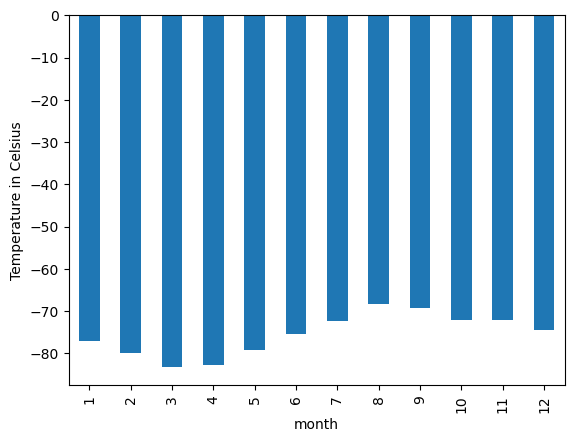

In [16]:
# Plot the average temperature by month
mars_mos_avg_low_temp.plot.bar()
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

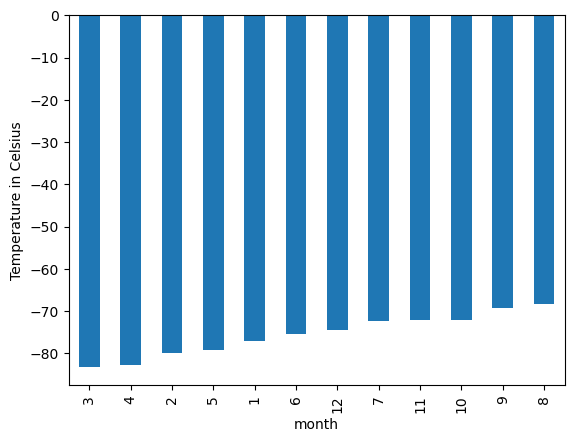

In [17]:
# Identify the coldest and hottest months in Curiosity's location
mars_mos_min_temp = mars_mos_avg_low_temp.sort_values()
mars_mos_min_temp

# graph
mars_mos_min_temp.plot.bar()
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [18]:
# 4. Average pressure by Martian month
mars_mos_avg_pressure = mars_df.groupby('month').pressure.agg('mean')
mars_mos_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

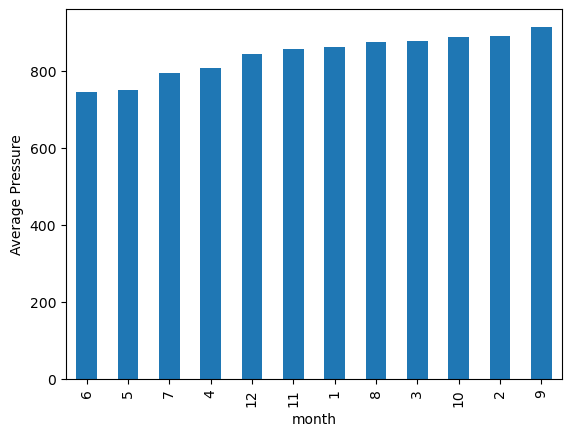

In [19]:
# Plot the average pressure by month
mars_mos_pressure = mars_mos_avg_pressure.sort_values()

mars_mos_pressure.plot.bar()
plt.xlabel('month')
plt.ylabel('Average Pressure')
plt.show()

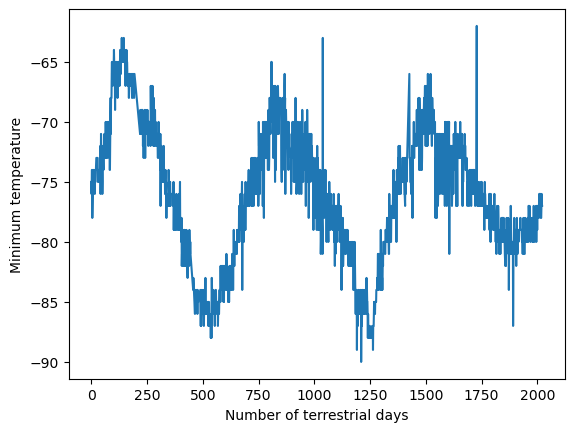

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# find first earth date
first_terra_day = mars_df['terrestrial_date'].agg('min')
# create a new df 
terra_days_min_temps_df = pd.DataFrame({
    "min_temp": mars_df['min_temp'],
    "terra_days": mars_df['terrestrial_date'] - first_terra_day
})

# plot the intitial value of earth days vs the min_temps for each sol record
plt.plot(terra_days_min_temps_df["terra_days"].dt.days, terra_days_min_temps_df["min_temp"])
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', header=True, index=False, date_format='%Y-%m-%d')